In [1]:
!pip install pot
!pip install torch
!pip install geomloss
!pip install wget
!pip install mdatagen
!pip install pot
!pip install torch
!pip install geomloss
!pip install wget
!pip install numpy scipy sklearn
!pip install jax
!pip install chex
!pip install attr
!pip install optax



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


ERROR: Could not find a version that satisfies the requirement sklearn (from versions: none)

[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for sklearn



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import sys
sys.path.append(r"C:\Users\zhossai3\Desktop\Fair_Imputation") 


import Utils
import CMI
import Inject_Missing_Values
import RR_imputer
import Sinkhorn_CMI
import SinkhornImputation
import SoftImpute



c:\Users\zhossai3\AppData\Local\Programs\Python\Python312\Lib\site-packages\torch\__init__.py:1144: UserWarning: torch.set_default_tensor_type() is deprecated as of PyTorch 2.1, please use torch.set_default_dtype() and torch.set_default_device() as alternatives. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\torch\csrc\tensor\python_tensor.cpp:434.)
  _C._set_default_tensor_type(t)


In [4]:
import numpy as np
import torch
import torch.nn as nn
import pandas as pd

from geomloss import SamplesLoss

from sklearn.preprocessing import scale
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer
from sklearn.preprocessing import StandardScaler

from Utils import *
from SoftImpute import softimpute, cv_softimpute
from SinkhornImputation import SinkhornImputation
from Sinkhorn_CMI import *
from RR_imputer import RRimputer
import matplotlib.pyplot as plt
from CMI import *
from Experiment import *
from sklearn.model_selection import KFold

from Inject_Missing_Values import *

import logging
logger = logging.getLogger()
logger.setLevel(logging.INFO)
logging.debug("test")
import pandas as pd

torch.set_default_tensor_type('torch.DoubleTensor')

**Load Data**

In [5]:
import pandas as pd

# Read CSV file into a Pandas DataFrame
groundTruth = pd.read_csv(r'C:\Users\zhossai3\Desktop\Fair_Imputation\Data\adult\adult_data_GroundTruth.csv', delimiter=',', header=0)

In [6]:
groundTruth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45222 entries, 0 to 45221
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             45222 non-null  int64
 1   workclass       45222 non-null  int64
 2   fnlwgt          45222 non-null  int64
 3   education-num   45222 non-null  int64
 4   marital-status  45222 non-null  int64
 5   occupation      45222 non-null  int64
 6   relationship    45222 non-null  int64
 7   race            45222 non-null  int64
 8   sex             45222 non-null  int64
 9   capital-gain    45222 non-null  int64
 10  capital-loss    45222 non-null  int64
 11  hours-per-week  45222 non-null  int64
 12  native-country  45222 non-null  int64
 13  income          45222 non-null  int64
dtypes: int64(14)
memory usage: 4.8 MB


Checking Number of unique values

In [7]:
groundTruth.nunique()

age                  74
workclass             4
fnlwgt            26741
education-num        16
marital-status        3
occupation            3
relationship          4
race                  2
sex                   2
capital-gain        121
capital-loss         97
hours-per-week       96
native-country        6
income                4
dtype: int64

In [8]:
print("age",groundTruth['age'].unique())
print("workclass",groundTruth['workclass'].unique())
print("fnlwgt",groundTruth['fnlwgt'].unique())
print("education-num",groundTruth['education-num'].unique())
print("marital-status",groundTruth['marital-status'].unique())
print("occupation",groundTruth['occupation'].unique())
print("relationship",groundTruth['relationship'].unique())
print("race",groundTruth['race'].unique())
print("sex",groundTruth['sex'].unique())
print("capital-gain",groundTruth['capital-gain'].unique())
print("capital-loss",groundTruth['capital-loss'].unique())
print("hours-per-week",groundTruth['hours-per-week'].unique())
print("native-country",groundTruth['native-country'].unique())
print("income",groundTruth['income'].unique())

age [39 50 38 53 28 37 49 52 31 42 30 23 32 34 25 43 40 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 47 46 36 79 27 18 33 76 55 61 70 64 71 66 51 58
 26 17 60 90 75 65 77 62 63 67 74 72 69 68 73 81 78 88 80 84 83 85 82 86
 89 87]
workclass [1 3 2 4]
fnlwgt [ 77516  83311 215646 ... 173449  89686 350977]
education-num [13  9  7 14  5 10 12  4 16 11 15  3  6  1  8  2]
marital-status [3 1 2]
occupation [1 2 3]
relationship [4 1 2 3]
race [1 2]
sex [1 2]
capital-gain [ 2174     0 14084  5178  5013  2407 14344 15024  7688  4064  4386  7298
  1409  3674  1055  2050  2176   594 20051  6849  4101  8614  3411  2597
 25236  4650  2463  3103 10605  2964  3325  2580  3471  4865 99999  6514
  1471  2329  2105  2885 10520  2202  2961 27828  6767  2228  1506 13550
  2635  5556  4787  3781  3137  3818   914   401  2829  2977  4934  2062
  2354  3464  5455 15020  1424  3273 22040  4416 10566  4931  7430 34095
  6497  3908   114  2346  2907  1151  9386  2414  2290  3418 15831 41310
  4508  2538  3456  

In [9]:
groundTruth.head(5)

age  workclass  fnlwgt  education-num  marital-status  occupation  \
0   39          1   77516             13               3           1   
1   50          3   83311             13               1           1   
2   38          2  215646              9               2           2   
3   53          2  234721              7               1           2   
4   28          2  338409             13               1           1   

   relationship  race  sex  capital-gain  capital-loss  hours-per-week  \
0             4     1    1          2174             0              40   
1             1     1    1             0             0              13   
2             4     1    1             0             0              40   
3             1     2    1             0             0              40   
4             1     2    2             0             0              40   

   native-country  income  
0               1       0  
1               1       0  
2               1       0  
3               1       0  
4               1       0

In [10]:
scaler = StandardScaler()
groundTruth_scaled = pd.DataFrame(scaler.fit_transform(groundTruth), columns=groundTruth.columns)
print(groundTruth_scaled)


            age  workclass    fnlwgt  education-num  marital-status  \
0      0.034201  -1.903099 -1.062295       1.128753        1.311034   
1      0.866417   1.986355 -1.007438       1.128753       -0.957783   
2     -0.041455   0.041628  0.245284      -0.438122        0.176626   
3      1.093385   0.041628  0.425853      -1.221559       -0.957783   
4     -0.798015   0.041628  1.407393       1.128753       -0.957783   
...         ...        ...       ...            ...             ...   
45217 -0.419735   0.041628  0.525154       1.128753        1.311034   
45218  0.034201   0.041628  0.243135       1.128753        0.176626   
45219 -0.041455   0.041628  1.753613       1.128753       -0.957783   
45220  0.412481   0.041628 -1.001947       1.128753        0.176626   
45221 -0.268423   1.986355 -0.071818       1.128753       -0.957783   

       occupation  relationship      race       sex  capital-gain  \
0       -1.102577      1.247304 -0.403026 -0.693813      0.142888   
1       -

In [11]:
X= groundTruth_scaled.iloc[:, :-1]  # Selects all rows and all columns except the last one
Y = groundTruth_scaled.iloc[:, -1]  # Selects all rows and only the last column

In [12]:
print("age",groundTruth_scaled['age'].unique())
print("workclass",groundTruth_scaled['workclass'].unique())
print("fnlwgt",groundTruth_scaled['fnlwgt'].unique())
print("education-num",groundTruth_scaled['education-num'].unique())
print("marital-status",groundTruth_scaled['marital-status'].unique())
print("occupation",groundTruth_scaled['occupation'].unique())
print("relationship",groundTruth_scaled['relationship'].unique())
print("race",groundTruth_scaled['race'].unique())
print("sex",groundTruth_scaled['sex'].unique())
print("capital-gain",groundTruth_scaled['capital-gain'].unique())
print("capital-loss",groundTruth_scaled['capital-loss'].unique())
print("hours-per-week",groundTruth_scaled['hours-per-week'].unique())
print("native-country",groundTruth_scaled['native-country'].unique())
print("income",groundTruth_scaled['income'].unique())

age [ 0.03420095  0.86641684 -0.04145504  1.09338481 -0.79801494 -0.11711103
  0.79076085  1.01772882 -0.57104697  0.26116892 -0.64670296 -1.17629489
 -0.49539098 -0.344079   -1.02498291  0.33682491  0.10985694  1.1690408
 -0.26842301  1.54732075  1.32035278 -1.47891885 -1.40326286  0.48813689
 -1.25195088  0.71510486 -1.32760687 -1.1006389   1.39600877  0.4124809
  0.18551293 -0.72235895  0.63944887  0.56379288 -0.19276702  3.06044055
 -0.87367093 -1.55457484 -0.41973499  2.83347258  1.24469679  1.69863273
  2.37953664  1.9256007   2.45519263  2.07691268  0.94207283  1.47166476
 -0.94932692 -1.63023083  1.62297674  3.89265644  2.75781659  2.00125669
  2.90912857  1.77428872  1.84994471  2.15256867  2.6821606   2.53084862
  2.30388065  2.22822466  2.60650461  3.21175253  2.98478456  3.74134446
  3.13609654  3.4387205   3.36306451  3.51437649  3.28740852  3.59003248
  3.81700045  3.66568847]
workclass [-1.90309934  1.9863551   0.04162788  3.93108232]
fnlwgt [-1.06229487 -1.00743773  0.2

Converting GroudTruth to Tensor

In [13]:
groundTruth_tensor = torch.tensor(groundTruth_scaled.to_numpy()) #converting groundTruth to Tensor, z-score scaling

In [14]:
print(torch.unique(groundTruth_tensor[:,8])) # coloumn 19 is sex where 1 is male and 0 is female.after scaling male is 0.6703 and female is -1.4919

tensor([-0.6938,  1.4413])


In [15]:
print("minimum: ",groundTruth_tensor.min())
print("maximum:",groundTruth_tensor.max())
print("mean: ",groundTruth_tensor.mean())
print("median: ", groundTruth_tensor.median())

minimum:  tensor(-3.7276)
maximum: tensor(13.1752)
mean:  tensor(-1.7732e-18)
median:  tensor(-0.1962)


Determining the appropriate columns for bucketization along with their respective bucket sizes, and identifying the variables X, Y, and Z for Conditional Mutual Information (CMI) computation.

In [16]:
bucket_specs = {
     
    7:2, #race
    0:10,#age
    8:2, #sex
    13:4, #income
    1:4, #workclass
    3:10, #education-num
    9:20, #capital-gain
    10:20, #capital-los
    11:20, #hours-per-week
    6:4, #occupation 
    4:4 #marital-status
    

    
}

# Define multiple attributes for X, Y, Z
X_cols = [0,7,8]  # Bucketized sensitive attributes (e.g., sex, race, age)
Y_cols = [11,13]     
Z_cols = [1,3,5,6,7]  


**CMI for GroundTruth**

In [17]:
#groundTruth_tensor = groundTruth_tensor.float()
groundTruth_tensor.requires_grad=True
cmi_groundTruth = CMI.c_m_i(groundTruth_tensor,bucket_specs,X_cols, Y_cols, Z_cols)
print(cmi_groundTruth)

tensor(0.8522, grad_fn=<ClampBackward1>)


Generating MCAR 25%, and added the target coloumn with the 25% missing MCAR data

In [18]:
generator_mcar25 = Inject_Missing_Values()
miss_mcar25,index_mcar25 = generator_mcar25.MCAR(X,missing_rate=25)
print(type(miss_mcar25))
total_missing_percentage_mar25= miss_mcar25.isnull().sum().sum() / miss_mcar25.size * 100
print(f"Total Missing Percentage MAR25: {total_missing_percentage_mar25:.2f}%")

missing_percentage = (miss_mcar25.isnull().sum() / len(miss_mcar25)) * 100
print(missing_percentage)

miss_mcar25 = pd.concat([miss_mcar25, Y], axis=1) #adding the target coloumn

<class 'pandas.core.frame.DataFrame'>
Total Missing Percentage MAR25: 25.00%
age               25.014374
workclass         24.841891
fnlwgt            24.828623
education-num     24.981204
marital-status    25.069656
occupation        25.027641
relationship      24.983415
race              25.361550
sex               25.204546
capital-gain      24.821989
capital-loss      25.051966
hours-per-week    25.016585
native-country    24.797665
dtype: float64


In [19]:
miss_mcar25_numpy = miss_mcar25.to_numpy()
miss_mcar25_tensor = torch.tensor(miss_mcar25_numpy) #converting to tensor

In [20]:
print(torch.unique(miss_mcar25_tensor[:,8]))

tensor([-0.6938,  1.4413,     nan,  ...,     nan,     nan,     nan])


Applying Sinkhorn algorithm to MCAR 25% data

In [20]:
#only Sinkhorn
n_mcar25, d_mcar25 = miss_mcar25_tensor.shape
batchsize = 128 # If the batch size is larger than half the dataset's size,
                # it will be redefined in the imputation methods.
lr = 1e-2
epsilon_mcar25 = pick_epsilon(miss_mcar25_tensor)
print(epsilon_mcar25)
mask_mcar25 = torch.isnan(miss_mcar25_tensor).double()


on_sk_imputer_mcar25 = SinkhornImputation(eps=epsilon_mcar25, batchsize=batchsize, lr=lr, niter=5000)
on_sk_imp_mcar25, on_sk_maes25mcar, on_sk_rmses25mcar = on_sk_imputer_mcar25.fit_transform(miss_mcar25_tensor, verbose=True, report_interval=50, X_true=groundTruth_tensor)

#using numpy version of data
on_sk_imp_mcar25_numpy = on_sk_imp_mcar25.detach().cpu().numpy()
on_sk_mae_mcar25 = MAE(on_sk_imp_mcar25,groundTruth_tensor , mask_mcar25)
on_sk_rmse_mcar25 = RMSE(on_sk_imp_mcar25, groundTruth_tensor, mask_mcar25)
print("MAE:", on_sk_mae_mcar25)


0.42744944575334415


INFO:root:batchsize = 128, epsilon = 0.4274
INFO:root:Iteration 0:	 Loss: 2.6992	 Validation MAE: 0.6916	RMSE: 1.0134
INFO:root:Iteration 50:	 Loss: 3.3019	 Validation MAE: 0.6850	RMSE: 1.0120
INFO:root:Iteration 100:	 Loss: 2.9079	 Validation MAE: 0.6789	RMSE: 1.0108
INFO:root:Iteration 150:	 Loss: 3.1564	 Validation MAE: 0.6731	RMSE: 1.0094
INFO:root:Iteration 200:	 Loss: 3.1541	 Validation MAE: 0.6678	RMSE: 1.0083
INFO:root:Iteration 250:	 Loss: 3.3239	 Validation MAE: 0.6627	RMSE: 1.0070
INFO:root:Iteration 300:	 Loss: 2.5069	 Validation MAE: 0.6580	RMSE: 1.0059
INFO:root:Iteration 350:	 Loss: 2.8792	 Validation MAE: 0.6537	RMSE: 1.0050
INFO:root:Iteration 400:	 Loss: 3.3323	 Validation MAE: 0.6494	RMSE: 1.0040
INFO:root:Iteration 450:	 Loss: 3.7729	 Validation MAE: 0.6453	RMSE: 1.0030
INFO:root:Iteration 500:	 Loss: 4.1004	 Validation MAE: 0.6415	RMSE: 1.0022
INFO:root:Iteration 550:	 Loss: 3.1435	 Validation MAE: 0.6378	RMSE: 1.0013
INFO:root:Iteration 600:	 Loss: 3.4389	 Validat

MAE: tensor(0.5396, grad_fn=<DivBackward0>)


Calculating CMI after applying the Sinkhorn Imputation (only Sinkhorn algorithm)

In [21]:
#only CMI
on_cmi_missmcar25 = CMI.c_m_i(on_sk_imp_mcar25, bucket_specs, X_cols, Y_cols, Z_cols)
print("CMI:", on_cmi_missmcar25)
print("MAE:",on_sk_mae_mcar25)

CMI: tensor(0.6701, grad_fn=<ClampBackward1>)
MAE: tensor(0.5396, grad_fn=<DivBackward0>)


Applying Sinkhorn-CMI algorithm to MCAR 25%

In [22]:
#sinkhorn_CMI
n_mcar25, d_mcar25 = miss_mcar25_tensor.shape
batchsize = 128 # If the batch size is larger than half the dataset's size,
                # it will be redefined in the imputation methods.
lr = 1e-2
epsilon_mcar25 = pick_epsilon(miss_mcar25_tensor)
#epsilon_mcar30 = 0.3
print(epsilon_mcar25)
mask_mcar25  = torch.isnan(miss_mcar25_tensor).double()


sk_imputer_mcar25 = SinkhornImputation_CMI(eps=epsilon_mcar25, batchsize=batchsize, lr=lr, niter=5000,highest_lamda_cmi = 500)
sk_imp_mcar25, sk_maes25mcar, sk_rmses25mcar,cmi_loss_mcar25,sinkhorn_loss_mcar25, lamda_cmi_mcar25 = sk_imputer_mcar25.fit_transform(miss_mcar25_tensor, True, 50, groundTruth_tensor, X_cols, Y_cols, Z_cols, bucket_specs)
#using numpy version of data
sk_imp_mcar25_numpy = sk_imp_mcar25.detach().cpu().numpy()

sk_mae_mcar25 = MAE(sk_imp_mcar25,groundTruth_tensor , mask_mcar25)
sk_rmse_mcar25 = RMSE(sk_imp_mcar25, groundTruth_tensor, mask_mcar25)
print("MAE:",sk_mae_mcar25)





0.4261023184092658


INFO:root:Iteration 0:	 Loss: 2.9479	 Validation MAE: 0.6919	RMSE: 1.0139
INFO:root:Iteration 50:	 Loss: 3.2207	 Validation MAE: 0.7270	RMSE: 1.0533
INFO:root:Iteration 100:	 Loss: 3.7872	 Validation MAE: 0.7798	RMSE: 1.1546
INFO:root:Iteration 150:	 Loss: 4.1831	 Validation MAE: 0.8302	RMSE: 1.2702
INFO:root:Iteration 200:	 Loss: 4.0454	 Validation MAE: 0.8636	RMSE: 1.3700
INFO:root:Iteration 250:	 Loss: 5.3646	 Validation MAE: 0.8859	RMSE: 1.4516
INFO:root:Iteration 300:	 Loss: 4.2413	 Validation MAE: 0.9005	RMSE: 1.5162
INFO:root:Iteration 350:	 Loss: 4.7001	 Validation MAE: 0.9104	RMSE: 1.5681
INFO:root:Iteration 400:	 Loss: 4.5925	 Validation MAE: 0.9173	RMSE: 1.6101
INFO:root:Iteration 450:	 Loss: 5.6847	 Validation MAE: 0.9221	RMSE: 1.6445
INFO:root:Iteration 500:	 Loss: 4.5291	 Validation MAE: 0.9255	RMSE: 1.6727
INFO:root:Iteration 550:	 Loss: 6.7854	 Validation MAE: 0.9281	RMSE: 1.6957
INFO:root:Iteration 600:	 Loss: 5.8317	 Validation MAE: 0.9299	RMSE: 1.7150
INFO:root:Itera

KeyboardInterrupt: 

CMI for Sinkhorn_CMI Imputation

In [ ]:
#CMI
sk_cmi_mcar25 = CMI.c_m_i(sk_imp_mcar25, bucket_specs, X_cols, Y_cols, Z_cols)
print("CMI",sk_cmi_mcar25)
print("MAE",sk_mae_mcar25)

H(X|Z): 1.1997819486424763, H(Y|Z): 0.2921259115501602, H(X,Y|Z): 1.3793748175677312
CMI tensor(0.1125, grad_fn=<SubBackward0>)
MAE tensor(0.7074, grad_fn=<DivBackward0>)


Mean imputation, MAE and CMI

In [ ]:

mean_imp_mcar25 = SimpleImputer().fit_transform(miss_mcar25_tensor)
mean_imp_mcar25_torch = torch.tensor(mean_imp_mcar25)
mean_mae_mcar25 = MAE(mean_imp_mcar25_torch, groundTruth_tensor , mask_mcar25)

print("MAE",mean_mae_mcar25)

cmi_mean_mcar25 = CMI.c_m_i(mean_imp_mcar25_torch, bucket_specs, X_cols, Y_cols, Z_cols)
print("CMI",cmi_mean_mcar25)

MAE tensor(0.7654, grad_fn=<DivBackward0>)
H(X|Z): 1.651422094039118, H(Y|Z): 0.36896818693541267, H(X,Y|Z): 1.814434595306281
CMI tensor(0.2060, grad_fn=<SubBackward0>)


Imputation by Chained Equations, CMI and MAE

In [ ]:
ice_imp_mcar25 = IterativeImputer(random_state=0, max_iter=500).fit_transform(miss_mcar25_tensor)
ice_imp_mcar25_torch = torch.tensor(ice_imp_mcar25)
ice_mae_mcar25 = MAE(ice_imp_mcar25_torch, groundTruth_tensor , mask_mcar25)
print("MAE",ice_mae_mcar25)

cmi_ice_mcar25 = CMI.c_m_i(ice_imp_mcar25_torch, bucket_specs, X_cols, Y_cols, Z_cols)
print("CMI",cmi_ice_mcar25)

MAE tensor(0.7206, grad_fn=<DivBackward0>)
H(X|Z): 1.547011192049852, H(Y|Z): 0.3323387503103934, H(X,Y|Z): 1.658751202217566
CMI tensor(0.2206, grad_fn=<SubBackward0>)


Soft Imputation CMI and MAE

In [ ]:
cv_error_mcar25, grid_lambda_mcar25 = cv_softimpute(miss_mcar25_numpy, grid_len=15)
lbda_mcar25 = grid_lambda_mcar25[np.argmin(cv_error_mcar25)]
soft_imp_mcar25 = softimpute((miss_mcar25_numpy), lbda_mcar25)[1]
soft_imp_mcar25_torch = torch.tensor(soft_imp_mcar25)

soft_mae_mcar25 = MAE(soft_imp_mcar25_torch, groundTruth_tensor , mask_mcar25)
print("MAE",soft_mae_mcar25)

cmi_soft_mcar25 = CMI.c_m_i(soft_imp_mcar25_torch, bucket_specs, X_cols, Y_cols, Z_cols)
print("CMI",cmi_soft_mcar25)

MAE tensor(0.7225, grad_fn=<DivBackward0>)
H(X|Z): 1.630692635156474, H(Y|Z): 0.33588912929659465, H(X,Y|Z): 1.7684073523782553
CMI tensor(0.1982, grad_fn=<SubBackward0>)


### Visualization

Sinkhorn loss vs Sinkhorn Iteration

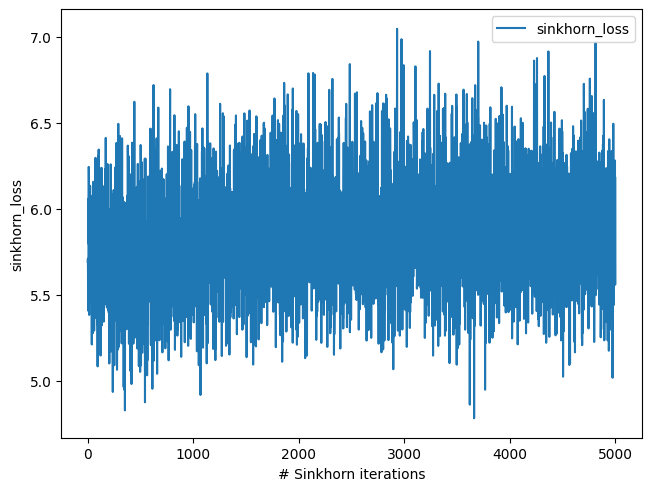

In [ ]:
sinkhorn_loss_mcar25 = torch.tensor(sinkhorn_loss_mcar25)
fig, ax = plt.subplots(constrained_layout=True)

npoints = len(sinkhorn_loss_mcar25)

ax.plot(np.linspace(0, 1, npoints) * npoints, sinkhorn_loss_mcar25.detach().numpy(), label='sinkhorn_loss')

ax.set_xticks(np.linspace(0, npoints, 6))
ax.set_xlabel('# Sinkhorn iterations')

ax.set_ylabel('sinkhorn_loss')
plt.legend()
plt.show()

CMI and MAE vs Sinkhorn Iterations

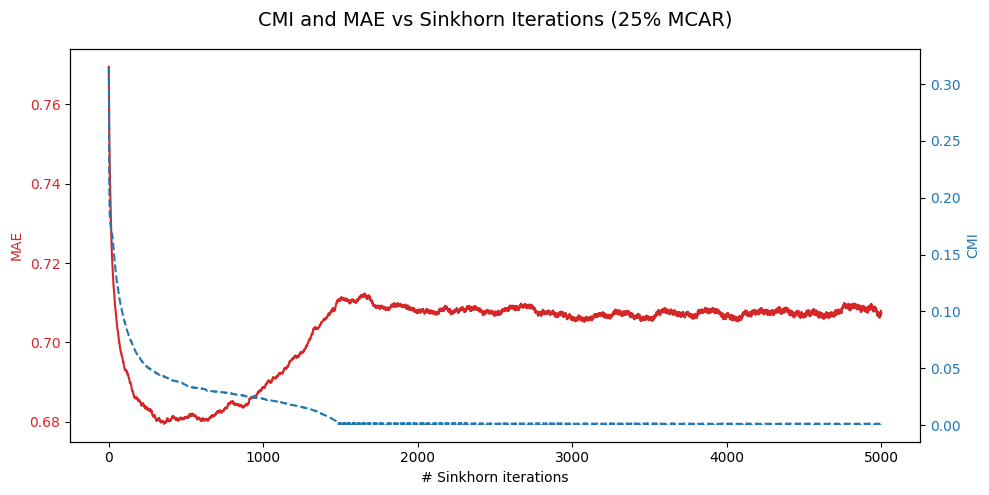

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data (replace with actual PyTorch tensors if needed)
# Convert to NumPy if these are tensors
cmi_array = cmi_loss_mcar25
mae_array = sk_maes25mcar

# Ensure both arrays are same length (or handle separately if needed)
npoints = min(len(cmi_array), len(mae_array))
x = np.linspace(0, 1, npoints) * npoints  # X-axis: Sinkhorn iterations

# Truncate both arrays to the same length for plotting
cmi_array = cmi_array[:npoints]
mae_array = mae_array[:npoints]

# Create a single plot with twin y-axes
fig, ax1 = plt.subplots(figsize=(10, 5))

# Plot MAE (left axis)
color = 'tab:red'
ax1.set_xlabel('# Sinkhorn iterations')
ax1.set_ylabel('MAE', color=color)
ax1.plot(x, mae_array, color=color, label='MAE')
ax1.tick_params(axis='y', labelcolor=color)

# Plot CMI (right axis)
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('CMI', color=color)
ax2.plot(x, cmi_array, color=color, linestyle='--', label='CMI')
ax2.tick_params(axis='y', labelcolor=color)

# Titles and layout
fig.suptitle('CMI and MAE vs Sinkhorn Iterations (25% MCAR)', fontsize=14)
fig.tight_layout()
plt.show()


MAE and CMI vs lambda_cmi

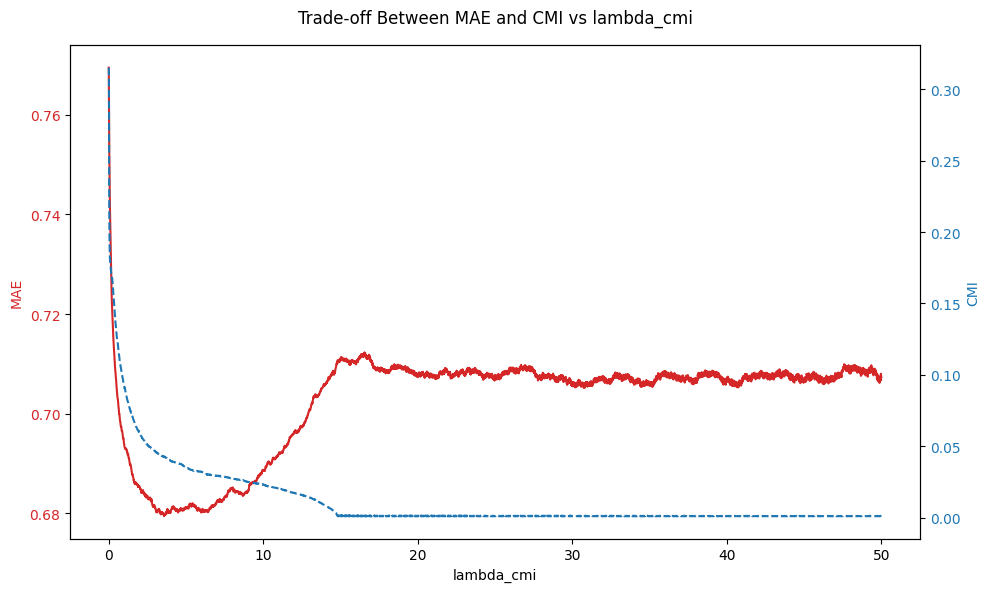

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Simulated from your training log — you should replace these with actual histories
cmi_penalty_history = cmi_loss_mcar25 # list of length 2000 from your model
mae_history = sk_maes25mcar         # list of length 2000 from your model

iterations = np.arange(len(cmi_penalty_history))
lambda_cmi_values = lamda_cmi_mcar25

# Plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# MAE
color = 'tab:red'
ax1.set_xlabel('lambda_cmi')
ax1.set_ylabel('MAE', color=color)
ax1.plot(lambda_cmi_values, mae_history, color=color, label='MAE')
ax1.tick_params(axis='y', labelcolor=color)

# CMI on same plot
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('CMI', color=color)
ax2.plot(lambda_cmi_values, cmi_penalty_history, color=color, linestyle='--', label='CMI')
ax2.tick_params(axis='y', labelcolor=color)

fig.suptitle('Trade-off Between MAE and CMI vs lambda_cmi')
fig.tight_layout()
plt.show()


In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Convert to arrays
mae_array_mcar25 = np.array(sk_maes25mcar)
cmi_array_mcar25 = np.array(cmi_loss_mcar25)
lambda_array_mcar25 = np.array(lamda_cmi_mcar25)

# OPTIONAL: Skip very low lambda values (e.g., lambda = 0)
min_index = 10  # or 0 if you want to include everything

# ---- Option 1: Visual Match (Rescale CMI to MAE's range) ----
min_mae_mcar25, max_mae_mcar25 = mae_array_mcar25.min(), mae_array_mcar25.max()
min_cmi_mcar25, max_cmi_mcar25 = cmi_array_mcar25.min(), cmi_array_mcar25.max()

# Rescale CMI to the MAE axis range
cmi_rescaled_mcar25 = (cmi_array_mcar25 - min_cmi_mcar25) / (max_cmi_mcar25 - min_cmi_mcar25) * (max_mae_mcar25 - min_mae_mcar25) + min_mae_mcar25

# Compute difference between MAE and rescaled CMI
diff_mcar25 = np.abs(mae_array_mcar25[min_index:] - cmi_rescaled_mcar25[min_index:])
intersection_idx_mcar25 = np.argmin(diff_mcar25) + min_index  # add offset

# ---- Extract Values at Intersection ----
lambda_intersection_mcra25 = lambda_array_mcar25[intersection_idx_mcar25]
mae_val_mcar25 = mae_array_mcar25[intersection_idx_mcar25]
cmi_val_mcar25 = cmi_array_mcar25[intersection_idx_mcar25]

# ---- Display Result ----
print("Estimated Visual Intersection Point MCAR25:")
print(f"  lambda_cmi_mcar25 = {lambda_intersection_mcra25:.4f}")
print(f"  MAE_mcar25        = {mae_val_mcar25:.4f}")
print(f"  CMI_mcar25        = {cmi_val_mcar25:.4f}")


Estimated Visual Intersection Point MCAR25:
  lambda_cmi_mcar25 = 0.1500
  MAE_mcar25        = 0.7286
  CMI_mcar25        = 0.1725


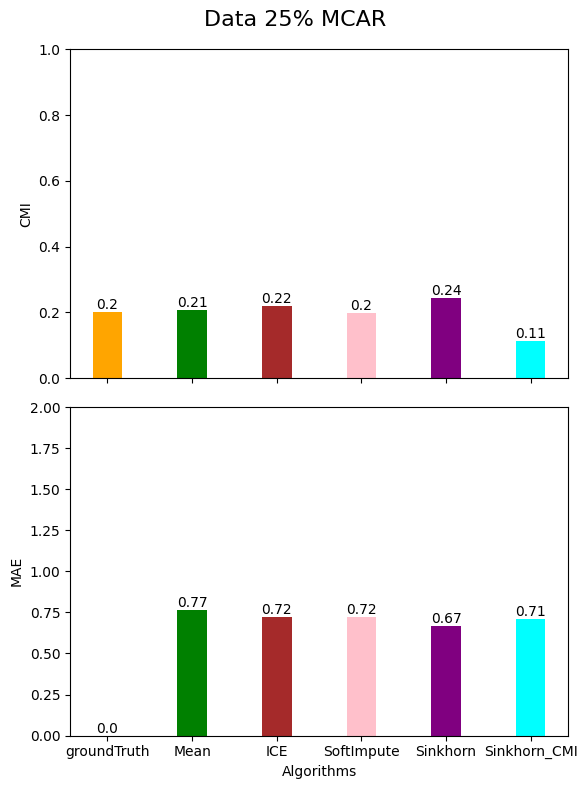

In [ ]:

# Define values and categories
values_cmi_mcar25 = [cmi_groundTruth.detach(),cmi_mean_mcar25.detach(),cmi_ice_mcar25.detach(),cmi_soft_mcar25.detach(),on_cmi_missmcar25.detach(),sk_cmi_mcar25.detach()]
values_maes_mcar25 = [0.0,mean_mae_mcar25.detach(),ice_mae_mcar25.detach(), soft_mae_mcar25.detach(),on_sk_mae_mcar25.detach(),sk_mae_mcar25.detach()]
categories = ["groundTruth","Mean","ICE","SoftImpute","Sinkhorn","Sinkhorn_CMI"]
colors = ['orange','green','brown','pink','purple', 'cyan']

# Bar chart parameters
bar_width = 0.35 # Width of each bar
index = np.arange(len(categories))  

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 8), sharex=True)
fig.suptitle('Data 25% MCAR', fontsize=16)

# Plot CMI bars and add values on top
bars1 = ax1.bar(index, values_cmi_mcar25, color=colors, width=bar_width)
ax1.set_ylabel("CMI")
ax1.set_ylim(0, 1) 
for bar in bars1:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')

# Plot MAE bars and add values on top
bars2 = ax2.bar(index, values_maes_mcar25, color=colors, width=bar_width)
ax2.set_ylabel("MAE")
ax2.set_ylim(0, 2) 
for bar in bars2:
    yval = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')


ax2.set_xticks(index)
ax2.set_xticklabels(categories)

# Show the plot
plt.xlabel('Algorithms')
plt.tight_layout()
plt.show()


**25% MAR**

In [ ]:
mean_occupation = groundTruth_scaled["occupation"].mean()
median_educationnum = groundTruth_scaled["education-num"].median()
mean_nativecountry = groundTruth_scaled["native-country"].mean()
median_hoursperweek = groundTruth_scaled["hours-per-week"].median()
mean_capitalloss = groundTruth_scaled["capital-loss"].mean()
median_age = groundTruth_scaled["age"].median()
mean_relationship = groundTruth_scaled["relationship"].mean()




dependencies_mar = {
    
    "occupation": {
        "influencers": ["workclass"],
        "condition": lambda row:  True ,  # Just a boolean condition
        "probability" : lambda row: 0.5 if row["workclass"] < 0.04162788 else 0.1 
    },
    "education-num": {
        "influencers": ["sex"],
        "condition": lambda row: True ,  # Just a boolean condition
        "probability" : lambda row: 0.5 if row["sex"] == 1.44130956 else 0.1
    },
    "marital-status": {
        "influencers": ["relationship"],
        "condition":  lambda row: True ,  # Just a boolean condition
        "probability" : lambda row: 0.5 if row["relationship"] <= mean_relationship else 0.1
    },
    "native-country": {
        "influencers": ["race"],
        "condition": lambda row: True,  # Just a boolean condition
        "probability" : lambda row: 0.5 if row["race"] == -0.4030256 else 0.1
    },
    "hours-per-week": {
        "influencers": ["age"],
        "condition": lambda row: True,  # Just a boolean condition
        "probability" : lambda row: 0.5 if row["age"] <= median_age else 0.1 
    },
    
    "capital-loss": {
        "influencers": ["marital-status"],
        "condition": lambda row: True,  # Just a boolean condition
        "probability" : lambda row: 0.5 if row["marital-status"] < 1.31103439 else 0.1
    },

    "race": {
        "influencers": ["workclass"],
        "condition": lambda row: True,  # Just a boolean condition
        "probability" : lambda row: 0.5 if row["workclass"] <= 0.04162788 else 0.1
    }



}


"""""""""""
workclass [-1.90309934  1.9863551   0.04162788  3.93108232]
fnlwgt [-1.06229487 -1.00743773  0.24528351 ... -0.15416545 -0.94709014
  1.52636574]
education-num [ 1.12875281 -0.43812161 -1.22155881  1.52047141 -2.00499602 -0.046403
  0.73703421 -2.39671462  2.30390862  0.3453156   1.91219002 -2.78843323
 -1.61327742 -3.57187043 -0.82984021 -3.18015183]
marital-status [ 1.31103439 -0.95778283  0.17662578]
occupation [-1.10257662  0.12709488  1.35676638]
relationship [ 1.24730402 -0.95397534 -0.22021555  0.51354423]
race [-0.4030256   2.48123197]
sex [-0.69381348  1.44130956]
"""""""""

Generating MAR 25%, and added the target coloumn with the 25% missing MAR data

In [ ]:
generator_mar25 = Inject_Missing_Values()
miss_mar25,index_mar25 = generator_mar25.MAR(X,dependencies_mar,missing_rate=25)
miss_mar25 = pd.concat([miss_mar25, Y], axis=1) #adding the target coloumn

total_missing_percentage_mar25 = miss_mar25.isnull().sum().sum() / miss_mar25.size * 100
print(f"Total Missing Percentage MAR25: {total_missing_percentage_mar25:.2f}%")

Total Missing Percentage MAR25: 23.86%


In [ ]:
missing_percentage = (miss_mar25.isnull().sum() / len(miss_mar25)) * 100
print(missing_percentage)

checking-account                         40.0
duration                                 52.3
credit-history                            0.0
purpose                                  36.9
credit-amount                            37.6
savings-account                          38.0
employment-since                         48.1
installment-rate                          0.0
other-debtors                            47.4
residence-since                           0.0
property                                  0.0
age                                       0.0
other-installment                        57.9
housing                                  43.2
existing-credits                          0.0
job                                      44.9
number-people-provide-maintenance-for    36.5
telephone                                 0.0
foreign-worker                           42.2
sex                                       0.0
marital-status                            0.0
class-label                       

In [ ]:
miss_mar25_numpy = miss_mar25.to_numpy()
miss_mar25_tensor = torch.tensor(miss_mar25_numpy) #converting to tensor

In [ ]:
print(miss_mar25.head(5))

   checking-account  duration  credit-history  purpose  credit-amount  \
0               1.0       NaN               0      7.0         1169.0   
1               NaN      48.0               1      7.0            NaN   
2               NaN      12.0               0      NaN            NaN   
3               NaN      42.0               1      5.0         7882.0   
4               1.0       NaN               2      NaN         4870.0   

   savings-account  employment-since  installment-rate  other-debtors  \
0              NaN               NaN                 4            NaN   
1              NaN               0.0                 2            NaN   
2              NaN               1.0                 2            NaN   
3              2.0               1.0                 2            1.0   
4              2.0               NaN                 3            2.0   

   residence-since  ...  other-installment  housing  existing-credits  job  \
0                4  ...                1.0  

Applying Sinkhorn algorithm to MAR 25% data

In [ ]:
#only Sinkhorn
n_mar25, d_mar25 = miss_mar25_tensor.shape
batchsize = 128 # If the batch size is larger than half the dataset's size,
                # it will be redefined in the imputation methods.
lr = 1e-2
epsilon_mar25 = pick_epsilon(miss_mar25_tensor)
print(epsilon_mar25)
mask_mar25= torch.isnan(miss_mar25_tensor).double()


on_sk_imputer_mar25 = SinkhornImputation(eps=epsilon_mar25, batchsize=batchsize, lr=lr, niter=5000)
on_sk_imp_mar25, on_sk_maes25mar, on_sk_rmses25mar = on_sk_imputer_mar25.fit_transform(miss_mar25_tensor, verbose=True, report_interval=50, X_true=groundTruth_tensor)

#using numpy version of data
on_sk_imp_mar25_numpy = on_sk_imp_mar25.detach().cpu().numpy()
on_sk_mae_mar25 = MAE(on_sk_imp_mar25,groundTruth_tensor , mask_mar25)
on_sk_rmse_mar25 = RMSE(on_sk_imp_mar25, groundTruth_tensor, mask_mar25)
print("MAE:",on_sk_mae_mar25)

0.7914089195935361


INFO:root:batchsize = 128, epsilon = 0.7914
INFO:root:Iteration 0:	 Loss: 5.4770	 Validation MAE: 0.7227	RMSE: 1.0042
INFO:root:Iteration 50:	 Loss: 5.3047	 Validation MAE: 0.6555	RMSE: 0.9887
INFO:root:Iteration 100:	 Loss: 5.0521	 Validation MAE: 0.6448	RMSE: 0.9830
INFO:root:Iteration 150:	 Loss: 5.3088	 Validation MAE: 0.6413	RMSE: 0.9794
INFO:root:Iteration 200:	 Loss: 5.4243	 Validation MAE: 0.6402	RMSE: 0.9789
INFO:root:Iteration 250:	 Loss: 5.2950	 Validation MAE: 0.6386	RMSE: 0.9765
INFO:root:Iteration 300:	 Loss: 5.6817	 Validation MAE: 0.6381	RMSE: 0.9757
INFO:root:Iteration 350:	 Loss: 5.0795	 Validation MAE: 0.6368	RMSE: 0.9748
INFO:root:Iteration 400:	 Loss: 5.4458	 Validation MAE: 0.6371	RMSE: 0.9750
INFO:root:Iteration 450:	 Loss: 5.2152	 Validation MAE: 0.6371	RMSE: 0.9751
INFO:root:Iteration 500:	 Loss: 4.8894	 Validation MAE: 0.6367	RMSE: 0.9756
INFO:root:Iteration 550:	 Loss: 5.2199	 Validation MAE: 0.6348	RMSE: 0.9750
INFO:root:Iteration 600:	 Loss: 4.9508	 Validat

tensor(0.6342, grad_fn=<DivBackward0>) tensor(0.9719, grad_fn=<SqrtBackward0>)


CMI for Sinkhorn Imputation

In [ ]:
#only CMI
on_cmi_missmar25 = CMI.c_m_i(on_sk_imp_mar25, bucket_specs, X_cols, Y_cols, Z_cols)
print("CMI:",on_cmi_missmar25)
print("MAE:",on_sk_mae_mar25)

H(X|Z): 1.3106170721676724, H(Y|Z): 0.42999667838499, H(X,Y|Z): 1.5566659107974186
tensor(0.1839, grad_fn=<SubBackward0>)
tensor(0.6342, grad_fn=<DivBackward0>)


Applying Sinkhorn-CMI algorithm to MAR 25% data

In [ ]:
#sinkhorn_CMI
n_mar25, d_mar25 = miss_mar25_tensor.shape
batchsize = 128 # If the batch size is larger than half the dataset's size,
                # it will be redefined in the imputation methods.
lr = 1e-2
epsilon_mar25 = pick_epsilon(miss_mar25_tensor)
#epsilon_mcar30 = 0.3
print(epsilon_mar25)
mask_mar25 = torch.isnan(miss_mar25_tensor).double()



sk_imputer_mar25 = SinkhornImputation_CMI(eps=epsilon_mar25, batchsize=batchsize, lr=lr, niter=5000,highest_lamda_cmi = 500)
sk_imp_mar25, sk_maes25mar, sk_rmses25mar,cmi_loss_mar25,sinkhorn_loss_mar25,lamda_cmi_mar25 = sk_imputer_mar25.fit_transform(miss_mar25_tensor, True, 50, groundTruth_tensor, X_cols, Y_cols, Z_cols, bucket_specs)
#using numpy version of data
sk_imp_mar25_numpy = sk_imp_mar25.detach().cpu().numpy()

sk_mae_mar25 = MAE(sk_imp_mar25,groundTruth_tensor , mask_mar25)
sk_rmse_mar25 = RMSE(sk_imp_mar25, groundTruth_tensor, mask_mar25)
print("MAE:",sk_mae_mar25)


0.7914089195935361


INFO:root:Iteration 0:	 Loss: 5.1724	 Validation MAE: 0.7223	RMSE: 1.0073
INFO:root:Iteration 50:	 Loss: 5.7429	 Validation MAE: 0.6606	RMSE: 0.9948
INFO:root:Iteration 100:	 Loss: 5.7195	 Validation MAE: 0.6525	RMSE: 0.9897
INFO:root:Iteration 150:	 Loss: 5.3499	 Validation MAE: 0.6512	RMSE: 0.9892
INFO:root:Iteration 200:	 Loss: 5.7492	 Validation MAE: 0.6503	RMSE: 0.9880
INFO:root:Iteration 250:	 Loss: 5.5227	 Validation MAE: 0.6510	RMSE: 0.9872
INFO:root:Iteration 300:	 Loss: 5.2209	 Validation MAE: 0.6515	RMSE: 0.9878
INFO:root:Iteration 350:	 Loss: 5.5387	 Validation MAE: 0.6514	RMSE: 0.9875
INFO:root:Iteration 400:	 Loss: 6.2521	 Validation MAE: 0.6528	RMSE: 0.9883
INFO:root:Iteration 450:	 Loss: 6.0074	 Validation MAE: 0.6526	RMSE: 0.9893
INFO:root:Iteration 500:	 Loss: 5.3890	 Validation MAE: 0.6540	RMSE: 0.9902
INFO:root:Iteration 550:	 Loss: 5.5132	 Validation MAE: 0.6526	RMSE: 0.9896
INFO:root:Iteration 600:	 Loss: 5.4171	 Validation MAE: 0.6527	RMSE: 0.9884
INFO:root:Itera

tensor(0.6544, grad_fn=<DivBackward0>) tensor(0.9893, grad_fn=<SqrtBackward0>)


CMI for Sinkhorn_CMI Imputation

In [ ]:
#CMI
cmi_mar25 = CMI.c_m_i(sk_imp_mar25, bucket_specs, X_cols, Y_cols, Z_cols)
print("CMI:",cmi_mar25)
print("MAE:",sk_mae_mar25)

H(X|Z): 1.1722815059383596, H(Y|Z): 0.2673023630824414, H(X,Y|Z): 1.4384668821316566
tensor(0.0011, grad_fn=<SubBackward0>)
tensor(0.6544, grad_fn=<DivBackward0>) tensor(0.9893, grad_fn=<SqrtBackward0>)


Mean Imputation, CMI and MAE

In [ ]:

mean_imp_mar25 = SimpleImputer().fit_transform(miss_mar25_tensor)
mean_imp_mar25_torch = torch.tensor(mean_imp_mar25)
mean_mae_mar25 = MAE(mean_imp_mar25_torch, groundTruth_tensor , mask_mar25)

print("MAE:",mean_mae_mar25)

cmi_mean_mar25 = CMI.c_m_i(mean_imp_mar25_torch, bucket_specs, X_cols, Y_cols, Z_cols)
print("CMI:",cmi_mean_mar25)

tensor(0.7195, grad_fn=<DivBackward0>)
H(X|Z): 1.49470761526704, H(Y|Z): 0.6213885256656866, H(X,Y|Z): 1.8632556715265318
tensor(0.2528, grad_fn=<SubBackward0>)


Imputation by Chained Equations, CMI and MAE

In [ ]:
ice_imp_mar25 = IterativeImputer(random_state=0, max_iter=500).fit_transform(miss_mar25_tensor)
ice_imp_mar25_torch = torch.tensor(ice_imp_mar25)
ice_mae_mar25 = MAE(ice_imp_mar25_torch, groundTruth_tensor , mask_mar25)
print("MAE:",ice_mae_mar25)

cmi_ice_mar25 = CMI.c_m_i(ice_imp_mar25_torch, bucket_specs, X_cols, Y_cols, Z_cols)
print("CMI:",cmi_ice_mar25)

tensor(0.8559, grad_fn=<DivBackward0>)
H(X|Z): 1.152038312793767, H(Y|Z): 0.744700218058914, H(X,Y|Z): 1.484142843992922
tensor(0.4126, grad_fn=<SubBackward0>)


Soft Imputation CMI and MAE

In [ ]:
cv_error_mar25, grid_lambda_mar25 = cv_softimpute(miss_mar25_numpy, grid_len=15)
lbda_mar25 = grid_lambda_mar25[np.argmin(cv_error_mar25)]
soft_imp_mar25 = softimpute((miss_mar25_numpy), lbda_mar25)[1]
soft_imp_mar25_torch = torch.tensor(soft_imp_mar25)

soft_mae_mar25 = MAE(soft_imp_mar25_torch, groundTruth_tensor , mask_mar25)
print("MAE:",soft_mae_mar25)

cmi_soft_mar25 = CMI.c_m_i(soft_imp_mar25_torch, bucket_specs, X_cols, Y_cols, Z_cols)
print("CMI:",cmi_soft_mar25)

tensor(0.6799, grad_fn=<DivBackward0>)
H(X|Z): 1.3826084078956038, H(Y|Z): 0.6312715006535052, H(X,Y|Z): 1.7347742118016898
tensor(0.2791, grad_fn=<SubBackward0>)


### Visualization

Sinkhorn loss vs Sinkhorn Iterations

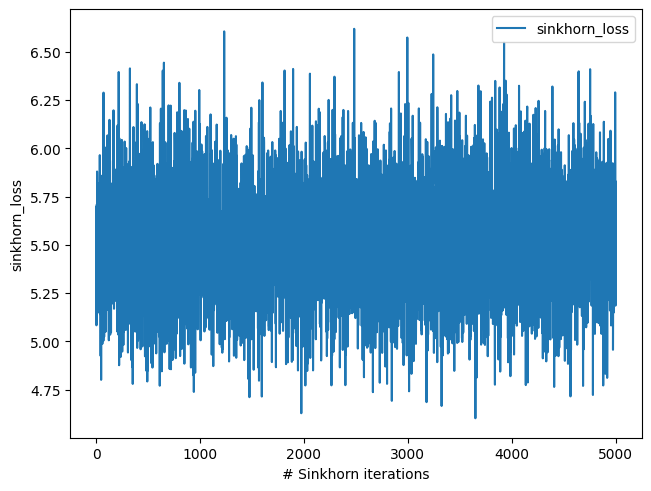

In [ ]:
sinkhorn_loss_mar25 = torch.tensor(sinkhorn_loss_mar25)
fig, ax = plt.subplots(constrained_layout=True)

npoints = len(sinkhorn_loss_mar25)

ax.plot(np.linspace(0, 1, npoints) * npoints, sinkhorn_loss_mar25.detach().numpy(), label='sinkhorn_loss')

ax.set_xticks(np.linspace(0, npoints, 6))
ax.set_xlabel('# Sinkhorn iterations')

ax.set_ylabel('sinkhorn_loss')
plt.legend()
plt.show()

CMI and MAE vs Sinkhorn Iterations

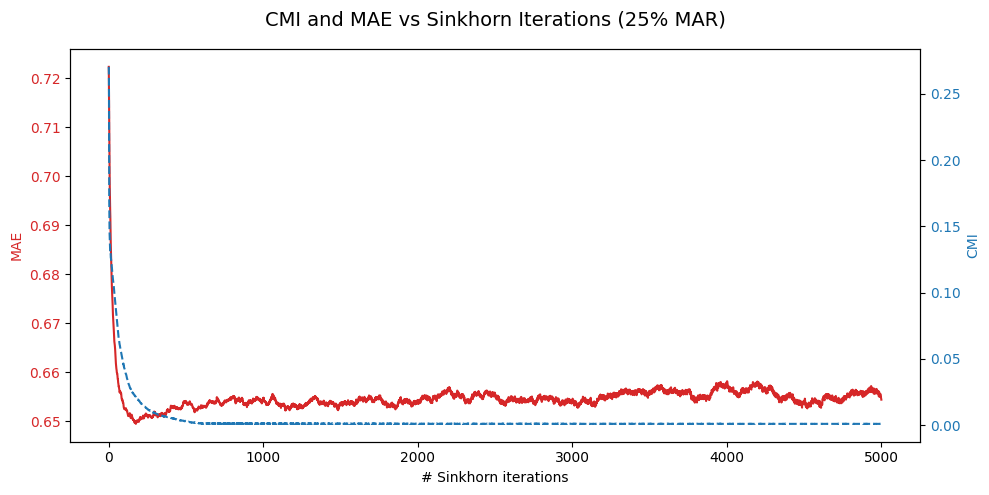

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data (replace with actual PyTorch tensors if needed)
# Convert to NumPy if these are tensors
cmi_array = cmi_loss_mar25
mae_array = sk_maes25mar

# Ensure both arrays are same length (or handle separately if needed)
npoints = min(len(cmi_array), len(mae_array))
x = np.linspace(0, 1, npoints) * npoints  # X-axis: Sinkhorn iterations

# Truncate both arrays to the same length for plotting
cmi_array = cmi_array[:npoints]
mae_array = mae_array[:npoints]

# Create a single plot with twin y-axes
fig, ax1 = plt.subplots(figsize=(10, 5))

# Plot MAE (left axis)
color = 'tab:red'
ax1.set_xlabel('# Sinkhorn iterations')
ax1.set_ylabel('MAE', color=color)
ax1.plot(x, mae_array, color=color, label='MAE')
ax1.tick_params(axis='y', labelcolor=color)

# Plot CMI (right axis)
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('CMI', color=color)
ax2.plot(x, cmi_array, color=color, linestyle='--', label='CMI')
ax2.tick_params(axis='y', labelcolor=color)

# Titles and layout
fig.suptitle('CMI and MAE vs Sinkhorn Iterations (25% MAR)', fontsize=14)
fig.tight_layout()
plt.show()


MAE and CMI vs lambda_cmi

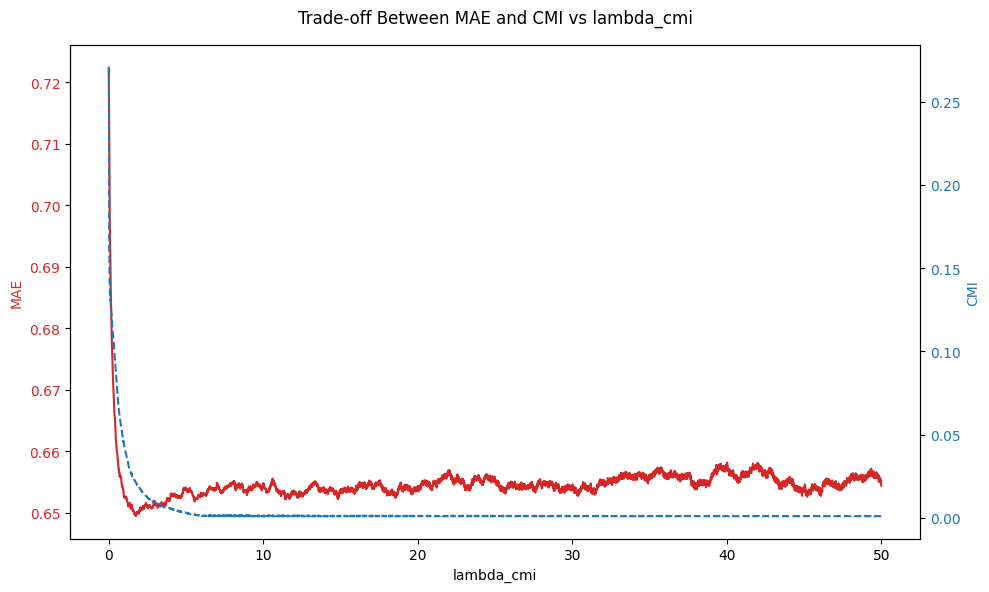

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Simulated from your training log — you should replace these with actual histories
cmi_penalty_history = cmi_loss_mar25 # list of length 2000 from your model
mae_history = sk_maes25mar         # list of length 2000 from your model

iterations = np.arange(len(cmi_penalty_history))
lambda_cmi_values = lamda_cmi_mar25

# Plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# MAE
color = 'tab:red'
ax1.set_xlabel('lambda_cmi')
ax1.set_ylabel('MAE', color=color)
ax1.plot(lambda_cmi_values, mae_history, color=color, label='MAE')
ax1.tick_params(axis='y', labelcolor=color)

# CMI on same plot
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('CMI', color=color)
ax2.plot(lambda_cmi_values, cmi_penalty_history, color=color, linestyle='--', label='CMI')
ax2.tick_params(axis='y', labelcolor=color)

fig.suptitle('Trade-off Between MAE and CMI vs lambda_cmi')
fig.tight_layout()
plt.show()


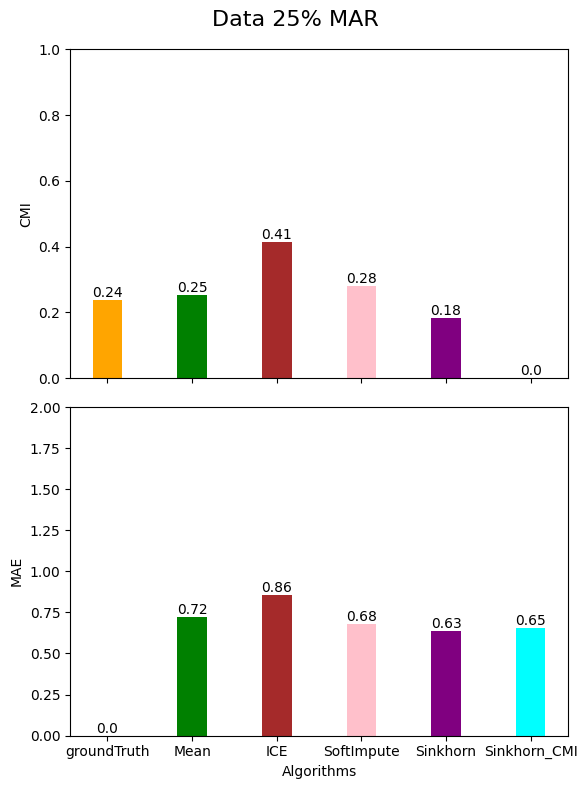

In [ ]:

# Define values and categories
values_cmi_mar25 = [cmi_groundTruth.detach(),cmi_mean_mar25.detach(),cmi_ice_mar25.detach(),cmi_soft_mar25.detach(),on_cmi_missmar25.detach(),cmi_mar25.detach()]
values_maes_mar25 = [0.0,mean_mae_mar25.detach(),ice_mae_mar25.detach(), soft_mae_mar25.detach(),on_sk_mae_mar25.detach(),sk_mae_mar25.detach()]
categories = ["groundTruth","Mean","ICE","SoftImpute","Sinkhorn","Sinkhorn_CMI"]
colors = ['orange','green','brown','pink','purple', 'cyan']

# Bar chart parameters
bar_width = 0.35 # Width of each bar
index = np.arange(len(categories))  

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 8), sharex=True)
fig.suptitle('Data 25% MAR', fontsize=16)

# Plot CMI bars and add values on top
bars1 = ax1.bar(index, values_cmi_mar25, color=colors, width=bar_width)
ax1.set_ylabel("CMI")
ax1.set_ylim(0, 1) 
for bar in bars1:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')

# Plot MAE bars and add values on top
bars2 = ax2.bar(index, values_maes_mar25, color=colors, width=bar_width)
ax2.set_ylabel("MAE")
ax2.set_ylim(0, 2) 
for bar in bars2:
    yval = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')


ax2.set_xticks(index)
ax2.set_xticklabels(categories)

# Show the plot
plt.xlabel('Algorithms')
plt.tight_layout()
plt.show() #display 


**25% MNAR**

In [ ]:
mean_occupation = groundTruth_scaled["occupation"].mean()
median_educationnum = groundTruth_scaled["education-num"].median()
mean_nativecountry = groundTruth_scaled["native-country"].mean()
median_hoursperweek = groundTruth_scaled["hours-per-week"].median()
mean_capitalloss = groundTruth_scaled["capital-loss"].mean()
median_age = groundTruth_scaled["age"].median()




dependencies_mnar = {
    
    "occupation": {
       
        "condition": lambda row:  True ,  # Just a boolean condition
        "probability" : lambda row: 0.5 if row["occupation"] < mean_occupation else 0.1 
    },
    "education-num": {
      
        "condition": lambda row: True ,  # Just a boolean condition
        "probability" : lambda row: 0.5 if row["education-num"] == median_educationnum else 0.1
    },
    "marital-status": {
       
        "condition":  lambda row: True ,  # Just a boolean condition
        "probability" : lambda row: 0.5 if row["marital-status"] == 1.31103439 else 0.1
    },
    "native-country": {
      
        "condition": lambda row: True,  # Just a boolean condition
        "probability" : lambda row: 0.5 if row["native-country"] <= mean_nativecountry else 0.1
    },
    "hours-per-week": {
       
        "condition": lambda row: True,  # Just a boolean condition
        "probability" : lambda row: 0.5 if row["hours-per-week"] >= median_hoursperweek else 0.1
    },
    
    "capital-loss": {
        
        "condition": lambda row: True,  # Just a boolean condition
        "probability" : lambda row: 0.5 if row["capital-loss"] <= mean_capitalloss else 0.1
    },

    "race": {
        
        "condition": lambda row: True,  # Just a boolean condition
        "probability" : lambda row: 0.5 if row["race"] == -0.4030256 else 0.1
    },

    "sex": {
        
        "condition": lambda row: True,  # Just a boolean condition
        "probability" : lambda row: 0.5 if row["sex"] == -0.69381348 else 0.1
    },

    "age": {
        
        "condition": lambda row: True,  # Just a boolean condition
        "probability" : lambda row: 0.5 if row["age"] <= median_age else 0.1 
    }

}




"""""""""""
workclass [-1.90309934  1.9863551   0.04162788  3.93108232]
fnlwgt [-1.06229487 -1.00743773  0.24528351 ... -0.15416545 -0.94709014
  1.52636574]
education-num [ 1.12875281 -0.43812161 -1.22155881  1.52047141 -2.00499602 -0.046403
  0.73703421 -2.39671462  2.30390862  0.3453156   1.91219002 -2.78843323
 -1.61327742 -3.57187043 -0.82984021 -3.18015183]
marital-status [ 1.31103439 -0.95778283  0.17662578]
occupation [-1.10257662  0.12709488  1.35676638]
relationship [ 1.24730402 -0.95397534 -0.22021555  0.51354423]
race [-0.4030256   2.48123197]
sex [-0.69381348  1.44130956]
"""""""""

'""\nworkclass [-1.90309934  1.9863551   0.04162788  3.93108232]\nfnlwgt [-1.06229487 -1.00743773  0.24528351 ... -0.15416545 -0.94709014\n  1.52636574]\neducation-num [ 1.12875281 -0.43812161 -1.22155881  1.52047141 -2.00499602 -0.046403\n  0.73703421 -2.39671462  2.30390862  0.3453156   1.91219002 -2.78843323\n -1.61327742 -3.57187043 -0.82984021 -3.18015183]\nmarital-status [ 1.31103439 -0.95778283  0.17662578]\noccupation [-1.10257662  0.12709488  1.35676638]\nrelationship [ 1.24730402 -0.95397534 -0.22021555  0.51354423]\nrace [-0.4030256   2.48123197]\nsex [-0.69381348  1.44130956]\n'

Generating MNAR 25%, and added the target coloumn with the 25% missing MNAR data

In [ ]:
generator_mnar25 = Inject_Missing_Values()
miss_mnar25,index_mnar25 = generator_mnar25.MNAR(X,dependencies_mnar,missing_rate=25)

miss_mnar25 = pd.concat([miss_mnar25, Y], axis=1) #adding the target coloumn

total_missing_percentage_mnar25 = miss_mnar25.isnull().sum().sum() / miss_mnar25.size * 100
print(f"Total Missing Percentage MNAR25: {total_missing_percentage_mnar25:.2f}%")

Total Missing Percentage MNAR25: 23.86%


In [ ]:
missing_percentage = (miss_mnar25.isnull().sum() / len(miss_mnar25)) * 100
print(missing_percentage)

checking-account                         43.7
duration                                 44.6
credit-history                            0.0
purpose                                   0.0
credit-amount                            17.7
savings-account                          35.2
employment-since                         28.1
installment-rate                          0.0
other-debtors                            37.7
residence-since                           0.0
property                                  0.0
age                                       0.0
other-installment                        42.6
housing                                  43.8
existing-credits                          0.0
job                                      39.4
number-people-provide-maintenance-for    65.1
telephone                                 0.0
foreign-worker                           68.1
sex                                      59.0
marital-status                            0.0
class-label                       

In [ ]:
miss_mnar25_numpy = miss_mnar25.to_numpy()
miss_mnar25_tensor = torch.tensor(miss_mnar25_numpy) #converting to tensor

Applying Sinkhorn algorithm to MNAR 25% data

In [ ]:
#only Sinkhorn
n_mnar25, d_mnar25 = miss_mnar25_tensor.shape
batchsize = 128 # If the batch size is larger than half the dataset's size,
                # it will be redefined in the imputation methods.
lr = 1e-2
epsilon_mnar25 = pick_epsilon(miss_mnar25_tensor)
print(epsilon_mnar25)
mask_mnar25= torch.isnan(miss_mnar25_tensor).double()


on_sk_imputer_mnar25 = SinkhornImputation(eps=epsilon_mnar25, batchsize=batchsize, lr=lr, niter=5000)
on_sk_imp_mnar25, on_sk_maes25mnar, on_sk_rmses25mnar = on_sk_imputer_mnar25.fit_transform(miss_mnar25_tensor, verbose=True, report_interval=50, X_true=groundTruth_tensor)

#using numpy version of data
on_sk_imp_mnar25_numpy = on_sk_imp_mnar25.detach().cpu().numpy()
on_sk_mae_mnar25 = MAE(on_sk_imp_mnar25, groundTruth_tensor, mask_mnar25)
on_sk_rmse_mnar25 = RMSE(on_sk_imp_mnar25, groundTruth_tensor, mask_mnar25)
print("MAE:",on_sk_mae_mnar25)

INFO:root:batchsize = 128, epsilon = 0.7897


0.7896750868914268


INFO:root:Iteration 0:	 Loss: 5.8225	 Validation MAE: 0.6865	RMSE: 0.9622
INFO:root:Iteration 50:	 Loss: 5.6910	 Validation MAE: 0.6224	RMSE: 0.9452
INFO:root:Iteration 100:	 Loss: 5.7905	 Validation MAE: 0.6132	RMSE: 0.9404
INFO:root:Iteration 150:	 Loss: 5.4420	 Validation MAE: 0.6075	RMSE: 0.9357
INFO:root:Iteration 200:	 Loss: 5.8474	 Validation MAE: 0.6032	RMSE: 0.9324
INFO:root:Iteration 250:	 Loss: 5.0444	 Validation MAE: 0.5994	RMSE: 0.9293
INFO:root:Iteration 300:	 Loss: 5.8957	 Validation MAE: 0.5982	RMSE: 0.9288
INFO:root:Iteration 350:	 Loss: 5.0174	 Validation MAE: 0.5977	RMSE: 0.9280
INFO:root:Iteration 400:	 Loss: 5.4025	 Validation MAE: 0.5961	RMSE: 0.9270
INFO:root:Iteration 450:	 Loss: 5.1381	 Validation MAE: 0.5964	RMSE: 0.9264
INFO:root:Iteration 500:	 Loss: 5.1812	 Validation MAE: 0.5958	RMSE: 0.9265
INFO:root:Iteration 550:	 Loss: 5.4934	 Validation MAE: 0.5936	RMSE: 0.9242
INFO:root:Iteration 600:	 Loss: 5.2954	 Validation MAE: 0.5934	RMSE: 0.9244
INFO:root:Itera

tensor(0.5957, grad_fn=<DivBackward0>) tensor(0.9242, grad_fn=<SqrtBackward0>)


CMI for Sinkhorn Imputation

In [ ]:
#only CMI
on_cmi_missmnar25 = CMI.c_m_i(on_sk_imp_mnar25, bucket_specs, X_cols, Y_cols, Z_cols)
print("CMI:",on_cmi_missmnar25)
print("MAE:",on_sk_mae_mnar25)

H(X|Z): 1.637746434095673, H(Y|Z): 0.5871294380697458, H(X,Y|Z): 1.8229098397466892
tensor(0.4020, grad_fn=<SubBackward0>)
tensor(0.5957, grad_fn=<DivBackward0>) tensor(0.9242, grad_fn=<SqrtBackward0>)


Applying Sinkhorn-CMI algorithm to MNAR 25% data

In [ ]:
#sinkhorn_CMI
n_mnar25, d_mnar25 = miss_mnar25_tensor.shape
batchsize = 128 # If the batch size is larger than half the dataset's size,
                # it will be redefined in the imputation methods.
lr = 1e-2
epsilon_mnar25 = pick_epsilon(miss_mnar25_tensor)
#epsilon_mcar30 = 0.3
print(epsilon_mnar25)
mask_mnar25 = torch.isnan(miss_mnar25_tensor).double()


sk_imputer_mnar25 = SinkhornImputation_CMI(eps = epsilon_mnar25, batchsize=batchsize, lr=lr, niter=5000,highest_lamda_cmi=500)
sk_imp_mnar25, sk_maes25mnar, sk_rmses25mnar,cmi_loss_mnar25, sinkhorn_loss_mnar25, lamda_cmi_mnar25 = sk_imputer_mnar25.fit_transform(miss_mnar25_tensor, True, 50, groundTruth_tensor, X_cols, Y_cols, Z_cols, bucket_specs)
#using numpy version of data
sk_imp_mnar25_numpy = sk_imp_mnar25.detach().cpu().numpy()

sk_mae_mnar25 = MAE(sk_imp_mnar25, groundTruth_tensor , mask_mnar25)
sk_rmse_mnar25 = RMSE(sk_imp_mnar25, groundTruth_tensor, mask_mnar25)
print("MAE:",sk_mae_mnar25)





0.7896750868914268


INFO:root:Iteration 0:	 Loss: 5.1589	 Validation MAE: 0.6840	RMSE: 0.9637
INFO:root:Iteration 50:	 Loss: 5.9088	 Validation MAE: 0.6284	RMSE: 0.9510
INFO:root:Iteration 100:	 Loss: 5.6687	 Validation MAE: 0.6198	RMSE: 0.9460
INFO:root:Iteration 150:	 Loss: 5.7379	 Validation MAE: 0.6165	RMSE: 0.9436
INFO:root:Iteration 200:	 Loss: 5.8796	 Validation MAE: 0.6141	RMSE: 0.9416
INFO:root:Iteration 250:	 Loss: 5.8574	 Validation MAE: 0.6121	RMSE: 0.9408
INFO:root:Iteration 300:	 Loss: 5.6384	 Validation MAE: 0.6110	RMSE: 0.9415
INFO:root:Iteration 350:	 Loss: 6.1380	 Validation MAE: 0.6103	RMSE: 0.9417
INFO:root:Iteration 400:	 Loss: 6.3981	 Validation MAE: 0.6086	RMSE: 0.9416
INFO:root:Iteration 450:	 Loss: 6.7967	 Validation MAE: 0.6080	RMSE: 0.9428
INFO:root:Iteration 500:	 Loss: 6.0589	 Validation MAE: 0.6077	RMSE: 0.9444
INFO:root:Iteration 550:	 Loss: 6.2696	 Validation MAE: 0.6055	RMSE: 0.9437
INFO:root:Iteration 600:	 Loss: 6.0809	 Validation MAE: 0.6054	RMSE: 0.9455
INFO:root:Itera

tensor(0.6472, grad_fn=<DivBackward0>) tensor(1.1072, grad_fn=<SqrtBackward0>)


CMI for Sinkhorn_CMI Imputation

In [ ]:
#CMI
cmi_mnar25 = CMI.c_m_i(sk_imp_mnar25, bucket_specs, X_cols, Y_cols, Z_cols)
print("CMI:",cmi_mnar25)
print("MAE:",sk_mae_mnar25)

H(X|Z): 1.2080544602062195, H(Y|Z): 0.29824016342166626, H(X,Y|Z): 1.5099116466327667
tensor(-0.0036, grad_fn=<SubBackward0>)
tensor(0.6472, grad_fn=<DivBackward0>) tensor(1.1072, grad_fn=<SqrtBackward0>)


Mean Imputation, CMI and MAE

In [ ]:

mean_imp_mnar25 = SimpleImputer().fit_transform(miss_mnar25_tensor)
mean_imp_mnar25_torch = torch.tensor(mean_imp_mnar25)
mean_mae_mnar25 = MAE(mean_imp_mnar25_torch, groundTruth_tensor , mask_mnar25)

print("MAE:",mean_mae_mnar25)

cmi_mean_mnar25 = CMI.c_m_i(mean_imp_mnar25_torch, bucket_specs, X_cols, Y_cols, Z_cols)
print("CMI:",cmi_mean_mnar25)

tensor(0.6821, grad_fn=<DivBackward0>)
H(X|Z): 1.6790872463531015, H(Y|Z): 0.716267422950958, H(X,Y|Z): 1.9998353122720331
tensor(0.3955, grad_fn=<SubBackward0>)


Imputation by Chained Equations, CMI and MAE

In [ ]:
ice_imp_mnar25 = IterativeImputer(random_state=0, max_iter=500).fit_transform(miss_mnar25_tensor)
ice_imp_mnar25_torch = torch.tensor(ice_imp_mnar25)
ice_mae_mnar25 = MAE(ice_imp_mnar25_torch, groundTruth_tensor , mask_mnar25)
print("MAE:",ice_mae_mnar25)

cmi_ice_mnar25 = CMI.c_m_i(ice_imp_mnar25_torch, bucket_specs, X_cols, Y_cols, Z_cols)
print("CMI:",cmi_ice_mnar25)

tensor(0.7348, grad_fn=<DivBackward0>)
H(X|Z): 1.5093848928355866, H(Y|Z): 0.8476398516907295, H(X,Y|Z): 1.7313606692562624
tensor(0.6257, grad_fn=<SubBackward0>)


Soft Imputation CMI and MAE

In [ ]:
cv_error_mnar25, grid_lambda_mnar25 = cv_softimpute(miss_mnar25_numpy, grid_len=15)
lbda_mnar25 = grid_lambda_mnar25[np.argmin(cv_error_mnar25)]
soft_imp_mnar25 = softimpute((miss_mnar25_numpy), lbda_mnar25)[1]
soft_imp_mnar25_torch = torch.tensor(soft_imp_mnar25)

soft_mae_mnar25 = MAE(soft_imp_mnar25_torch, groundTruth_tensor , mask_mnar25)
print("MAE:",soft_mae_mnar25)

cmi_soft_mnar25 = CMI.c_m_i(soft_imp_mnar25_torch, bucket_specs, X_cols, Y_cols, Z_cols)
print("CMI:",cmi_soft_mnar25)

tensor(0.6488, grad_fn=<DivBackward0>)
H(X|Z): 1.6673752704207274, H(Y|Z): 0.7742845413318751, H(X,Y|Z): 1.9366335264681194
tensor(0.5050, grad_fn=<SubBackward0>)


### Visualization

Sinkhorn loss vs Sinkhorn Interations

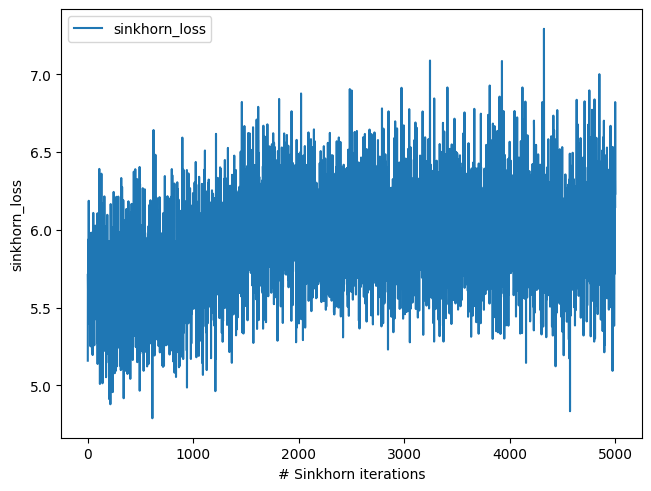

In [ ]:
sinkhorn_loss_mnar25 = torch.tensor(sinkhorn_loss_mnar25)
fig, ax = plt.subplots(constrained_layout=True)

npoints = len(sinkhorn_loss_mnar25)

ax.plot(np.linspace(0, 1, npoints) * npoints, sinkhorn_loss_mnar25.detach().numpy(), label='sinkhorn_loss')

ax.set_xticks(np.linspace(0, npoints, 6))
ax.set_xlabel('# Sinkhorn iterations')

ax.set_ylabel('sinkhorn_loss')
plt.legend()
plt.show()

CMI and MAE vs Sinkhorn Iterations

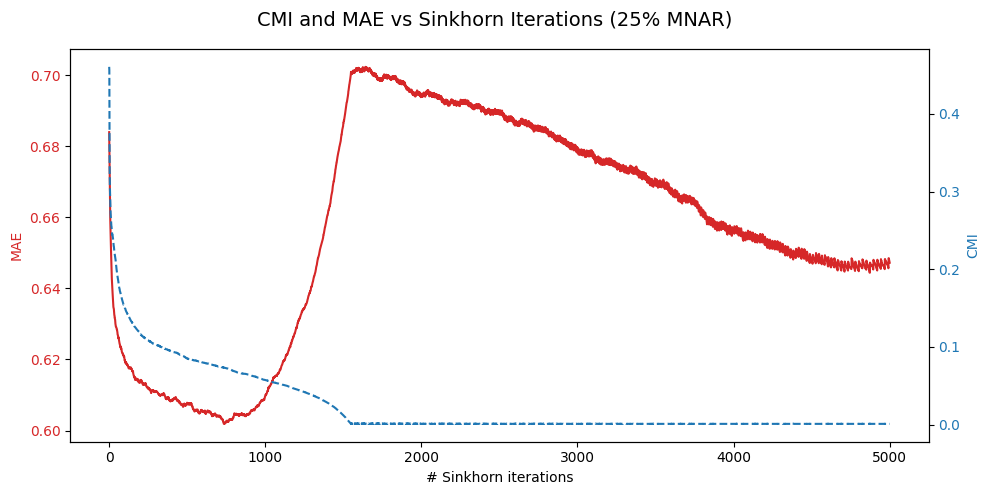

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data (replace with actual PyTorch tensors if needed)
# Convert to NumPy if these are tensors
cmi_array = cmi_loss_mnar25
mae_array = sk_maes25mnar

# Ensure both arrays are same length (or handle separately if needed)
npoints = min(len(cmi_array), len(mae_array))
x = np.linspace(0, 1, npoints) * npoints  # X-axis: Sinkhorn iterations

# Truncate both arrays to the same length for plotting
cmi_array = cmi_array[:npoints]
mae_array = mae_array[:npoints]

# Create a single plot with twin y-axes
fig, ax1 = plt.subplots(figsize=(10, 5))

# Plot MAE (left axis)
color = 'tab:red'
ax1.set_xlabel('# Sinkhorn iterations')
ax1.set_ylabel('MAE', color=color)
ax1.plot(x, mae_array, color=color, label='MAE')
ax1.tick_params(axis='y', labelcolor=color)

# Plot CMI (right axis)
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('CMI', color=color)
ax2.plot(x, cmi_array, color=color, linestyle='--', label='CMI')
ax2.tick_params(axis='y', labelcolor=color)

# Titles and layout
fig.suptitle('CMI and MAE vs Sinkhorn Iterations (25% MNAR)', fontsize=14)
fig.tight_layout()
plt.show()


MAE and CMI vs lambda_cmi

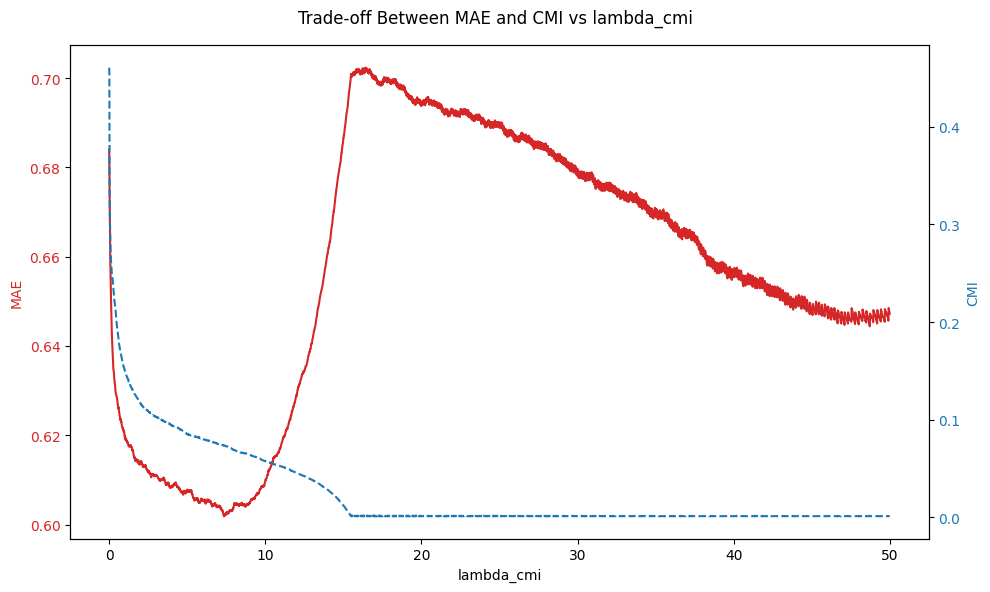

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Simulated from your training log — you should replace these with actual histories
cmi_penalty_history = cmi_loss_mnar25 # list of length 2000 from your model
mae_history = sk_maes25mnar         # list of length 2000 from your model

iterations = np.arange(len(cmi_penalty_history))
lambda_cmi_values = lamda_cmi_mnar25

# Plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# MAE
color = 'tab:red'
ax1.set_xlabel('lambda_cmi')
ax1.set_ylabel('MAE', color=color)
ax1.plot(lambda_cmi_values, mae_history, color=color, label='MAE')
ax1.tick_params(axis='y', labelcolor=color)

# CMI on same plot
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('CMI', color=color)
ax2.plot(lambda_cmi_values, cmi_penalty_history, color=color, linestyle='--', label='CMI')
ax2.tick_params(axis='y', labelcolor=color)

fig.suptitle('Trade-off Between MAE and CMI vs lambda_cmi')
fig.tight_layout()
plt.show()


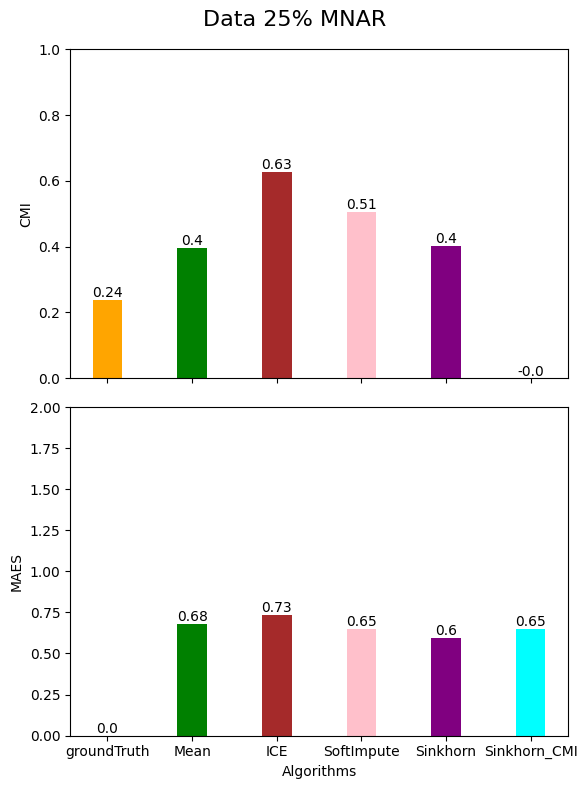

In [ ]:

# Define values and categories
values_cmi_mnar25 = [cmi_groundTruth.detach(),cmi_mean_mnar25.detach(),cmi_ice_mnar25.detach(),cmi_soft_mnar25.detach(),on_cmi_missmnar25.detach(),cmi_mnar25.detach()]
values_maes_mnar25 = [0.0,mean_mae_mnar25.detach(),ice_mae_mnar25.detach(), soft_mae_mnar25.detach(),on_sk_mae_mnar25.detach(),sk_mae_mnar25.detach()]
categories = ["groundTruth","Mean","ICE","SoftImpute","Sinkhorn","Sinkhorn_CMI"]
colors = ['orange','green','brown','pink','purple', 'cyan']

# Bar chart parameters
bar_width = 0.35 # Width of each bar
index = np.arange(len(categories))  

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 8), sharex=True)
fig.suptitle('Data 25% MNAR', fontsize=16)

# Plot CMI bars and add values on top
bars1 = ax1.bar(index, values_cmi_mnar25, color=colors, width=bar_width)
ax1.set_ylabel("CMI")
ax1.set_ylim(0, 1) 
for bar in bars1:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')

# Plot MAES bars and add values on top
bars2 = ax2.bar(index, values_maes_mnar25, color=colors, width=bar_width)
ax2.set_ylabel("MAES")
ax2.set_ylim(0, 2) 
for bar in bars2:
    yval = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')


ax2.set_xticks(index)
ax2.set_xticklabels(categories)

# Show the plot
plt.xlabel('Algorithms')
plt.tight_layout()
plt.show()


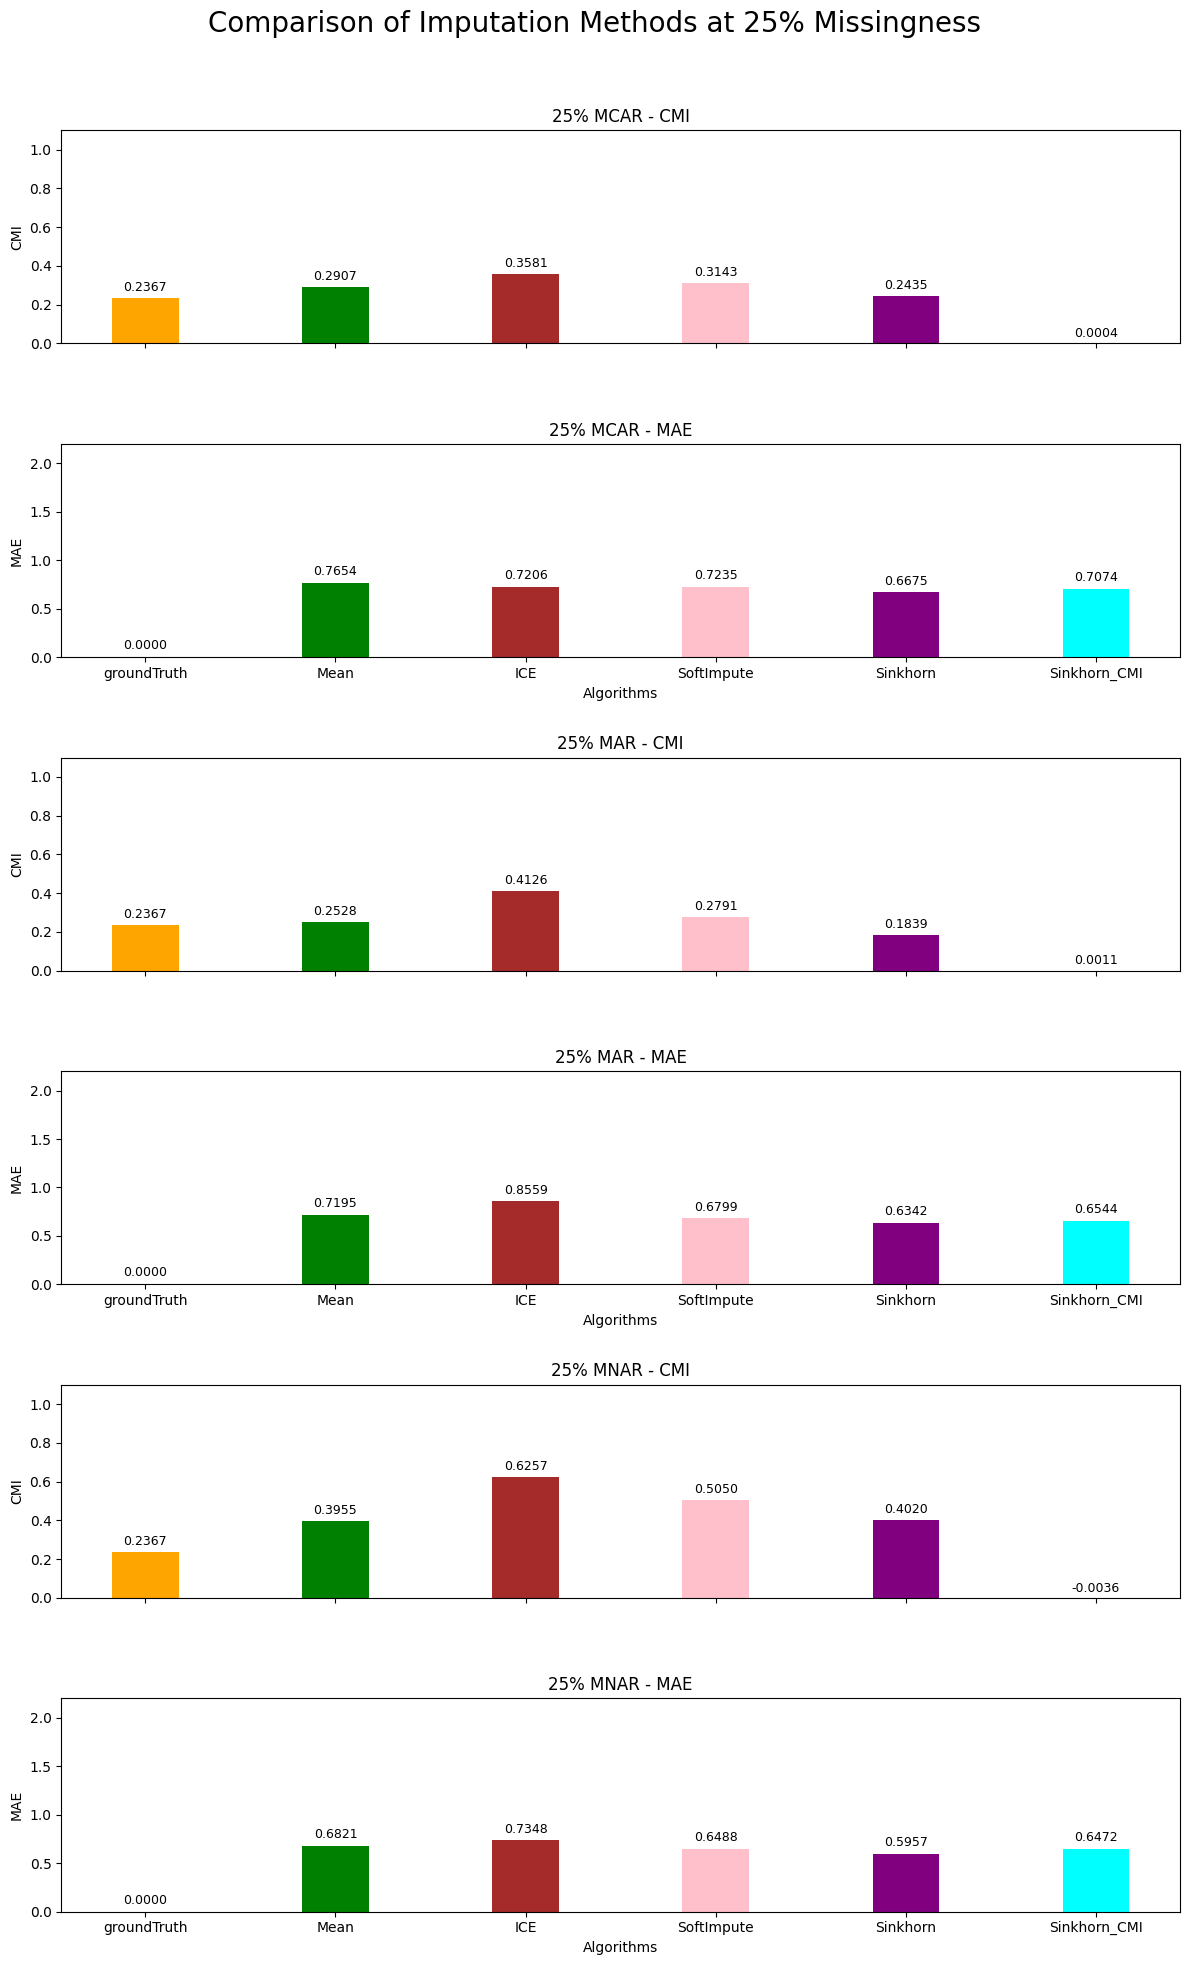

In [ ]:
fig, axes = plt.subplots(6, 1, figsize=(12, 20), sharex=False)
fig.suptitle('Comparison of Imputation Methods at 25% Missingness', fontsize=20)

# MCAR, MAR, MNAR order
plot_data = [
    ("25% MCAR", values_cmi_mcar25, values_maes_mcar25),
    ("25% MAR", values_cmi_mar25, values_maes_mar25),
    ("25% MNAR", values_cmi_mnar25, values_maes_mnar25),
]

for i, (title, cmi_vals, mae_vals) in enumerate(plot_data):
    ax_cmi = axes[i * 2]
    ax_mae = axes[i * 2 + 1]

    # ----------------- CMI Plot -----------------
    bars1 = ax_cmi.bar(index, cmi_vals, color=colors, width=bar_width)
    ax_cmi.set_ylabel("CMI")
    ax_cmi.set_ylim(0, 1.1)
    ax_cmi.set_title(f"{title} - CMI")
    for bar in bars1:
        yval = bar.get_height()
        ax_cmi.text(bar.get_x() + bar.get_width() / 2, yval + 0.02, f"{yval:.4f}", ha='center', va='bottom', fontsize=9)

    # Remove x-axis labels and ticks for CMI
    ax_cmi.set_xticks(index)
    ax_cmi.set_xticklabels([])

    # ----------------- MAE Plot -----------------
    bars2 = ax_mae.bar(index, mae_vals, color=colors, width=bar_width)
    ax_mae.set_ylabel("MAE")
    ax_mae.set_ylim(0, 2.2)
    ax_mae.set_title(f"{title} - MAE")
    for bar in bars2:
        yval = bar.get_height()
        ax_mae.text(bar.get_x() + bar.get_width() / 2, yval + 0.05, f"{yval:.4f}", ha='center', va='bottom', fontsize=9)

    ax_mae.set_xticks(index)
    ax_mae.set_xticklabels(categories, fontsize=10, rotation=0)
    ax_mae.set_xlabel("Algorithms")

plt.tight_layout(rect=[0, 0, 1, 0.96], h_pad=2.5)
plt.show()


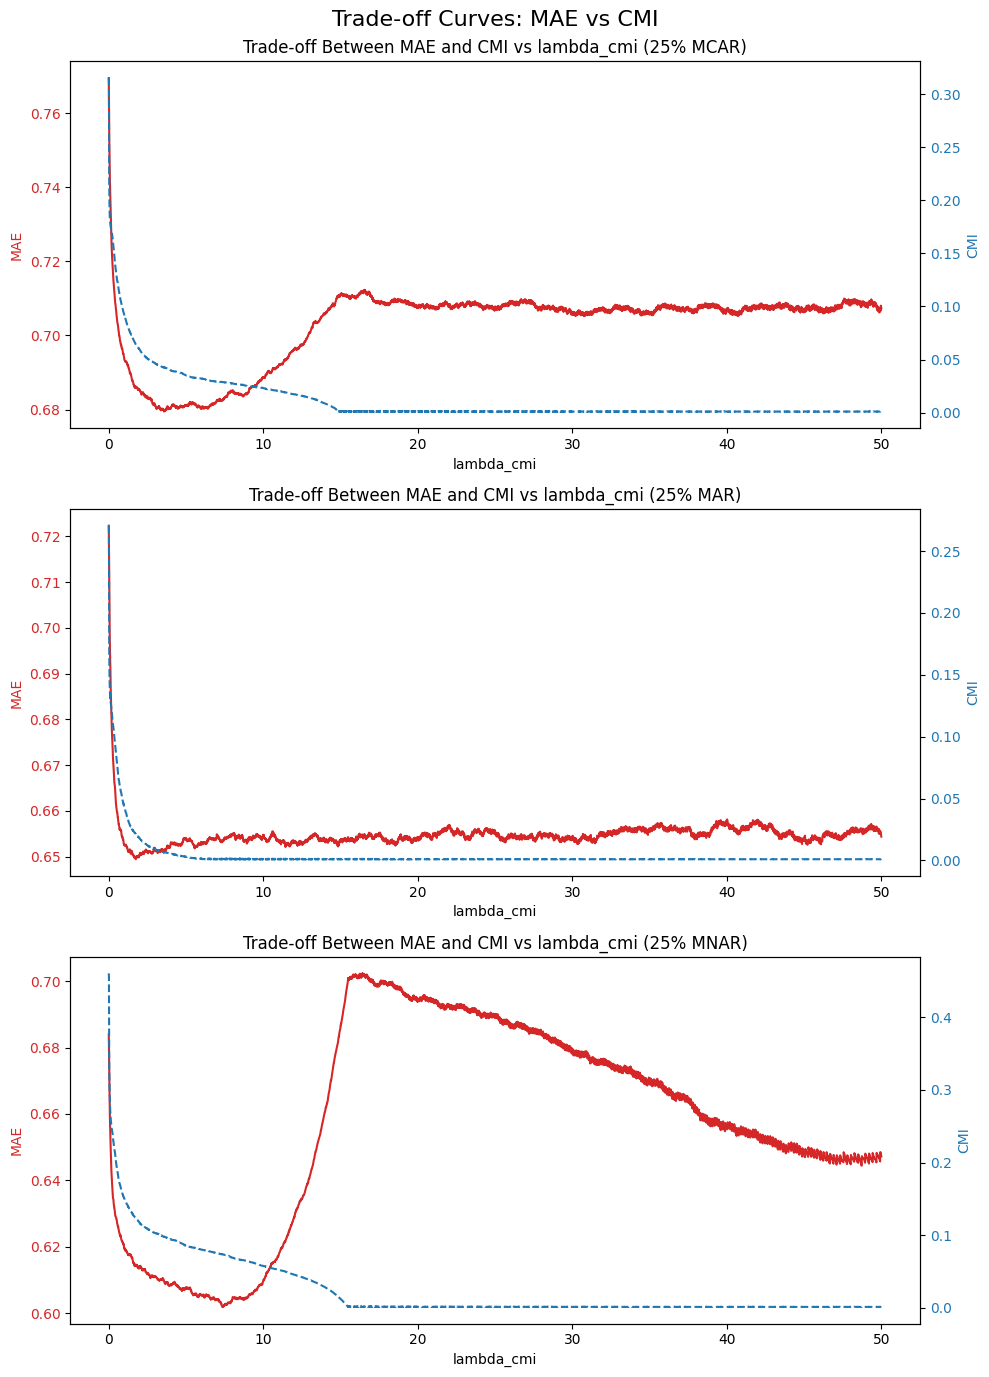

In [ ]:
fig, axes = plt.subplots(3, 1, figsize=(10, 14))

# New order: MCAR, MAR, MNAR
datasets = [
    ("25% MCAR", lamda_cmi_mcar25, sk_maes25mcar, cmi_loss_mcar25),
    ("25% MAR", lamda_cmi_mar25, sk_maes25mar, cmi_loss_mar25),
    ("25% MNAR", lamda_cmi_mnar25, sk_maes25mnar, cmi_loss_mnar25),
]

for i, (title, lambda_vals, mae_vals, cmi_vals) in enumerate(datasets):
    ax1 = axes[i]
    ax2 = ax1.twinx()

    # MAE (left y-axis)
    ax1.set_ylabel('MAE', color='tab:red')
    ax1.plot(lambda_vals, mae_vals, color='tab:red', label='MAE')
    ax1.tick_params(axis='y', labelcolor='tab:red')

    # CMI (right y-axis)
    ax2.set_ylabel('CMI', color='tab:blue')
    ax2.plot(lambda_vals, cmi_vals, color='tab:blue', linestyle='--', label='CMI')
    ax2.tick_params(axis='y', labelcolor='tab:blue')

    ax1.set_title(f'Trade-off Between MAE and CMI vs lambda_cmi ({title})')
    ax1.set_xlabel('lambda_cmi')

plt.tight_layout(rect=[0, 0, 1, 0.97])
fig.suptitle('Trade-off Curves: MAE vs CMI', fontsize=16)
plt.show()


### MCAR

### 5% MCAR

In [ ]:
cycle = 4
dependencies = None
missing_type = "MCAR"
missing_rate = 5
highest_lamda_cmi = 15
niter = 5000

mcar_sk_mae5, mcar_sk_cmi5, mcar_skCmi_mae5, mcar_skCmi_cmi5, mcar_mean_mae5, mcar_mean_cmi5, mcar_ice_mae5, mcar_ice_cmi5, mcar_soft_mae5,  mcar_soft_cmi5 = run(groundTruth_tensor, X, Y, cycle, missing_type, missing_rate, dependencies, highest_lamda_cmi, niter,bucket_specs, X_cols, Y_cols, Z_cols)

INFO:root:batchsize = 128, epsilon = 0.5471
INFO:root:Iteration 0:	 Loss: 2.5363	 Validation MAE: 0.8500	RMSE: 1.0160
INFO:root:Iteration 50:	 Loss: 2.5270	 Validation MAE: 0.7527	RMSE: 0.9762
INFO:root:Iteration 100:	 Loss: 2.5225	 Validation MAE: 0.7199	RMSE: 0.9624
INFO:root:Iteration 150:	 Loss: 2.6113	 Validation MAE: 0.6950	RMSE: 0.9496
INFO:root:Iteration 200:	 Loss: 2.5113	 Validation MAE: 0.6853	RMSE: 0.9488
INFO:root:Iteration 250:	 Loss: 2.6707	 Validation MAE: 0.6739	RMSE: 0.9457
INFO:root:Iteration 300:	 Loss: 2.3179	 Validation MAE: 0.6694	RMSE: 0.9458
INFO:root:Iteration 350:	 Loss: 2.4568	 Validation MAE: 0.6623	RMSE: 0.9459
INFO:root:Iteration 400:	 Loss: 3.1045	 Validation MAE: 0.6543	RMSE: 0.9414
INFO:root:Iteration 450:	 Loss: 2.3202	 Validation MAE: 0.6496	RMSE: 0.9351
INFO:root:Iteration 500:	 Loss: 2.3357	 Validation MAE: 0.6479	RMSE: 0.9359
INFO:root:Iteration 550:	 Loss: 2.5682	 Validation MAE: 0.6459	RMSE: 0.9372
INFO:root:Iteration 600:	 Loss: 2.4206	 Validat

In [ ]:
cycle = 4
dependencies = dependencies_mar
missing_type = "MAR"
missing_rate = 5
highest_lamda_cmi = 15
niter = 5000

mar_sk_mae5, mar_sk_cmi5, mar_skCmi_mae5, mar_skCmi_cmi5, mar_mean_mae5, mar_mean_cmi5, mar_ice_mae5, mar_ice_cmi5, mar_soft_mae5, mar_soft_cmi5 = run(groundTruth_tensor, X, Y, cycle, missing_type, missing_rate, dependencies, highest_lamda_cmi, niter,bucket_specs, X_cols, Y_cols, Z_cols)

INFO:root:batchsize = 128, epsilon = 0.5471
INFO:root:Iteration 0:	 Loss: 2.5363	 Validation MAE: 0.8500	RMSE: 1.0160
INFO:root:Iteration 50:	 Loss: 2.5270	 Validation MAE: 0.7527	RMSE: 0.9762
INFO:root:Iteration 100:	 Loss: 2.5225	 Validation MAE: 0.7199	RMSE: 0.9624
INFO:root:Iteration 150:	 Loss: 2.6113	 Validation MAE: 0.6950	RMSE: 0.9496
INFO:root:Iteration 200:	 Loss: 2.5113	 Validation MAE: 0.6853	RMSE: 0.9488
INFO:root:Iteration 250:	 Loss: 2.6707	 Validation MAE: 0.6739	RMSE: 0.9457
INFO:root:Iteration 300:	 Loss: 2.3179	 Validation MAE: 0.6694	RMSE: 0.9458
INFO:root:Iteration 350:	 Loss: 2.4568	 Validation MAE: 0.6623	RMSE: 0.9459
INFO:root:Iteration 400:	 Loss: 3.1045	 Validation MAE: 0.6543	RMSE: 0.9414
INFO:root:Iteration 450:	 Loss: 2.3202	 Validation MAE: 0.6496	RMSE: 0.9351
INFO:root:Iteration 500:	 Loss: 2.3357	 Validation MAE: 0.6479	RMSE: 0.9359
INFO:root:Iteration 550:	 Loss: 2.5682	 Validation MAE: 0.6459	RMSE: 0.9372
INFO:root:Iteration 600:	 Loss: 2.4206	 Validat

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define your algorithms
algorithms = ['Mean', 'ICE', 'SoftImpute', 'Sinkhorn', 'Sinkhorn_CMI']

# Replace with actual data
cmi_data_mar5 = {
    'Mean': mar_mean_cmi5,
    'ICE': mar_ice_cmi5,
    'SoftImpute': mar_soft_cmi5,
    'Sinkhorn': mar_sk_cmi5,
    'Sinkhorn_CMI': mar_skCmi_cmi5
}
mae_data_mar5 = {
    'Mean': mar_mean_mae5,
    'ICE': mar_ice_mae5,
    'SoftImpute': mar_soft_mae5,
    'Sinkhorn': mar_sk_mae5,
    'Sinkhorn_CMI': mar_skCmi_mae5
}

# Colors (light for MAE, dark for CMI)
color_pairs = [
    ('#ff9999', '#cc0000'),  # Mean
    ('#ffcc99', '#ff9900'),  # ICE
    ('#c2f0c2', '#339933'),  # SoftImpute
    ('#b3d1ff', '#1f77b4'),  # Sinkhorn
    ('#dab6ff', '#8000ff')   # Sinkhorn_CMI
]

x = np.arange(len(algorithms))
width = 0.35

fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

# Plot each algorithm's box individually
for i, algo in enumerate(algorithms):
    mae_vals = mae_data_mar5[algo]
    cmi_vals = cmi_data_mar5[algo]

    # MAE box (lighter color)
    ax1.boxplot(mae_vals, positions=[x[i] - width/2], widths=0.25, patch_artist=True,
                boxprops=dict(facecolor=color_pairs[i][0], color='black'),
                medianprops=dict(color='black'),
                capprops=dict(color='black'),
                whiskerprops=dict(color='black'),
                flierprops=dict(markerfacecolor=color_pairs[i][0], marker='o', alpha=0.5))

    # CMI box (darker color)
    ax2.boxplot(cmi_vals, positions=[x[i] + width/2], widths=0.25, patch_artist=True,
                boxprops=dict(facecolor=color_pairs[i][1], color='black'),
                medianprops=dict(color='black'),
                capprops=dict(color='black'),
                whiskerprops=dict(color='black'),
                flierprops=dict(markerfacecolor=color_pairs[i][1], marker='o', alpha=0.5))

# Axes settings
ax1.set_xlabel('Algorithms')
ax1.set_ylabel('MAE', color='black')
ax2.set_ylabel('CMI', color='black')
ax1.set_xticks(x)
ax1.set_xticklabels(algorithms)
ax1.set_title('MAE vs CMI for Different Algorithms (5% MAR)')

ax1.tick_params(axis='y', labelcolor='black')
ax2.tick_params(axis='y', labelcolor='black')

# Custom legend
handles = [
    plt.Line2D([], [], color=pair[0], marker='s', linestyle='None', markersize=5, label=f'{algo} MAE')
    for algo, pair in zip(algorithms, color_pairs)
] + [
    plt.Line2D([], [], color=pair[1], marker='s', linestyle='None', markersize=5, label=f'{algo} CMI')
    for algo, pair in zip(algorithms, color_pairs)
]
ax1.legend(handles=handles, bbox_to_anchor=(1.10, 1), loc='upper left')

plt.tight_layout()
plt.show()


KeyboardInterrupt: 

### 10% MAR

In [ ]:
cycle = 4
dependencies = dependencies_mar
missing_type = "MAR"
missing_rate = 10
highest_lamda_cmi = 15
niter = 5000
mar_sk_mae10, mar_sk_cmi10, mar_skCmi_mae10, mar_skCmi_cmi10, mar_mean_mae10, mar_mean_cmi10, mar_ice_mae10, mar_ice_cmi10, mar_soft_mae10, mar_soft_cmi10 = run(groundTruth_tensor, X, Y, cycle, missing_type, missing_rate, dependencies, highest_lamda_cmi, niter,bucket_specs, X_cols, Y_cols, Z_cols)

INFO:root:batchsize = 128, epsilon = 0.5221
INFO:root:Iteration 0:	 Loss: 2.5271	 Validation MAE: 0.8781	RMSE: 1.0560
INFO:root:Iteration 50:	 Loss: 2.2761	 Validation MAE: 0.7727	RMSE: 1.0074
INFO:root:Iteration 100:	 Loss: 2.4283	 Validation MAE: 0.7362	RMSE: 0.9919
INFO:root:Iteration 150:	 Loss: 2.2363	 Validation MAE: 0.7174	RMSE: 0.9874
INFO:root:Iteration 200:	 Loss: 2.5400	 Validation MAE: 0.7016	RMSE: 0.9807
INFO:root:Iteration 250:	 Loss: 2.4012	 Validation MAE: 0.6914	RMSE: 0.9786
INFO:root:Iteration 300:	 Loss: 2.2598	 Validation MAE: 0.6838	RMSE: 0.9752
INFO:root:Iteration 350:	 Loss: 2.3362	 Validation MAE: 0.6745	RMSE: 0.9715
INFO:root:Iteration 400:	 Loss: 2.1902	 Validation MAE: 0.6716	RMSE: 0.9710
INFO:root:Iteration 450:	 Loss: 2.2093	 Validation MAE: 0.6664	RMSE: 0.9683
INFO:root:Iteration 500:	 Loss: 2.0970	 Validation MAE: 0.6621	RMSE: 0.9652
INFO:root:Iteration 550:	 Loss: 2.2531	 Validation MAE: 0.6634	RMSE: 0.9681
INFO:root:Iteration 600:	 Loss: 2.1888	 Validat

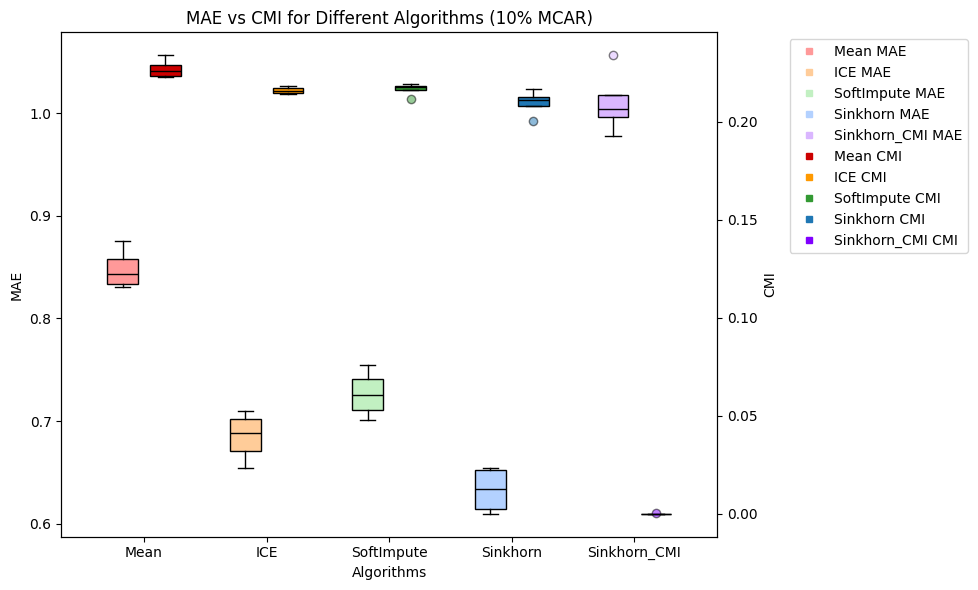

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define your algorithms
algorithms = ['Mean', 'ICE', 'SoftImpute', 'Sinkhorn', 'Sinkhorn_CMI']

# Replace with actual data
cmi_data_mar10 = {
    'Mean': mar_mean_cmi10,
    'ICE': mar_ice_cmi10,
    'SoftImpute': mar_soft_cmi10,
    'Sinkhorn': mar_sk_cmi10,
    'Sinkhorn_CMI': mar_skCmi_cmi10
}
mae_data_mar10 = {
    'Mean': mar_mean_mae10,
    'ICE': mar_ice_mae10,
    'SoftImpute': mar_soft_mae10,
    'Sinkhorn': mar_sk_mae10,
    'Sinkhorn_CMI': mar_skCmi_mae10
}

# Colors (light for MAE, dark for CMI)
color_pairs = [
    ('#ff9999', '#cc0000'),  # Mean
    ('#ffcc99', '#ff9900'),  # ICE
    ('#c2f0c2', '#339933'),  # SoftImpute
    ('#b3d1ff', '#1f77b4'),  # Sinkhorn
    ('#dab6ff', '#8000ff')   # Sinkhorn_CMI
]

x = np.arange(len(algorithms))
width = 0.35

fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

# Plot each algorithm's box individually
for i, algo in enumerate(algorithms):
    mae_vals = mae_data_mar10[algo]
    cmi_vals = cmi_data_mar10[algo]

    # MAE box (lighter color)
    ax1.boxplot(mae_vals, positions=[x[i] - width/2], widths=0.25, patch_artist=True,
                boxprops=dict(facecolor=color_pairs[i][0], color='black'),
                medianprops=dict(color='black'),
                capprops=dict(color='black'),
                whiskerprops=dict(color='black'),
                flierprops=dict(markerfacecolor=color_pairs[i][0], marker='o', alpha=0.5))

    # CMI box (darker color)
    ax2.boxplot(cmi_vals, positions=[x[i] + width/2], widths=0.25, patch_artist=True,
                boxprops=dict(facecolor=color_pairs[i][1], color='black'),
                medianprops=dict(color='black'),
                capprops=dict(color='black'),
                whiskerprops=dict(color='black'),
                flierprops=dict(markerfacecolor=color_pairs[i][1], marker='o', alpha=0.5))

# Axes settings
ax1.set_xlabel('Algorithms')
ax1.set_ylabel('MAE', color='black')
ax2.set_ylabel('CMI', color='black')
ax1.set_xticks(x)
ax1.set_xticklabels(algorithms)
ax1.set_title('MAE vs CMI for Different Algorithms (10% MAR)')

ax1.tick_params(axis='y', labelcolor='black')
ax2.tick_params(axis='y', labelcolor='black')

# Custom legend
handles = [
    plt.Line2D([], [], color=pair[0], marker='s', linestyle='None', markersize=5, label=f'{algo} MAE')
    for algo, pair in zip(algorithms, color_pairs)
] + [
    plt.Line2D([], [], color=pair[1], marker='s', linestyle='None', markersize=5, label=f'{algo} CMI')
    for algo, pair in zip(algorithms, color_pairs)
]
ax1.legend(handles=handles, bbox_to_anchor=(1.10, 1), loc='upper left')

plt.tight_layout()
plt.show()


### 15% MAR

In [ ]:
cycle = 4
dependencies = dependencies_mar
missing_type = "MAR"
missing_rate = 15
highest_lamda_cmi = 15
niter = 5000
mar_sk_mae15, mar_sk_cmi15, mar_skCmi_mae15, mar_skCmi_cmi15, mar_mean_mae15, mar_mean_cmi15, mar_ice_mae15, mar_ice_cmi15, mar_soft_mae15, mar_soft_cmi15 = run(groundTruth_tensor, X, Y, cycle, missing_type, missing_rate, dependencies, highest_lamda_cmi, niter,bucket_specs, X_cols, Y_cols, Z_cols)

INFO:root:batchsize = 128, epsilon = 0.4912
INFO:root:Iteration 0:	 Loss: 2.3263	 Validation MAE: 0.8430	RMSE: 1.0001
INFO:root:Iteration 50:	 Loss: 2.2554	 Validation MAE: 0.7537	RMSE: 0.9683
INFO:root:Iteration 100:	 Loss: 2.1644	 Validation MAE: 0.7223	RMSE: 0.9587
INFO:root:Iteration 150:	 Loss: 2.1129	 Validation MAE: 0.7047	RMSE: 0.9549
INFO:root:Iteration 200:	 Loss: 2.2498	 Validation MAE: 0.6947	RMSE: 0.9549
INFO:root:Iteration 250:	 Loss: 2.3506	 Validation MAE: 0.6846	RMSE: 0.9502
INFO:root:Iteration 300:	 Loss: 2.3762	 Validation MAE: 0.6805	RMSE: 0.9491
INFO:root:Iteration 350:	 Loss: 2.2683	 Validation MAE: 0.6780	RMSE: 0.9505
INFO:root:Iteration 400:	 Loss: 2.1121	 Validation MAE: 0.6742	RMSE: 0.9512
INFO:root:Iteration 450:	 Loss: 2.0293	 Validation MAE: 0.6711	RMSE: 0.9531
INFO:root:Iteration 500:	 Loss: 1.9154	 Validation MAE: 0.6678	RMSE: 0.9527
INFO:root:Iteration 550:	 Loss: 2.2961	 Validation MAE: 0.6696	RMSE: 0.9558
INFO:root:Iteration 600:	 Loss: 2.2112	 Validat

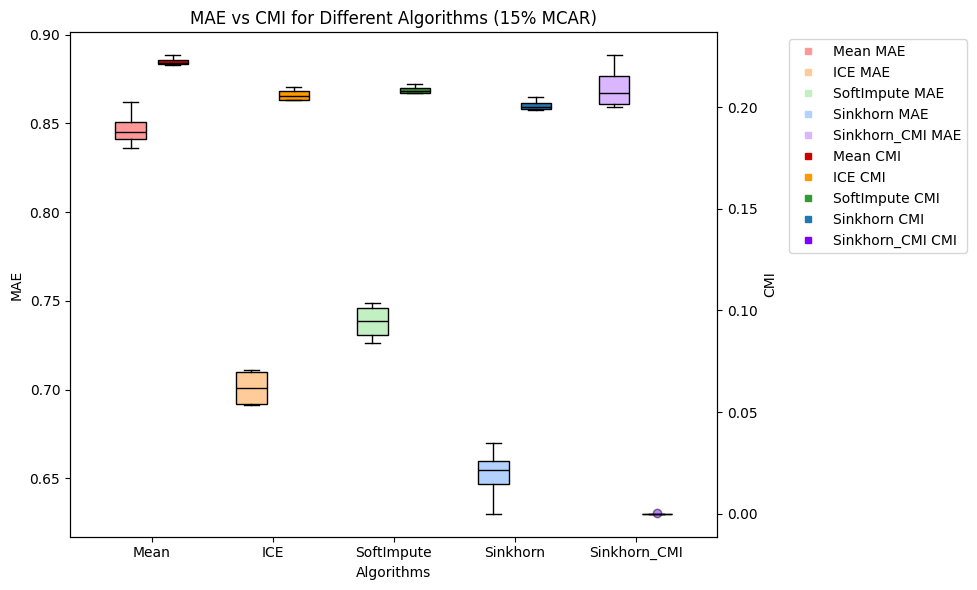

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define your algorithms
algorithms = ['Mean', 'ICE', 'SoftImpute', 'Sinkhorn', 'Sinkhorn_CMI']

# Replace with actual data
cmi_data_mar15 = {
    'Mean': mar_mean_cmi15,
    'ICE': mar_ice_cmi15,
    'SoftImpute': mar_soft_cmi15,
    'Sinkhorn': mar_sk_cmi15,
    'Sinkhorn_CMI': mar_skCmi_cmi15
}
mae_data_mar15 = {
    'Mean': mar_mean_mae15,
    'ICE': mar_ice_mae15,
    'SoftImpute': mar_soft_mae15,
    'Sinkhorn': mar_sk_mae15,
    'Sinkhorn_CMI': mar_skCmi_mae15
}

# Colors (light for MAE, dark for CMI)
color_pairs = [
    ('#ff9999', '#cc0000'),  # Mean
    ('#ffcc99', '#ff9900'),  # ICE
    ('#c2f0c2', '#339933'),  # SoftImpute
    ('#b3d1ff', '#1f77b4'),  # Sinkhorn
    ('#dab6ff', '#8000ff')   # Sinkhorn_CMI
]

x = np.arange(len(algorithms))
width = 0.35

fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

# Plot each algorithm's box individually
for i, algo in enumerate(algorithms):
    mae_vals = mae_data_mar15[algo]
    cmi_vals = cmi_data_mar15[algo]

    # MAE box (lighter color)
    ax1.boxplot(mae_vals, positions=[x[i] - width/2], widths=0.25, patch_artist=True,
                boxprops=dict(facecolor=color_pairs[i][0], color='black'),
                medianprops=dict(color='black'),
                capprops=dict(color='black'),
                whiskerprops=dict(color='black'),
                flierprops=dict(markerfacecolor=color_pairs[i][0], marker='o', alpha=0.5))

    # CMI box (darker color)
    ax2.boxplot(cmi_vals, positions=[x[i] + width/2], widths=0.25, patch_artist=True,
                boxprops=dict(facecolor=color_pairs[i][1], color='black'),
                medianprops=dict(color='black'),
                capprops=dict(color='black'),
                whiskerprops=dict(color='black'),
                flierprops=dict(markerfacecolor=color_pairs[i][1], marker='o', alpha=0.5))

# Axes settings
ax1.set_xlabel('Algorithms')
ax1.set_ylabel('MAE', color='black')
ax2.set_ylabel('CMI', color='black')
ax1.set_xticks(x)
ax1.set_xticklabels(algorithms)
ax1.set_title('MAE vs CMI for Different Algorithms (15% MAR)')

ax1.tick_params(axis='y', labelcolor='black')
ax2.tick_params(axis='y', labelcolor='black')

# Custom legend
handles = [
    plt.Line2D([], [], color=pair[0], marker='s', linestyle='None', markersize=5, label=f'{algo} MAE')
    for algo, pair in zip(algorithms, color_pairs)
] + [
    plt.Line2D([], [], color=pair[1], marker='s', linestyle='None', markersize=5, label=f'{algo} CMI')
    for algo, pair in zip(algorithms, color_pairs)
]
ax1.legend(handles=handles, bbox_to_anchor=(1.10, 1), loc='upper left')

plt.tight_layout()
plt.show()


### 20% MAR

In [ ]:
cycle = 4
dependencies = dependencies_mar
missing_type = "MAR"
missing_rate = 20
highest_lamda_cmi = 15
niter = 5000
mar_sk_mae20, mar_sk_cmi20, mar_skCmi_mae20, mar_skCmi_cmi20, mar_mean_mae20, mar_mean_cmi20, mar_ice_mae20, mar_ice_cmi20, mar_soft_mae20, mar_soft_cmi20 = run(groundTruth_tensor, X, Y, cycle, missing_type, missing_rate, dependencies, highest_lamda_cmi, niter,bucket_specs, X_cols, Y_cols, Z_cols)

INFO:root:batchsize = 128, epsilon = 0.4633
INFO:root:Iteration 0:	 Loss: 2.6567	 Validation MAE: 0.8531	RMSE: 1.0042
INFO:root:Iteration 50:	 Loss: 2.0398	 Validation MAE: 0.7599	RMSE: 0.9735
INFO:root:Iteration 100:	 Loss: 2.0552	 Validation MAE: 0.7289	RMSE: 0.9665
INFO:root:Iteration 150:	 Loss: 1.9240	 Validation MAE: 0.7126	RMSE: 0.9637
INFO:root:Iteration 200:	 Loss: 2.1285	 Validation MAE: 0.6986	RMSE: 0.9621
INFO:root:Iteration 250:	 Loss: 2.0264	 Validation MAE: 0.6875	RMSE: 0.9557
INFO:root:Iteration 300:	 Loss: 1.9867	 Validation MAE: 0.6799	RMSE: 0.9551
INFO:root:Iteration 350:	 Loss: 2.2002	 Validation MAE: 0.6740	RMSE: 0.9539
INFO:root:Iteration 400:	 Loss: 1.9239	 Validation MAE: 0.6739	RMSE: 0.9562
INFO:root:Iteration 450:	 Loss: 1.9685	 Validation MAE: 0.6706	RMSE: 0.9567
INFO:root:Iteration 500:	 Loss: 2.0511	 Validation MAE: 0.6688	RMSE: 0.9559
INFO:root:Iteration 550:	 Loss: 2.2345	 Validation MAE: 0.6661	RMSE: 0.9552
INFO:root:Iteration 600:	 Loss: 2.0395	 Validat

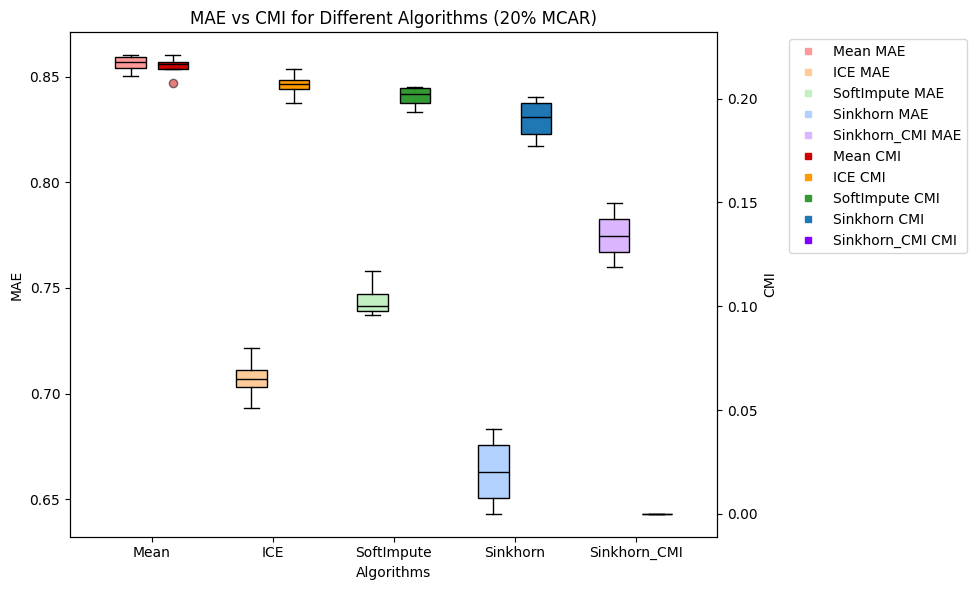

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define your algorithms
algorithms = ['Mean', 'ICE', 'SoftImpute', 'Sinkhorn', 'Sinkhorn_CMI']

# Replace with actual data
cmi_data_mar20 = {
    'Mean': mar_mean_cmi20,
    'ICE': mar_ice_cmi20,
    'SoftImpute': mar_soft_cmi20,
    'Sinkhorn': mar_sk_cmi20,
    'Sinkhorn_CMI': mar_skCmi_cmi20
}
mae_data_mar20 = {
    'Mean': mar_mean_mae20,
    'ICE': mar_ice_mae20,
    'SoftImpute': mar_soft_mae20,
    'Sinkhorn': mar_sk_mae20,
    'Sinkhorn_CMI': mar_skCmi_mae20
}

# Colors (light for MAE, dark for CMI)
color_pairs = [
    ('#ff9999', '#cc0000'),  # Mean
    ('#ffcc99', '#ff9900'),  # ICE
    ('#c2f0c2', '#339933'),  # SoftImpute
    ('#b3d1ff', '#1f77b4'),  # Sinkhorn
    ('#dab6ff', '#8000ff')   # Sinkhorn_CMI
]

x = np.arange(len(algorithms))
width = 0.35

fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

# Plot each algorithm's box individually
for i, algo in enumerate(algorithms):
    mae_vals = mae_data_mar20[algo]
    cmi_vals = cmi_data_mar20[algo]

    # MAE box (lighter color)
    ax1.boxplot(mae_vals, positions=[x[i] - width/2], widths=0.25, patch_artist=True,
                boxprops=dict(facecolor=color_pairs[i][0], color='black'),
                medianprops=dict(color='black'),
                capprops=dict(color='black'),
                whiskerprops=dict(color='black'),
                flierprops=dict(markerfacecolor=color_pairs[i][0], marker='o', alpha=0.5))

    # CMI box (darker color)
    ax2.boxplot(cmi_vals, positions=[x[i] + width/2], widths=0.25, patch_artist=True,
                boxprops=dict(facecolor=color_pairs[i][1], color='black'),
                medianprops=dict(color='black'),
                capprops=dict(color='black'),
                whiskerprops=dict(color='black'),
                flierprops=dict(markerfacecolor=color_pairs[i][1], marker='o', alpha=0.5))

# Axes settings
ax1.set_xlabel('Algorithms')
ax1.set_ylabel('MAE', color='black')
ax2.set_ylabel('CMI', color='black')
ax1.set_xticks(x)
ax1.set_xticklabels(algorithms)
ax1.set_title('MAE vs CMI for Different Algorithms (20% MAR)')

ax1.tick_params(axis='y', labelcolor='black')
ax2.tick_params(axis='y', labelcolor='black')

# Custom legend
handles = [
    plt.Line2D([], [], color=pair[0], marker='s', linestyle='None', markersize=5, label=f'{algo} MAE')
    for algo, pair in zip(algorithms, color_pairs)
] + [
    plt.Line2D([], [], color=pair[1], marker='s', linestyle='None', markersize=5, label=f'{algo} CMI')
    for algo, pair in zip(algorithms, color_pairs)
]
ax1.legend(handles=handles, bbox_to_anchor=(1.10, 1), loc='upper left')

plt.tight_layout()
plt.show()


### 25% MAR

In [ ]:
cycle = 4
dependencies = dependencies_mar
missing_type = "MAR"
missing_rate = 25
highest_lamda_cmi = 15
niter = 5000
mar_sk_mae25, mar_sk_cmi25, mar_skCmi_mae25, mar_skCmi_cmi25, mar_mean_mae25, mar_mean_cmi25, mar_ice_mae25, mar_ice_cmi25, mar_soft_mae25, mar_soft_cmi25 = run(groundTruth_tensor, X, Y, cycle, missing_type, missing_rate, dependencies, highest_lamda_cmi, niter,bucket_specs, X_cols, Y_cols, Z_cols)

INFO:root:batchsize = 128, epsilon = 0.4401
INFO:root:Iteration 0:	 Loss: 2.1551	 Validation MAE: 0.8512	RMSE: 1.0108
INFO:root:Iteration 50:	 Loss: 2.3569	 Validation MAE: 0.7668	RMSE: 0.9836
INFO:root:Iteration 100:	 Loss: 1.8705	 Validation MAE: 0.7347	RMSE: 0.9738
INFO:root:Iteration 150:	 Loss: 2.0333	 Validation MAE: 0.7132	RMSE: 0.9683
INFO:root:Iteration 200:	 Loss: 2.0180	 Validation MAE: 0.6978	RMSE: 0.9650
INFO:root:Iteration 250:	 Loss: 2.0146	 Validation MAE: 0.6875	RMSE: 0.9634
INFO:root:Iteration 300:	 Loss: 1.8338	 Validation MAE: 0.6820	RMSE: 0.9630
INFO:root:Iteration 350:	 Loss: 1.9957	 Validation MAE: 0.6746	RMSE: 0.9600
INFO:root:Iteration 400:	 Loss: 2.0228	 Validation MAE: 0.6703	RMSE: 0.9587
INFO:root:Iteration 450:	 Loss: 2.0789	 Validation MAE: 0.6678	RMSE: 0.9585
INFO:root:Iteration 500:	 Loss: 1.6837	 Validation MAE: 0.6632	RMSE: 0.9560
INFO:root:Iteration 550:	 Loss: 2.1854	 Validation MAE: 0.6614	RMSE: 0.9567
INFO:root:Iteration 600:	 Loss: 1.5866	 Validat

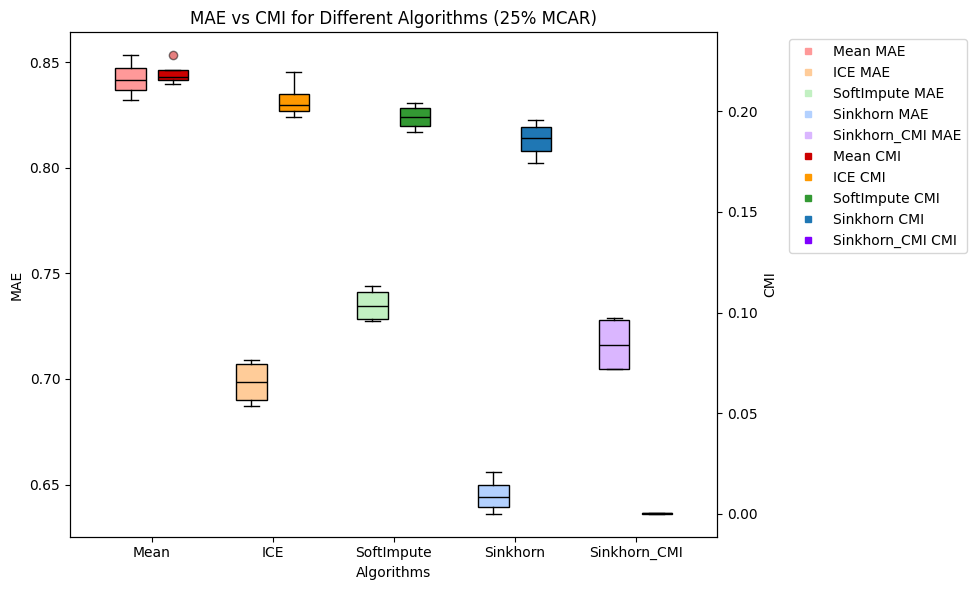

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define your algorithms
algorithms = ['Mean', 'ICE', 'SoftImpute', 'Sinkhorn', 'Sinkhorn_CMI']

# Replace with actual data
cmi_data_mar25 = {
    'Mean': mar_mean_cmi25,
    'ICE': mar_ice_cmi25,
    'SoftImpute': mar_soft_cmi25,
    'Sinkhorn': mar_sk_cmi25,
    'Sinkhorn_CMI': mar_skCmi_cmi25
}
mae_data_mar25 = {
    'Mean': mar_mean_mae25,
    'ICE': mar_ice_mae25,
    'SoftImpute': mar_soft_mae25,
    'Sinkhorn': mar_sk_mae25,
    'Sinkhorn_CMI': mar_skCmi_mae25
}

# Colors (light for MAE, dark for CMI)
color_pairs = [
    ('#ff9999', '#cc0000'),  # Mean
    ('#ffcc99', '#ff9900'),  # ICE
    ('#c2f0c2', '#339933'),  # SoftImpute
    ('#b3d1ff', '#1f77b4'),  # Sinkhorn
    ('#dab6ff', '#8000ff')   # Sinkhorn_CMI
]

x = np.arange(len(algorithms))
width = 0.35

fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

# Plot each algorithm's box individually
for i, algo in enumerate(algorithms):
    mae_vals = mae_data_mar25[algo]
    cmi_vals = cmi_data_mar25[algo]

    # MAE box (lighter color)
    ax1.boxplot(mae_vals, positions=[x[i] - width/2], widths=0.25, patch_artist=True,
                boxprops=dict(facecolor=color_pairs[i][0], color='black'),
                medianprops=dict(color='black'),
                capprops=dict(color='black'),
                whiskerprops=dict(color='black'),
                flierprops=dict(markerfacecolor=color_pairs[i][0], marker='o', alpha=0.5))

    # CMI box (darker color)
    ax2.boxplot(cmi_vals, positions=[x[i] + width/2], widths=0.25, patch_artist=True,
                boxprops=dict(facecolor=color_pairs[i][1], color='black'),
                medianprops=dict(color='black'),
                capprops=dict(color='black'),
                whiskerprops=dict(color='black'),
                flierprops=dict(markerfacecolor=color_pairs[i][1], marker='o', alpha=0.5))

# Axes settings
ax1.set_xlabel('Algorithms')
ax1.set_ylabel('MAE', color='black')
ax2.set_ylabel('CMI', color='black')
ax1.set_xticks(x)
ax1.set_xticklabels(algorithms)
ax1.set_title('MAE vs CMI for Different Algorithms (25% MAR)')

ax1.tick_params(axis='y', labelcolor='black')
ax2.tick_params(axis='y', labelcolor='black')

# Custom legend
handles = [
    plt.Line2D([], [], color=pair[0], marker='s', linestyle='None', markersize=5, label=f'{algo} MAE')
    for algo, pair in zip(algorithms, color_pairs)
] + [
    plt.Line2D([], [], color=pair[1], marker='s', linestyle='None', markersize=5, label=f'{algo} CMI')
    for algo, pair in zip(algorithms, color_pairs)
]
ax1.legend(handles=handles, bbox_to_anchor=(1.10, 1), loc='upper left')

plt.tight_layout()
plt.show()


### 30% MAR

In [ ]:
cycle = 4
dependencies = dependencies_mar
missing_type = "MAR"
missing_rate = 30
highest_lamda_cmi = 15
niter = 5000
mar_sk_mae30, mar_sk_cmi30, mar_skCmi_mae30, mar_skCmi_cmi30, mar_mean_mae30, mar_mean_cmi30, mar_ice_mae30, mar_ice_cmi30, mar_soft_mae30, mar_soft_cmi30 = run(groundTruth_tensor, X, Y, cycle, missing_type, missing_rate, dependencies, highest_lamda_cmi, niter,bucket_specs, X_cols, Y_cols, Z_cols)

INFO:root:batchsize = 128, epsilon = 0.4101
INFO:root:Iteration 0:	 Loss: 2.1431	 Validation MAE: 0.8581	RMSE: 1.0108
INFO:root:Iteration 50:	 Loss: 2.2576	 Validation MAE: 0.7654	RMSE: 0.9772
INFO:root:Iteration 100:	 Loss: 1.9420	 Validation MAE: 0.7318	RMSE: 0.9677
INFO:root:Iteration 150:	 Loss: 1.7966	 Validation MAE: 0.7117	RMSE: 0.9635
INFO:root:Iteration 200:	 Loss: 2.3071	 Validation MAE: 0.6977	RMSE: 0.9607
INFO:root:Iteration 250:	 Loss: 1.8645	 Validation MAE: 0.6890	RMSE: 0.9610
INFO:root:Iteration 300:	 Loss: 2.0195	 Validation MAE: 0.6845	RMSE: 0.9618
INFO:root:Iteration 350:	 Loss: 1.7765	 Validation MAE: 0.6803	RMSE: 0.9611
INFO:root:Iteration 400:	 Loss: 1.9048	 Validation MAE: 0.6751	RMSE: 0.9601
INFO:root:Iteration 450:	 Loss: 2.1189	 Validation MAE: 0.6713	RMSE: 0.9604
INFO:root:Iteration 500:	 Loss: 2.0664	 Validation MAE: 0.6687	RMSE: 0.9599
INFO:root:Iteration 550:	 Loss: 1.9812	 Validation MAE: 0.6662	RMSE: 0.9599
INFO:root:Iteration 600:	 Loss: 2.0450	 Validat

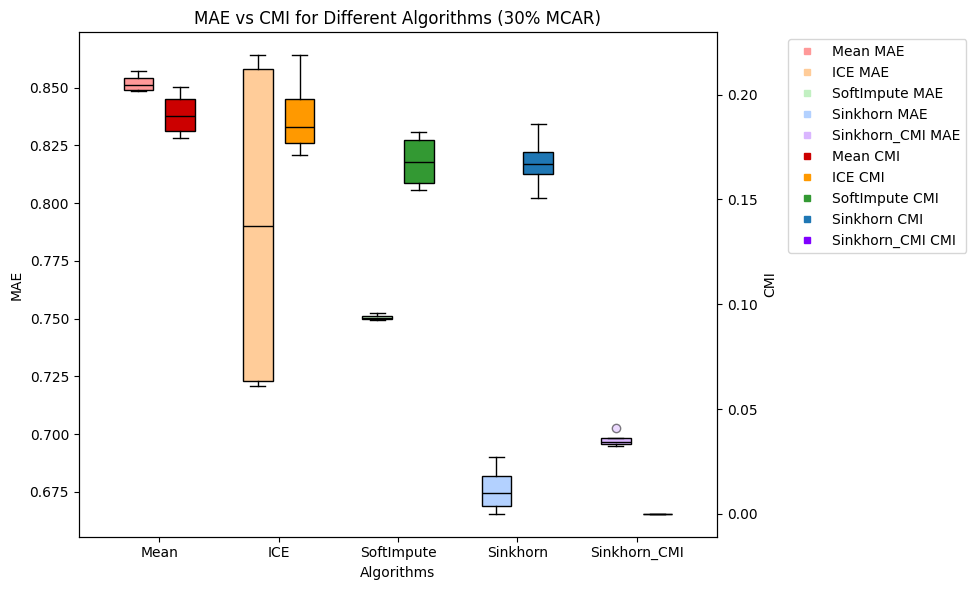

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define your algorithms
algorithms = ['Mean', 'ICE', 'SoftImpute', 'Sinkhorn', 'Sinkhorn_CMI']

# Replace with actual data
cmi_data_mar30 = {
    'Mean': mar_mean_cmi30,
    'ICE': mar_ice_cmi30,
    'SoftImpute': mar_soft_cmi30,
    'Sinkhorn': mar_sk_cmi30,
    'Sinkhorn_CMI': mar_skCmi_cmi30
}
mae_data_mar30 = {
    'Mean': mar_mean_mae30,
    'ICE': mar_ice_mae30,
    'SoftImpute': mar_soft_mae30,
    'Sinkhorn': mar_sk_mae30,
    'Sinkhorn_CMI': mar_skCmi_mae30
}

# Colors (light for MAE, dark for CMI)
color_pairs = [
    ('#ff9999', '#cc0000'),  # Mean
    ('#ffcc99', '#ff9900'),  # ICE
    ('#c2f0c2', '#339933'),  # SoftImpute
    ('#b3d1ff', '#1f77b4'),  # Sinkhorn
    ('#dab6ff', '#8000ff')   # Sinkhorn_CMI
]

x = np.arange(len(algorithms))
width = 0.35

fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

# Plot each algorithm's box individually
for i, algo in enumerate(algorithms):
    mae_vals = mae_data_mar30[algo]
    cmi_vals = cmi_data_mar30[algo]

    # MAE box (lighter color)
    ax1.boxplot(mae_vals, positions=[x[i] - width/2], widths=0.25, patch_artist=True,
                boxprops=dict(facecolor=color_pairs[i][0], color='black'),
                medianprops=dict(color='black'),
                capprops=dict(color='black'),
                whiskerprops=dict(color='black'),
                flierprops=dict(markerfacecolor=color_pairs[i][0], marker='o', alpha=0.5))

    # CMI box (darker color)
    ax2.boxplot(cmi_vals, positions=[x[i] + width/2], widths=0.25, patch_artist=True,
                boxprops=dict(facecolor=color_pairs[i][1], color='black'),
                medianprops=dict(color='black'),
                capprops=dict(color='black'),
                whiskerprops=dict(color='black'),
                flierprops=dict(markerfacecolor=color_pairs[i][1], marker='o', alpha=0.5))

# Axes settings
ax1.set_xlabel('Algorithms')
ax1.set_ylabel('MAE', color='black')
ax2.set_ylabel('CMI', color='black')
ax1.set_xticks(x)
ax1.set_xticklabels(algorithms)
ax1.set_title('MAE vs CMI for Different Algorithms (30% MAR)')

ax1.tick_params(axis='y', labelcolor='black')
ax2.tick_params(axis='y', labelcolor='black')

# Custom legend
handles = [
    plt.Line2D([], [], color=pair[0], marker='s', linestyle='None', markersize=5, label=f'{algo} MAE')
    for algo, pair in zip(algorithms, color_pairs)
] + [
    plt.Line2D([], [], color=pair[1], marker='s', linestyle='None', markersize=5, label=f'{algo} CMI')
    for algo, pair in zip(algorithms, color_pairs)
]
ax1.legend(handles=handles, bbox_to_anchor=(1.10, 1), loc='upper left')

plt.tight_layout()
plt.show()


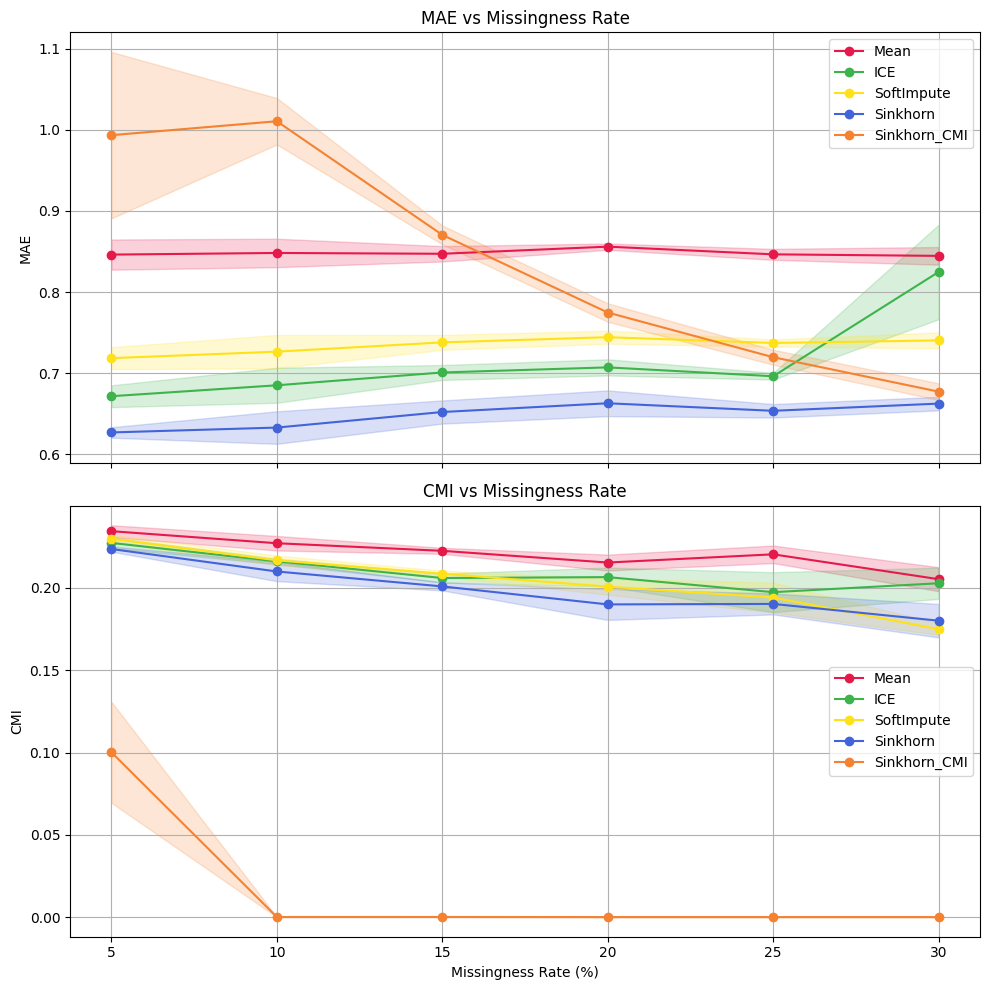

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

missing_rates = [5, 10, 15, 20, 25, 30]
algorithms = ['Mean', 'ICE', 'SoftImpute', 'Sinkhorn', 'Sinkhorn_CMI']
colors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231']

# Replace the below placeholders with actual numpy arrays (shape: [6, 4] if 4 runs per rate)
mae_results = {
    'Mean': [mar_mean_mae5, mar_mean_mae10, mar_mean_mae15, mar_mean_mae20, mar_mean_mae25, mar_mean_mae30],
    'ICE': [mar_ice_mae5, mar_ice_mae10, mar_ice_mae15, mar_ice_mae20, mar_ice_mae25, mar_ice_mae30],
    'SoftImpute': [mar_soft_mae5, mar_soft_mae10, mar_soft_mae15, mar_soft_mae20, mar_soft_mae25, mar_soft_mae30],
    'Sinkhorn': [mar_sk_mae5, mar_sk_mae10, mar_sk_mae15, mar_sk_mae20, mar_sk_mae25, mar_sk_mae30],
    'Sinkhorn_CMI': [mar_skCmi_mae5, mar_skCmi_mae10, mar_skCmi_mae15, mar_skCmi_mae20, mar_skCmi_mae25, mar_skCmi_mae30]
}

cmi_results = {
    'Mean': [mar_mean_cmi5, mar_mean_cmi10, mar_mean_cmi15, mar_mean_cmi20, mar_mean_cmi25, mar_mean_cmi30],
    'ICE': [mar_ice_cmi5, mar_ice_cmi10, mar_ice_cmi15, mar_ice_cmi20, mar_ice_cmi25, mar_ice_cmi30],
    'SoftImpute': [mar_soft_cmi5, mar_soft_cmi10, mar_soft_cmi15, mar_soft_cmi20, mar_soft_cmi25, mar_soft_cmi30],
    'Sinkhorn': [mar_sk_cmi5, mar_sk_cmi10, mar_sk_cmi15, mar_sk_cmi20, mar_sk_cmi25, mar_sk_cmi30],
    'Sinkhorn_CMI': [mar_skCmi_cmi5, mar_skCmi_cmi10, mar_skCmi_cmi15, mar_skCmi_cmi20, mar_skCmi_cmi25, mar_skCmi_cmi30]
}

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10), sharex=True)

# --- MAE plot ---
for i, algo in enumerate(algorithms):
    data = np.array(mae_results[algo])
    means = np.mean(data, axis=1)
    stds = np.std(data, axis=1)
    ax1.plot(missing_rates, means, label=algo, color=colors[i], marker='o')
    ax1.fill_between(missing_rates, means - stds, means + stds, alpha=0.2, color=colors[i])

ax1.set_ylabel('MAE')
ax1.set_title('MAE vs Missingness Rate')
ax1.grid(True)
ax1.legend()

# --- CMI plot ---
for i, algo in enumerate(algorithms):
    data = np.array(cmi_results[algo])
    means = np.mean(data, axis=1)
    stds = np.std(data, axis=1)
    ax2.plot(missing_rates, means, label=algo, color=colors[i], marker='o')
    ax2.fill_between(missing_rates, means - stds, means + stds, alpha=0.2, color=colors[i])

ax2.set_xlabel('Missingness Rate MAR (%)')
ax2.set_ylabel('CMI')
ax2.set_title('CMI vs Missingness Rate')
ax2.grid(True)
ax2.legend()

plt.tight_layout()
plt.show()


### MNAR

### 5% MNAR

In [ ]:
cycle = 4
dependencies = dependencies_mnar
missing_type = "MNAR"
missing_rate = 5
highest_lamda_cmi = 15
niter = 5000

mnar_sk_mae5, mnar_sk_cmi5, mnar_skCmi_mae5, mnar_skCmi_cmi5, mnar_mean_mae5, mnar_mean_cmi5, mnar_ice_mae5, mnar_ice_cmi5, mnar_soft_mae5,  mnar_soft_cmi5 = run(groundTruth_tensor, X, Y, cycle, missing_type, missing_rate, dependencies, highest_lamda_cmi, niter,bucket_specs, X_cols, Y_cols, Z_cols)

INFO:root:batchsize = 128, epsilon = 0.5471
INFO:root:Iteration 0:	 Loss: 2.5363	 Validation MAE: 0.8500	RMSE: 1.0160
INFO:root:Iteration 50:	 Loss: 2.5270	 Validation MAE: 0.7527	RMSE: 0.9762
INFO:root:Iteration 100:	 Loss: 2.5225	 Validation MAE: 0.7199	RMSE: 0.9624
INFO:root:Iteration 150:	 Loss: 2.6113	 Validation MAE: 0.6950	RMSE: 0.9496
INFO:root:Iteration 200:	 Loss: 2.5113	 Validation MAE: 0.6853	RMSE: 0.9488
INFO:root:Iteration 250:	 Loss: 2.6707	 Validation MAE: 0.6739	RMSE: 0.9457
INFO:root:Iteration 300:	 Loss: 2.3179	 Validation MAE: 0.6694	RMSE: 0.9458
INFO:root:Iteration 350:	 Loss: 2.4568	 Validation MAE: 0.6623	RMSE: 0.9459
INFO:root:Iteration 400:	 Loss: 3.1045	 Validation MAE: 0.6543	RMSE: 0.9414
INFO:root:Iteration 450:	 Loss: 2.3202	 Validation MAE: 0.6496	RMSE: 0.9351
INFO:root:Iteration 500:	 Loss: 2.3357	 Validation MAE: 0.6479	RMSE: 0.9359
INFO:root:Iteration 550:	 Loss: 2.5682	 Validation MAE: 0.6459	RMSE: 0.9372
INFO:root:Iteration 600:	 Loss: 2.4206	 Validat

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define your algorithms
algorithms = ['Mean', 'ICE', 'SoftImpute', 'Sinkhorn', 'Sinkhorn_CMI']

# Replace with actual data
cmi_data_mnar5 = {
    'Mean': mnar_mean_cmi5,
    'ICE': mnar_ice_cmi5,
    'SoftImpute': mnar_soft_cmi5,
    'Sinkhorn': mnar_sk_cmi5,
    'Sinkhorn_CMI': mnar_skCmi_cmi5
}
mae_data_mnar5 = {
    'Mean': mnar_mean_mae5,
    'ICE': mnar_ice_mae5,
    'SoftImpute': mnar_soft_mae5,
    'Sinkhorn': mnar_sk_mae5,
    'Sinkhorn_CMI': mnar_skCmi_mae5
}

# Colors (light for MAE, dark for CMI)
color_pairs = [
    ('#ff9999', '#cc0000'),  # Mean
    ('#ffcc99', '#ff9900'),  # ICE
    ('#c2f0c2', '#339933'),  # SoftImpute
    ('#b3d1ff', '#1f77b4'),  # Sinkhorn
    ('#dab6ff', '#8000ff')   # Sinkhorn_CMI
]

x = np.arange(len(algorithms))
width = 0.35

fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

# Plot each algorithm's box individually
for i, algo in enumerate(algorithms):
    mae_vals = mae_data_mnar5[algo]
    cmi_vals = cmi_data_mnar5[algo]

    # MAE box (lighter color)
    ax1.boxplot(mae_vals, positions=[x[i] - width/2], widths=0.25, patch_artist=True,
                boxprops=dict(facecolor=color_pairs[i][0], color='black'),
                medianprops=dict(color='black'),
                capprops=dict(color='black'),
                whiskerprops=dict(color='black'),
                flierprops=dict(markerfacecolor=color_pairs[i][0], marker='o', alpha=0.5))

    # CMI box (darker color)
    ax2.boxplot(cmi_vals, positions=[x[i] + width/2], widths=0.25, patch_artist=True,
                boxprops=dict(facecolor=color_pairs[i][1], color='black'),
                medianprops=dict(color='black'),
                capprops=dict(color='black'),
                whiskerprops=dict(color='black'),
                flierprops=dict(markerfacecolor=color_pairs[i][1], marker='o', alpha=0.5))

# Axes settings
ax1.set_xlabel('Algorithms')
ax1.set_ylabel('MAE', color='black')
ax2.set_ylabel('CMI', color='black')
ax1.set_xticks(x)
ax1.set_xticklabels(algorithms)
ax1.set_title('MAE vs CMI for Different Algorithms (5% MNAR)')

ax1.tick_params(axis='y', labelcolor='black')
ax2.tick_params(axis='y', labelcolor='black')

# Custom legend
handles = [
    plt.Line2D([], [], color=pair[0], marker='s', linestyle='None', markersize=5, label=f'{algo} MAE')
    for algo, pair in zip(algorithms, color_pairs)
] + [
    plt.Line2D([], [], color=pair[1], marker='s', linestyle='None', markersize=5, label=f'{algo} CMI')
    for algo, pair in zip(algorithms, color_pairs)
]
ax1.legend(handles=handles, bbox_to_anchor=(1.10, 1), loc='upper left')

plt.tight_layout()
plt.show()


KeyboardInterrupt: 

### 10% MNAR

In [ ]:
cycle = 4
dependencies = dependencies_mnar
missing_type = "MNAR"
missing_rate = 10
highest_lamda_cmi = 15
niter = 5000
mnar_sk_mae10, mnar_sk_cmi10, mnar_skCmi_mae10, mnar_skCmi_cmi10, mnar_mean_mae10, mnar_mean_cmi10, mnar_ice_mae10, mnar_ice_cmi10, mnar_soft_mae10, mnar_soft_cmi10 = run(groundTruth_tensor, X, Y, cycle, missing_type, missing_rate, dependencies, highest_lamda_cmi, niter,bucket_specs, X_cols, Y_cols, Z_cols)

INFO:root:batchsize = 128, epsilon = 0.5221
INFO:root:Iteration 0:	 Loss: 2.5271	 Validation MAE: 0.8781	RMSE: 1.0560
INFO:root:Iteration 50:	 Loss: 2.2761	 Validation MAE: 0.7727	RMSE: 1.0074
INFO:root:Iteration 100:	 Loss: 2.4283	 Validation MAE: 0.7362	RMSE: 0.9919
INFO:root:Iteration 150:	 Loss: 2.2363	 Validation MAE: 0.7174	RMSE: 0.9874
INFO:root:Iteration 200:	 Loss: 2.5400	 Validation MAE: 0.7016	RMSE: 0.9807
INFO:root:Iteration 250:	 Loss: 2.4012	 Validation MAE: 0.6914	RMSE: 0.9786
INFO:root:Iteration 300:	 Loss: 2.2598	 Validation MAE: 0.6838	RMSE: 0.9752
INFO:root:Iteration 350:	 Loss: 2.3362	 Validation MAE: 0.6745	RMSE: 0.9715
INFO:root:Iteration 400:	 Loss: 2.1902	 Validation MAE: 0.6716	RMSE: 0.9710
INFO:root:Iteration 450:	 Loss: 2.2093	 Validation MAE: 0.6664	RMSE: 0.9683
INFO:root:Iteration 500:	 Loss: 2.0970	 Validation MAE: 0.6621	RMSE: 0.9652
INFO:root:Iteration 550:	 Loss: 2.2531	 Validation MAE: 0.6634	RMSE: 0.9681
INFO:root:Iteration 600:	 Loss: 2.1888	 Validat

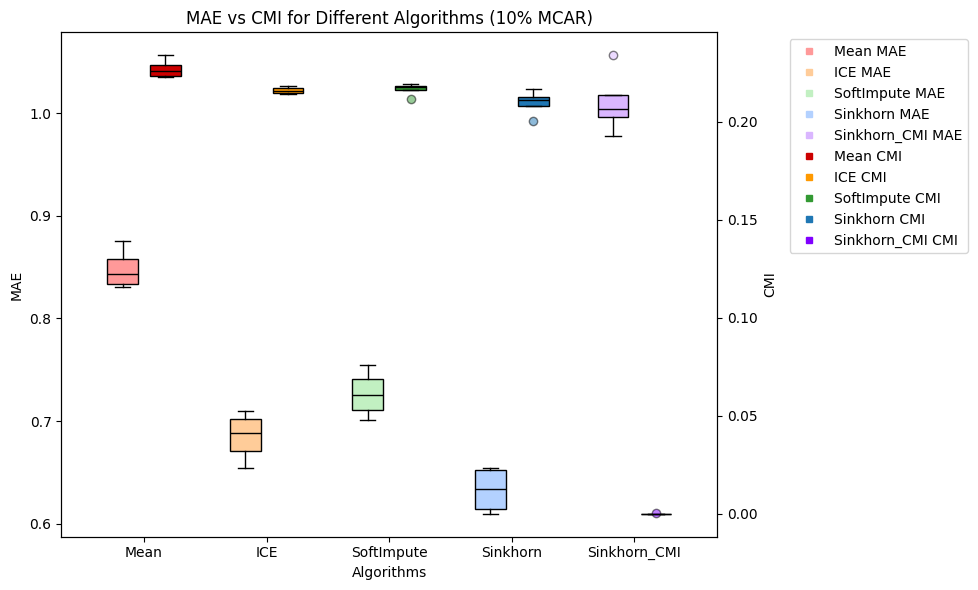

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define your algorithms
algorithms = ['Mean', 'ICE', 'SoftImpute', 'Sinkhorn', 'Sinkhorn_CMI']

# Replace with actual data
cmi_data_mnar10 = {
    'Mean': mnar_mean_cmi10,
    'ICE': mnar_ice_cmi10,
    'SoftImpute': mnar_soft_cmi10,
    'Sinkhorn': mnar_sk_cmi10,
    'Sinkhorn_CMI': mnar_skCmi_cmi10
}
mae_data_mnar10 = {
    'Mean': mnar_mean_mae10,
    'ICE': mnar_ice_mae10,
    'SoftImpute': mnar_soft_mae10,
    'Sinkhorn': mnar_sk_mae10,
    'Sinkhorn_CMI': mnar_skCmi_mae10
}

# Colors (light for MAE, dark for CMI)
color_pairs = [
    ('#ff9999', '#cc0000'),  # Mean
    ('#ffcc99', '#ff9900'),  # ICE
    ('#c2f0c2', '#339933'),  # SoftImpute
    ('#b3d1ff', '#1f77b4'),  # Sinkhorn
    ('#dab6ff', '#8000ff')   # Sinkhorn_CMI
]

x = np.arange(len(algorithms))
width = 0.35

fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

# Plot each algorithm's box individually
for i, algo in enumerate(algorithms):
    mae_vals = mae_data_mnar10[algo]
    cmi_vals = cmi_data_mnar10[algo]

    # MAE box (lighter color)
    ax1.boxplot(mae_vals, positions=[x[i] - width/2], widths=0.25, patch_artist=True,
                boxprops=dict(facecolor=color_pairs[i][0], color='black'),
                medianprops=dict(color='black'),
                capprops=dict(color='black'),
                whiskerprops=dict(color='black'),
                flierprops=dict(markerfacecolor=color_pairs[i][0], marker='o', alpha=0.5))

    # CMI box (darker color)
    ax2.boxplot(cmi_vals, positions=[x[i] + width/2], widths=0.25, patch_artist=True,
                boxprops=dict(facecolor=color_pairs[i][1], color='black'),
                medianprops=dict(color='black'),
                capprops=dict(color='black'),
                whiskerprops=dict(color='black'),
                flierprops=dict(markerfacecolor=color_pairs[i][1], marker='o', alpha=0.5))

# Axes settings
ax1.set_xlabel('Algorithms')
ax1.set_ylabel('MAE', color='black')
ax2.set_ylabel('CMI', color='black')
ax1.set_xticks(x)
ax1.set_xticklabels(algorithms)
ax1.set_title('MAE vs CMI for Different Algorithms (10% MNAR)')

ax1.tick_params(axis='y', labelcolor='black')
ax2.tick_params(axis='y', labelcolor='black')

# Custom legend
handles = [
    plt.Line2D([], [], color=pair[0], marker='s', linestyle='None', markersize=5, label=f'{algo} MAE')
    for algo, pair in zip(algorithms, color_pairs)
] + [
    plt.Line2D([], [], color=pair[1], marker='s', linestyle='None', markersize=5, label=f'{algo} CMI')
    for algo, pair in zip(algorithms, color_pairs)
]
ax1.legend(handles=handles, bbox_to_anchor=(1.10, 1), loc='upper left')

plt.tight_layout()
plt.show()


### 15% MNAR

In [ ]:
cycle = 4
dependencies = dependencies_mnar
missing_type = "MNAR"
missing_rate = 15
highest_lamda_cmi = 15
niter = 5000
mnar_sk_mae15, mnar_sk_cmi15, mnar_skCmi_mae15, mnar_skCmi_cmi15, mnar_mean_mae15, mnar_mean_cmi15, mnar_ice_mae15, mnar_ice_cmi15, mnar_soft_mae15, mnar_soft_cmi15 = run(groundTruth_tensor, X, Y, cycle, missing_type, missing_rate, dependencies, highest_lamda_cmi, niter,bucket_specs, X_cols, Y_cols, Z_cols)

INFO:root:batchsize = 128, epsilon = 0.4912
INFO:root:Iteration 0:	 Loss: 2.3263	 Validation MAE: 0.8430	RMSE: 1.0001
INFO:root:Iteration 50:	 Loss: 2.2554	 Validation MAE: 0.7537	RMSE: 0.9683
INFO:root:Iteration 100:	 Loss: 2.1644	 Validation MAE: 0.7223	RMSE: 0.9587
INFO:root:Iteration 150:	 Loss: 2.1129	 Validation MAE: 0.7047	RMSE: 0.9549
INFO:root:Iteration 200:	 Loss: 2.2498	 Validation MAE: 0.6947	RMSE: 0.9549
INFO:root:Iteration 250:	 Loss: 2.3506	 Validation MAE: 0.6846	RMSE: 0.9502
INFO:root:Iteration 300:	 Loss: 2.3762	 Validation MAE: 0.6805	RMSE: 0.9491
INFO:root:Iteration 350:	 Loss: 2.2683	 Validation MAE: 0.6780	RMSE: 0.9505
INFO:root:Iteration 400:	 Loss: 2.1121	 Validation MAE: 0.6742	RMSE: 0.9512
INFO:root:Iteration 450:	 Loss: 2.0293	 Validation MAE: 0.6711	RMSE: 0.9531
INFO:root:Iteration 500:	 Loss: 1.9154	 Validation MAE: 0.6678	RMSE: 0.9527
INFO:root:Iteration 550:	 Loss: 2.2961	 Validation MAE: 0.6696	RMSE: 0.9558
INFO:root:Iteration 600:	 Loss: 2.2112	 Validat

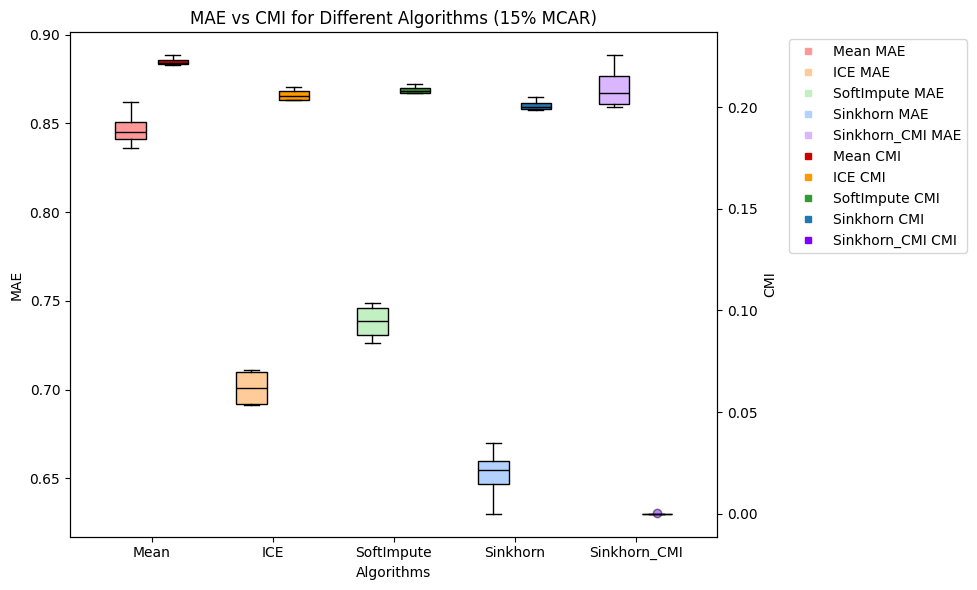

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define your algorithms
algorithms = ['Mean', 'ICE', 'SoftImpute', 'Sinkhorn', 'Sinkhorn_CMI']

# Replace with actual data
cmi_data_mnar15 = {
    'Mean': mnar_mean_cmi15,
    'ICE': mnar_ice_cmi15,
    'SoftImpute': mnar_soft_cmi15,
    'Sinkhorn': mnar_sk_cmi15,
    'Sinkhorn_CMI': mnar_skCmi_cmi15
}
mae_data_mnar15 = {
    'Mean': mnar_mean_mae15,
    'ICE': mnar_ice_mae15,
    'SoftImpute': mnar_soft_mae15,
    'Sinkhorn': mnar_sk_mae15,
    'Sinkhorn_CMI': mnar_skCmi_mae15
}

# Colors (light for MAE, dark for CMI)
color_pairs = [
    ('#ff9999', '#cc0000'),  # Mean
    ('#ffcc99', '#ff9900'),  # ICE
    ('#c2f0c2', '#339933'),  # SoftImpute
    ('#b3d1ff', '#1f77b4'),  # Sinkhorn
    ('#dab6ff', '#8000ff')   # Sinkhorn_CMI
]

x = np.arange(len(algorithms))
width = 0.35

fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

# Plot each algorithm's box individually
for i, algo in enumerate(algorithms):
    mae_vals = mae_data_mnar15[algo]
    cmi_vals = cmi_data_mnar15[algo]

    # MAE box (lighter color)
    ax1.boxplot(mae_vals, positions=[x[i] - width/2], widths=0.25, patch_artist=True,
                boxprops=dict(facecolor=color_pairs[i][0], color='black'),
                medianprops=dict(color='black'),
                capprops=dict(color='black'),
                whiskerprops=dict(color='black'),
                flierprops=dict(markerfacecolor=color_pairs[i][0], marker='o', alpha=0.5))

    # CMI box (darker color)
    ax2.boxplot(cmi_vals, positions=[x[i] + width/2], widths=0.25, patch_artist=True,
                boxprops=dict(facecolor=color_pairs[i][1], color='black'),
                medianprops=dict(color='black'),
                capprops=dict(color='black'),
                whiskerprops=dict(color='black'),
                flierprops=dict(markerfacecolor=color_pairs[i][1], marker='o', alpha=0.5))

# Axes settings
ax1.set_xlabel('Algorithms')
ax1.set_ylabel('MAE', color='black')
ax2.set_ylabel('CMI', color='black')
ax1.set_xticks(x)
ax1.set_xticklabels(algorithms)
ax1.set_title('MAE vs CMI for Different Algorithms (15% MNAR)')

ax1.tick_params(axis='y', labelcolor='black')
ax2.tick_params(axis='y', labelcolor='black')

# Custom legend
handles = [
    plt.Line2D([], [], color=pair[0], marker='s', linestyle='None', markersize=5, label=f'{algo} MAE')
    for algo, pair in zip(algorithms, color_pairs)
] + [
    plt.Line2D([], [], color=pair[1], marker='s', linestyle='None', markersize=5, label=f'{algo} CMI')
    for algo, pair in zip(algorithms, color_pairs)
]
ax1.legend(handles=handles, bbox_to_anchor=(1.10, 1), loc='upper left')

plt.tight_layout()
plt.show()


### 20% MNAR

In [ ]:
cycle = 4
dependencies = dependencies_mnar
missing_type = "MNAR"
missing_rate = 20
highest_lamda_cmi = 15
niter = 5000
mnar_sk_mae20, mnar_sk_cmi20, mnar_skCmi_mae20, mnar_skCmi_cmi20, mnar_mean_mae20, mnar_mean_cmi20, mnar_ice_mae20, mnar_ice_cmi20, mnar_soft_mae20, mnar_soft_cmi20 = run(groundTruth_tensor, X, Y, cycle, missing_type, missing_rate, dependencies, highest_lamda_cmi, niter,bucket_specs, X_cols, Y_cols, Z_cols)

INFO:root:batchsize = 128, epsilon = 0.4633
INFO:root:Iteration 0:	 Loss: 2.6567	 Validation MAE: 0.8531	RMSE: 1.0042
INFO:root:Iteration 50:	 Loss: 2.0398	 Validation MAE: 0.7599	RMSE: 0.9735
INFO:root:Iteration 100:	 Loss: 2.0552	 Validation MAE: 0.7289	RMSE: 0.9665
INFO:root:Iteration 150:	 Loss: 1.9240	 Validation MAE: 0.7126	RMSE: 0.9637
INFO:root:Iteration 200:	 Loss: 2.1285	 Validation MAE: 0.6986	RMSE: 0.9621
INFO:root:Iteration 250:	 Loss: 2.0264	 Validation MAE: 0.6875	RMSE: 0.9557
INFO:root:Iteration 300:	 Loss: 1.9867	 Validation MAE: 0.6799	RMSE: 0.9551
INFO:root:Iteration 350:	 Loss: 2.2002	 Validation MAE: 0.6740	RMSE: 0.9539
INFO:root:Iteration 400:	 Loss: 1.9239	 Validation MAE: 0.6739	RMSE: 0.9562
INFO:root:Iteration 450:	 Loss: 1.9685	 Validation MAE: 0.6706	RMSE: 0.9567
INFO:root:Iteration 500:	 Loss: 2.0511	 Validation MAE: 0.6688	RMSE: 0.9559
INFO:root:Iteration 550:	 Loss: 2.2345	 Validation MAE: 0.6661	RMSE: 0.9552
INFO:root:Iteration 600:	 Loss: 2.0395	 Validat

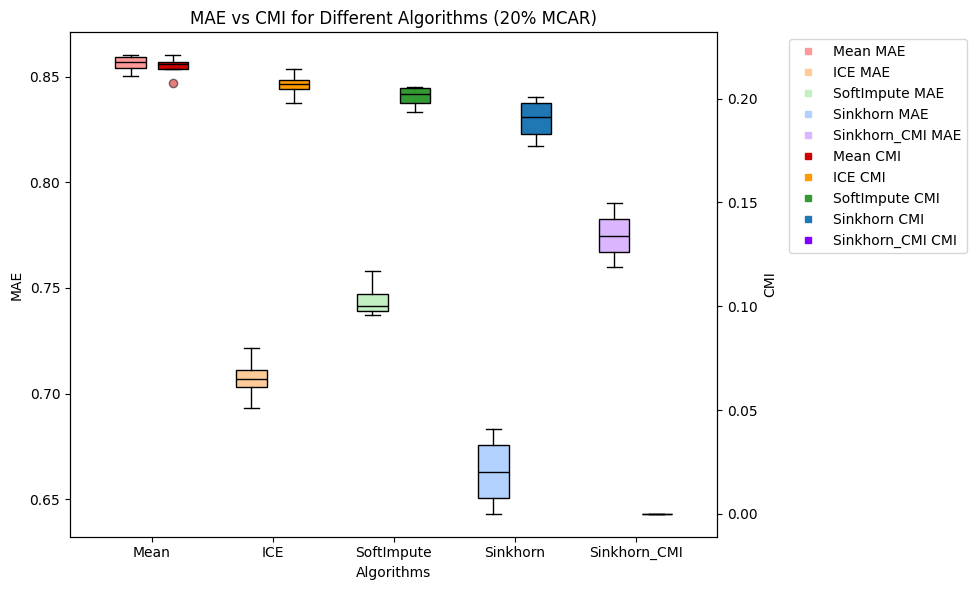

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define your algorithms
algorithms = ['Mean', 'ICE', 'SoftImpute', 'Sinkhorn', 'Sinkhorn_CMI']

# Replace with actual data
cmi_data_mnar20 = {
    'Mean': mnar_mean_cmi20,
    'ICE': mnar_ice_cmi20,
    'SoftImpute': mnar_soft_cmi20,
    'Sinkhorn': mnar_sk_cmi20,
    'Sinkhorn_CMI': mnar_skCmi_cmi20
}
mae_data_mnar20 = {
    'Mean': mnar_mean_mae20,
    'ICE': mnar_ice_mae20,
    'SoftImpute': mnar_soft_mae20,
    'Sinkhorn': mnar_sk_mae20,
    'Sinkhorn_CMI': mnar_skCmi_mae20
}

# Colors (light for MAE, dark for CMI)
color_pairs = [
    ('#ff9999', '#cc0000'),  # Mean
    ('#ffcc99', '#ff9900'),  # ICE
    ('#c2f0c2', '#339933'),  # SoftImpute
    ('#b3d1ff', '#1f77b4'),  # Sinkhorn
    ('#dab6ff', '#8000ff')   # Sinkhorn_CMI
]

x = np.arange(len(algorithms))
width = 0.35

fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

# Plot each algorithm's box individually
for i, algo in enumerate(algorithms):
    mae_vals = mae_data_mnar20[algo]
    cmi_vals = cmi_data_mnar20[algo]

    # MAE box (lighter color)
    ax1.boxplot(mae_vals, positions=[x[i] - width/2], widths=0.25, patch_artist=True,
                boxprops=dict(facecolor=color_pairs[i][0], color='black'),
                medianprops=dict(color='black'),
                capprops=dict(color='black'),
                whiskerprops=dict(color='black'),
                flierprops=dict(markerfacecolor=color_pairs[i][0], marker='o', alpha=0.5))

    # CMI box (darker color)
    ax2.boxplot(cmi_vals, positions=[x[i] + width/2], widths=0.25, patch_artist=True,
                boxprops=dict(facecolor=color_pairs[i][1], color='black'),
                medianprops=dict(color='black'),
                capprops=dict(color='black'),
                whiskerprops=dict(color='black'),
                flierprops=dict(markerfacecolor=color_pairs[i][1], marker='o', alpha=0.5))

# Axes settings
ax1.set_xlabel('Algorithms')
ax1.set_ylabel('MAE', color='black')
ax2.set_ylabel('CMI', color='black')
ax1.set_xticks(x)
ax1.set_xticklabels(algorithms)
ax1.set_title('MAE vs CMI for Different Algorithms (20% MNAR)')

ax1.tick_params(axis='y', labelcolor='black')
ax2.tick_params(axis='y', labelcolor='black')

# Custom legend
handles = [
    plt.Line2D([], [], color=pair[0], marker='s', linestyle='None', markersize=5, label=f'{algo} MAE')
    for algo, pair in zip(algorithms, color_pairs)
] + [
    plt.Line2D([], [], color=pair[1], marker='s', linestyle='None', markersize=5, label=f'{algo} CMI')
    for algo, pair in zip(algorithms, color_pairs)
]
ax1.legend(handles=handles, bbox_to_anchor=(1.10, 1), loc='upper left')

plt.tight_layout()
plt.show()


### 25% MNAR

In [ ]:
cycle = 4
dependencies = dependencies_mnar
missing_type = "MNAR"
missing_rate = 25
highest_lamda_cmi = 15
niter = 5000
mnar_sk_mae25, mnar_sk_cmi25, mnar_skCmi_mae25, mnar_skCmi_cmi25, mnar_mean_mae25, mnar_mean_cmi25, mnar_ice_mae25, mnar_ice_cmi25, mnar_soft_mae25, mnar_soft_cmi25 = run(groundTruth_tensor, X, Y, cycle, missing_type, missing_rate, dependencies, highest_lamda_cmi, niter,bucket_specs, X_cols, Y_cols, Z_cols)

INFO:root:batchsize = 128, epsilon = 0.4401
INFO:root:Iteration 0:	 Loss: 2.1551	 Validation MAE: 0.8512	RMSE: 1.0108
INFO:root:Iteration 50:	 Loss: 2.3569	 Validation MAE: 0.7668	RMSE: 0.9836
INFO:root:Iteration 100:	 Loss: 1.8705	 Validation MAE: 0.7347	RMSE: 0.9738
INFO:root:Iteration 150:	 Loss: 2.0333	 Validation MAE: 0.7132	RMSE: 0.9683
INFO:root:Iteration 200:	 Loss: 2.0180	 Validation MAE: 0.6978	RMSE: 0.9650
INFO:root:Iteration 250:	 Loss: 2.0146	 Validation MAE: 0.6875	RMSE: 0.9634
INFO:root:Iteration 300:	 Loss: 1.8338	 Validation MAE: 0.6820	RMSE: 0.9630
INFO:root:Iteration 350:	 Loss: 1.9957	 Validation MAE: 0.6746	RMSE: 0.9600
INFO:root:Iteration 400:	 Loss: 2.0228	 Validation MAE: 0.6703	RMSE: 0.9587
INFO:root:Iteration 450:	 Loss: 2.0789	 Validation MAE: 0.6678	RMSE: 0.9585
INFO:root:Iteration 500:	 Loss: 1.6837	 Validation MAE: 0.6632	RMSE: 0.9560
INFO:root:Iteration 550:	 Loss: 2.1854	 Validation MAE: 0.6614	RMSE: 0.9567
INFO:root:Iteration 600:	 Loss: 1.5866	 Validat

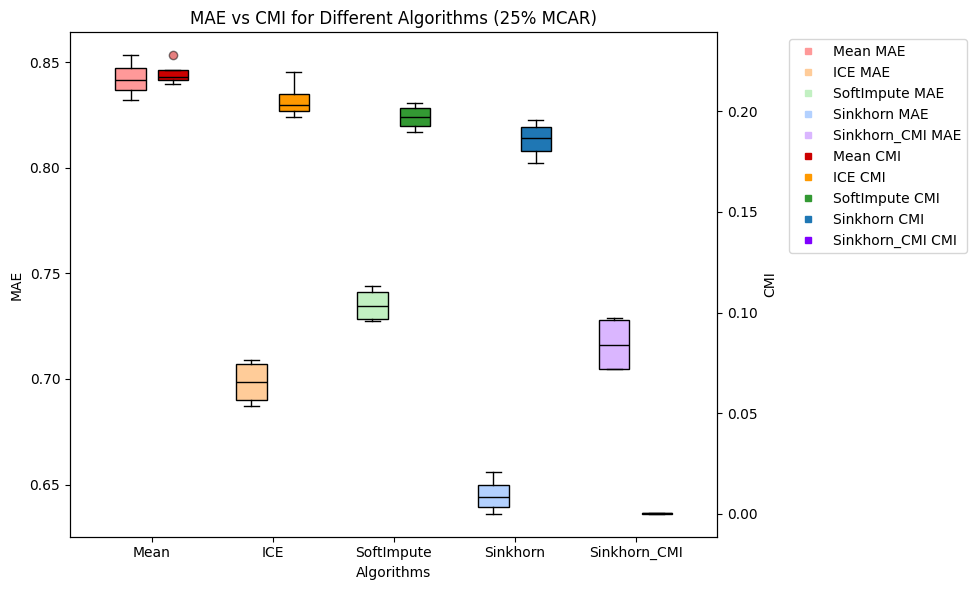

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define your algorithms
algorithms = ['Mean', 'ICE', 'SoftImpute', 'Sinkhorn', 'Sinkhorn_CMI']

# Replace with actual data
cmi_data_mnar25 = {
    'Mean': mnar_mean_cmi25,
    'ICE': mnar_ice_cmi25,
    'SoftImpute': mnar_soft_cmi25,
    'Sinkhorn': mnar_sk_cmi25,
    'Sinkhorn_CMI': mnar_skCmi_cmi25
}
mae_data_mnar25 = {
    'Mean': mnar_mean_mae25,
    'ICE': mnar_ice_mae25,
    'SoftImpute': mnar_soft_mae25,
    'Sinkhorn': mnar_sk_mae25,
    'Sinkhorn_CMI': mnar_skCmi_mae25
}

# Colors (light for MAE, dark for CMI)
color_pairs = [
    ('#ff9999', '#cc0000'),  # Mean
    ('#ffcc99', '#ff9900'),  # ICE
    ('#c2f0c2', '#339933'),  # SoftImpute
    ('#b3d1ff', '#1f77b4'),  # Sinkhorn
    ('#dab6ff', '#8000ff')   # Sinkhorn_CMI
]

x = np.arange(len(algorithms))
width = 0.35

fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

# Plot each algorithm's box individually
for i, algo in enumerate(algorithms):
    mae_vals = mae_data_mnar25[algo]
    cmi_vals = cmi_data_mnar25[algo]

    # MAE box (lighter color)
    ax1.boxplot(mae_vals, positions=[x[i] - width/2], widths=0.25, patch_artist=True,
                boxprops=dict(facecolor=color_pairs[i][0], color='black'),
                medianprops=dict(color='black'),
                capprops=dict(color='black'),
                whiskerprops=dict(color='black'),
                flierprops=dict(markerfacecolor=color_pairs[i][0], marker='o', alpha=0.5))

    # CMI box (darker color)
    ax2.boxplot(cmi_vals, positions=[x[i] + width/2], widths=0.25, patch_artist=True,
                boxprops=dict(facecolor=color_pairs[i][1], color='black'),
                medianprops=dict(color='black'),
                capprops=dict(color='black'),
                whiskerprops=dict(color='black'),
                flierprops=dict(markerfacecolor=color_pairs[i][1], marker='o', alpha=0.5))

# Axes settings
ax1.set_xlabel('Algorithms')
ax1.set_ylabel('MAE', color='black')
ax2.set_ylabel('CMI', color='black')
ax1.set_xticks(x)
ax1.set_xticklabels(algorithms)
ax1.set_title('MAE vs CMI for Different Algorithms (25% MNAR)')

ax1.tick_params(axis='y', labelcolor='black')
ax2.tick_params(axis='y', labelcolor='black')

# Custom legend
handles = [
    plt.Line2D([], [], color=pair[0], marker='s', linestyle='None', markersize=5, label=f'{algo} MAE')
    for algo, pair in zip(algorithms, color_pairs)
] + [
    plt.Line2D([], [], color=pair[1], marker='s', linestyle='None', markersize=5, label=f'{algo} CMI')
    for algo, pair in zip(algorithms, color_pairs)
]
ax1.legend(handles=handles, bbox_to_anchor=(1.10, 1), loc='upper left')

plt.tight_layout()
plt.show()


### 30% MNAR

In [ ]:
cycle = 4
dependencies = dependencies_mnar
missing_type = "MNAR"
missing_rate = 30
highest_lamda_cmi = 15
niter = 5000
mnar_sk_mae30, mnar_sk_cmi30, mnar_skCmi_mae30, mnar_skCmi_cmi30, mnar_mean_mae30, mnar_mean_cmi30, mnar_ice_mae30, mnar_ice_cmi30, mnar_soft_mae30, mnar_soft_cmi30 = run(groundTruth_tensor, X, Y, cycle, missing_type, missing_rate, dependencies, highest_lamda_cmi, niter,bucket_specs, X_cols, Y_cols, Z_cols)

INFO:root:batchsize = 128, epsilon = 0.4101
INFO:root:Iteration 0:	 Loss: 2.1431	 Validation MAE: 0.8581	RMSE: 1.0108
INFO:root:Iteration 50:	 Loss: 2.2576	 Validation MAE: 0.7654	RMSE: 0.9772
INFO:root:Iteration 100:	 Loss: 1.9420	 Validation MAE: 0.7318	RMSE: 0.9677
INFO:root:Iteration 150:	 Loss: 1.7966	 Validation MAE: 0.7117	RMSE: 0.9635
INFO:root:Iteration 200:	 Loss: 2.3071	 Validation MAE: 0.6977	RMSE: 0.9607
INFO:root:Iteration 250:	 Loss: 1.8645	 Validation MAE: 0.6890	RMSE: 0.9610
INFO:root:Iteration 300:	 Loss: 2.0195	 Validation MAE: 0.6845	RMSE: 0.9618
INFO:root:Iteration 350:	 Loss: 1.7765	 Validation MAE: 0.6803	RMSE: 0.9611
INFO:root:Iteration 400:	 Loss: 1.9048	 Validation MAE: 0.6751	RMSE: 0.9601
INFO:root:Iteration 450:	 Loss: 2.1189	 Validation MAE: 0.6713	RMSE: 0.9604
INFO:root:Iteration 500:	 Loss: 2.0664	 Validation MAE: 0.6687	RMSE: 0.9599
INFO:root:Iteration 550:	 Loss: 1.9812	 Validation MAE: 0.6662	RMSE: 0.9599
INFO:root:Iteration 600:	 Loss: 2.0450	 Validat

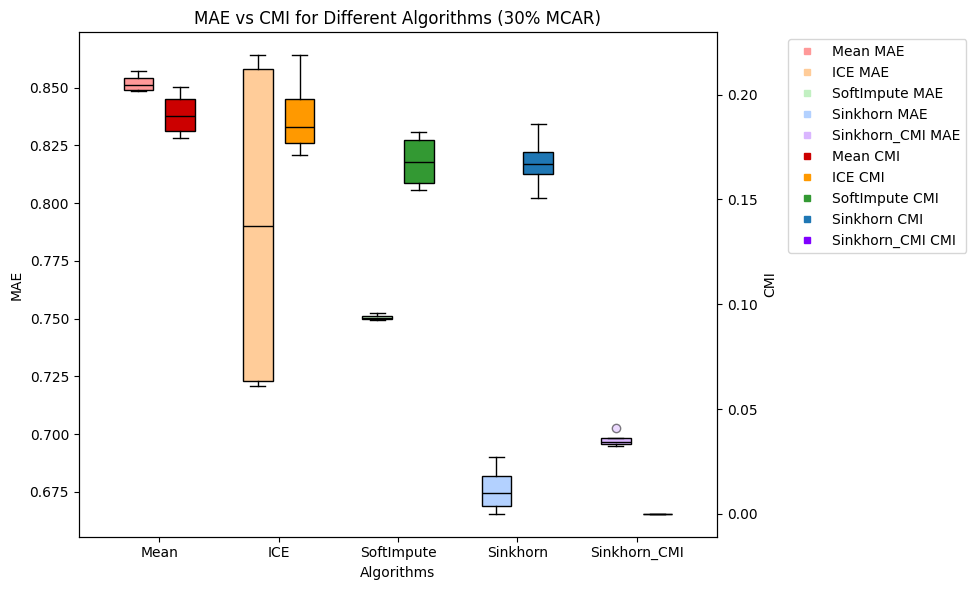

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define your algorithms
algorithms = ['Mean', 'ICE', 'SoftImpute', 'Sinkhorn', 'Sinkhorn_CMI']

# Replace with actual data
cmi_data_mnar30 = {
    'Mean': mnar_mean_cmi30,
    'ICE': mnar_ice_cmi30,
    'SoftImpute': mnar_soft_cmi30,
    'Sinkhorn': mnar_sk_cmi30,
    'Sinkhorn_CMI': mnar_skCmi_cmi30
}
mae_data_mnar30 = {
    'Mean': mnar_mean_mae30,
    'ICE': mnar_ice_mae30,
    'SoftImpute': mnar_soft_mae30,
    'Sinkhorn': mnar_sk_mae30,
    'Sinkhorn_CMI': mnar_skCmi_mae30
}

# Colors (light for MAE, dark for CMI)
color_pairs = [
    ('#ff9999', '#cc0000'),  # Mean
    ('#ffcc99', '#ff9900'),  # ICE
    ('#c2f0c2', '#339933'),  # SoftImpute
    ('#b3d1ff', '#1f77b4'),  # Sinkhorn
    ('#dab6ff', '#8000ff')   # Sinkhorn_CMI
]

x = np.arange(len(algorithms))
width = 0.35

fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

# Plot each algorithm's box individually
for i, algo in enumerate(algorithms):
    mae_vals = mae_data_mnar30[algo]
    cmi_vals = cmi_data_mnar30[algo]

    # MAE box (lighter color)
    ax1.boxplot(mae_vals, positions=[x[i] - width/2], widths=0.25, patch_artist=True,
                boxprops=dict(facecolor=color_pairs[i][0], color='black'),
                medianprops=dict(color='black'),
                capprops=dict(color='black'),
                whiskerprops=dict(color='black'),
                flierprops=dict(markerfacecolor=color_pairs[i][0], marker='o', alpha=0.5))

    # CMI box (darker color)
    ax2.boxplot(cmi_vals, positions=[x[i] + width/2], widths=0.25, patch_artist=True,
                boxprops=dict(facecolor=color_pairs[i][1], color='black'),
                medianprops=dict(color='black'),
                capprops=dict(color='black'),
                whiskerprops=dict(color='black'),
                flierprops=dict(markerfacecolor=color_pairs[i][1], marker='o', alpha=0.5))

# Axes settings
ax1.set_xlabel('Algorithms')
ax1.set_ylabel('MAE', color='black')
ax2.set_ylabel('CMI', color='black')
ax1.set_xticks(x)
ax1.set_xticklabels(algorithms)
ax1.set_title('MAE vs CMI for Different Algorithms (30% MNAR)')

ax1.tick_params(axis='y', labelcolor='black')
ax2.tick_params(axis='y', labelcolor='black')

# Custom legend
handles = [
    plt.Line2D([], [], color=pair[0], marker='s', linestyle='None', markersize=5, label=f'{algo} MAE')
    for algo, pair in zip(algorithms, color_pairs)
] + [
    plt.Line2D([], [], color=pair[1], marker='s', linestyle='None', markersize=5, label=f'{algo} CMI')
    for algo, pair in zip(algorithms, color_pairs)
]
ax1.legend(handles=handles, bbox_to_anchor=(1.10, 1), loc='upper left')

plt.tight_layout()
plt.show()


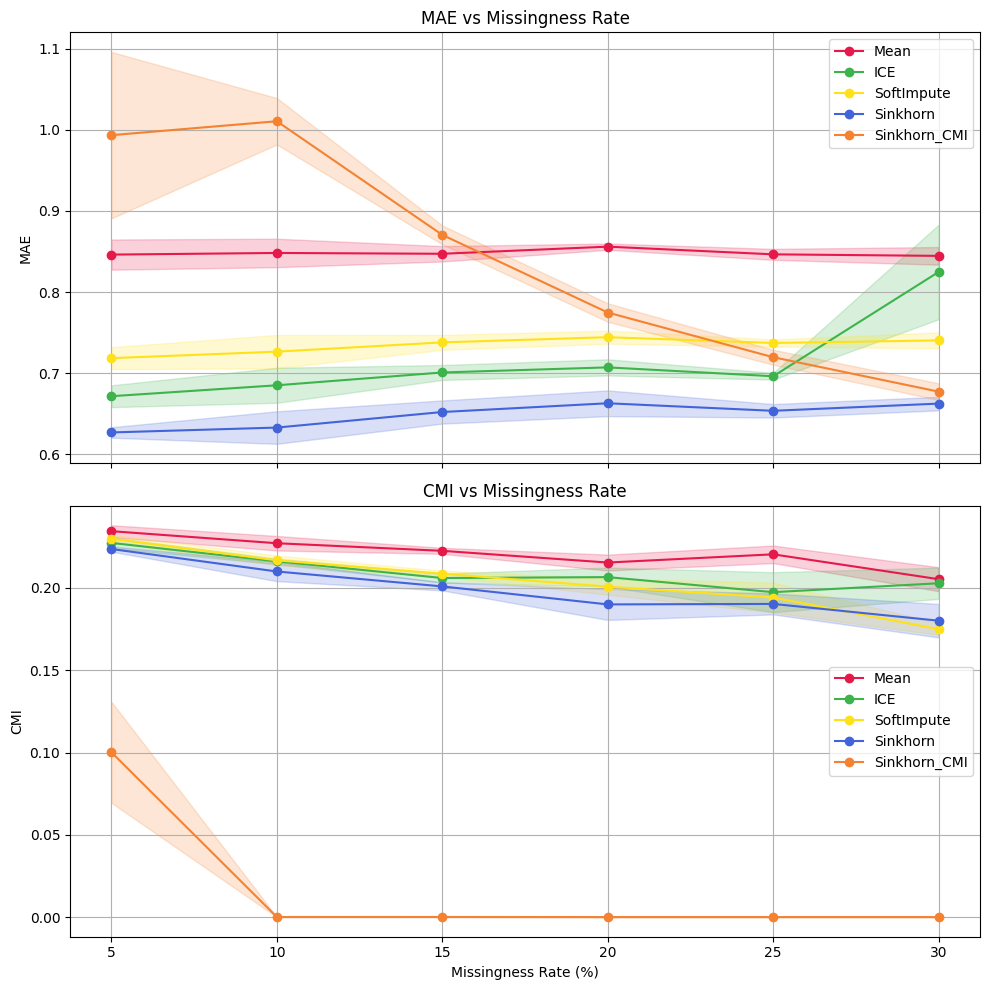

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

missing_rates = [5, 10, 15, 20, 25, 30]
algorithms = ['Mean', 'ICE', 'SoftImpute', 'Sinkhorn', 'Sinkhorn_CMI']
colors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231']

# Replace the below placeholders with actual numpy arrays (shape: [6, 4] if 4 runs per rate)
mae_results = {
    'Mean': [mnar_mean_mae5, mnar_mean_mae10, mnar_mean_mae15, mnar_mean_mae20, mnar_mean_mae25, mnar_mean_mae30],
    'ICE': [mnar_ice_mae5, mnar_ice_mae10, mnar_ice_mae15, mnar_ice_mae20, mnar_ice_mae25, mnar_ice_mae30],
    'SoftImpute': [mnar_soft_mae5, mnar_soft_mae10, mnar_soft_mae15, mnar_soft_mae20, mnar_soft_mae25, mnar_soft_mae30],
    'Sinkhorn': [mnar_sk_mae5, mnar_sk_mae10, mnar_sk_mae15, mnar_sk_mae20, mnar_sk_mae25, mnar_sk_mae30],
    'Sinkhorn_CMI': [mnar_skCmi_mae5, mnar_skCmi_mae10, mnar_skCmi_mae15, mnar_skCmi_mae20, mnar_skCmi_mae25, mnar_skCmi_mae30]
}

cmi_results = {
    'Mean': [mnar_mean_cmi5, mnar_mean_cmi10, mnar_mean_cmi15, mnar_mean_cmi20, mnar_mean_cmi25, mnar_mean_cmi30],
    'ICE': [mnar_ice_cmi5, mnar_ice_cmi10, mnar_ice_cmi15, mnar_ice_cmi20, mnar_ice_cmi25, mnar_ice_cmi30],
    'SoftImpute': [mnar_soft_cmi5, mnar_soft_cmi10, mnar_soft_cmi15, mnar_soft_cmi20, mnar_soft_cmi25, mnar_soft_cmi30],
    'Sinkhorn': [mnar_sk_cmi5, mnar_sk_cmi10, mnar_sk_cmi15, mnar_sk_cmi20, mnar_sk_cmi25, mnar_sk_cmi30],
    'Sinkhorn_CMI': [mnar_skCmi_cmi5, mnar_skCmi_cmi10, mnar_skCmi_cmi15, mnar_skCmi_cmi20, mnar_skCmi_cmi25, mnar_skCmi_cmi30]
}

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10), sharex=True)

# --- MAE plot ---
for i, algo in enumerate(algorithms):
    data = np.array(mae_results[algo])
    means = np.mean(data, axis=1)
    stds = np.std(data, axis=1)
    ax1.plot(missing_rates, means, label=algo, color=colors[i], marker='o')
    ax1.fill_between(missing_rates, means - stds, means + stds, alpha=0.2, color=colors[i])

ax1.set_ylabel('MAE')
ax1.set_title('MAE vs Missingness Rate')
ax1.grid(True)
ax1.legend()

# --- CMI plot ---
for i, algo in enumerate(algorithms):
    data = np.array(cmi_results[algo])
    means = np.mean(data, axis=1)
    stds = np.std(data, axis=1)
    ax2.plot(missing_rates, means, label=algo, color=colors[i], marker='o')
    ax2.fill_between(missing_rates, means - stds, means + stds, alpha=0.2, color=colors[i])

ax2.set_xlabel('Missingness Rate (%)')
ax2.set_ylabel('CMI')
ax2.set_title('CMI vs Missingness Rate')
ax2.grid(True)
ax2.legend()

plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define your algorithms
algorithms = ['Mean', 'ICE', 'SoftImpute', 'Sinkhorn', 'Sinkhorn_CMI']

# Replace with actual data
cmi_data_mcar5 = {
    'Mean': mcar_mean_cmi5,
    'ICE': mcar_ice_cmi5,
    'SoftImpute': mcar_soft_cmi5,
    'Sinkhorn': mcar_sk_cmi5,
    'Sinkhorn_CMI': mcar_skCmi_cmi5
}
mae_data_mcar5 = {
    'Mean': mcar_mean_mae5,
    'ICE': mcar_ice_mae5,
    'SoftImpute': mcar_soft_mae5,
    'Sinkhorn': mcar_sk_mae5,
    'Sinkhorn_CMI': mcar_skCmi_mae5
}

# Colors (light for MAE, dark for CMI)
color_pairs = [
    ('#ff9999', '#cc0000'),  # Mean
    ('#ffcc99', '#ff9900'),  # ICE
    ('#c2f0c2', '#339933'),  # SoftImpute
    ('#b3d1ff', '#1f77b4'),  # Sinkhorn
    ('#dab6ff', '#8000ff')   # Sinkhorn_CMI
]

x = np.arange(len(algorithms))
width = 0.35

fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

# Plot each algorithm's box individually
for i, algo in enumerate(algorithms):
    mae_vals = mae_data_mcar5[algo]
    cmi_vals = cmi_data_mcar5[algo]

    # MAE box (lighter color)
    ax1.boxplot(mae_vals, positions=[x[i] - width/2], widths=0.25, patch_artist=True,
                boxprops=dict(facecolor=color_pairs[i][0], color='black'),
                medianprops=dict(color='black'),
                capprops=dict(color='black'),
                whiskerprops=dict(color='black'),
                flierprops=dict(markerfacecolor=color_pairs[i][0], marker='o', alpha=0.5))

    # CMI box (darker color)
    ax2.boxplot(cmi_vals, positions=[x[i] + width/2], widths=0.25, patch_artist=True,
                boxprops=dict(facecolor=color_pairs[i][1], color='black'),
                medianprops=dict(color='black'),
                capprops=dict(color='black'),
                whiskerprops=dict(color='black'),
                flierprops=dict(markerfacecolor=color_pairs[i][1], marker='o', alpha=0.5))

# Axes settings
ax1.set_xlabel('Algorithms')
ax1.set_ylabel('MAE', color='black')
ax2.set_ylabel('CMI', color='black')
ax1.set_xticks(x)
ax1.set_xticklabels(algorithms)
ax1.set_title('MAE vs CMI for Different Algorithms (5% MCAR)')

ax1.tick_params(axis='y', labelcolor='black')
ax2.tick_params(axis='y', labelcolor='black')

# Custom legend
handles = [
    plt.Line2D([], [], color=pair[0], marker='s', linestyle='None', markersize=5, label=f'{algo} MAE')
    for algo, pair in zip(algorithms, color_pairs)
] + [
    plt.Line2D([], [], color=pair[1], marker='s', linestyle='None', markersize=5, label=f'{algo} CMI')
    for algo, pair in zip(algorithms, color_pairs)
]
ax1.legend(handles=handles, bbox_to_anchor=(1.10, 1), loc='upper left')

plt.tight_layout()
plt.show()


KeyboardInterrupt: 

### 10% MCAR

In [ ]:
cycle = 4
dependencies = None
missing_type = "MCAR"
missing_rate = 10
highest_lamda_cmi = 15
niter = 5000
mcar_sk_mae10, mcar_sk_cmi10, mcar_skCmi_mae10, mcar_skCmi_cmi10, mcar_mean_mae10, mcar_mean_cmi10, mcar_ice_mae10, mcar_ice_cmi10, mcar_soft_mae10, mcar_soft_cmi10 = run(groundTruth_tensor, X, Y, cycle, missing_type, missing_rate, dependencies, highest_lamda_cmi, niter,bucket_specs, X_cols, Y_cols, Z_cols)

INFO:root:batchsize = 128, epsilon = 0.5221
INFO:root:Iteration 0:	 Loss: 2.5271	 Validation MAE: 0.8781	RMSE: 1.0560
INFO:root:Iteration 50:	 Loss: 2.2761	 Validation MAE: 0.7727	RMSE: 1.0074
INFO:root:Iteration 100:	 Loss: 2.4283	 Validation MAE: 0.7362	RMSE: 0.9919
INFO:root:Iteration 150:	 Loss: 2.2363	 Validation MAE: 0.7174	RMSE: 0.9874
INFO:root:Iteration 200:	 Loss: 2.5400	 Validation MAE: 0.7016	RMSE: 0.9807
INFO:root:Iteration 250:	 Loss: 2.4012	 Validation MAE: 0.6914	RMSE: 0.9786
INFO:root:Iteration 300:	 Loss: 2.2598	 Validation MAE: 0.6838	RMSE: 0.9752
INFO:root:Iteration 350:	 Loss: 2.3362	 Validation MAE: 0.6745	RMSE: 0.9715
INFO:root:Iteration 400:	 Loss: 2.1902	 Validation MAE: 0.6716	RMSE: 0.9710
INFO:root:Iteration 450:	 Loss: 2.2093	 Validation MAE: 0.6664	RMSE: 0.9683
INFO:root:Iteration 500:	 Loss: 2.0970	 Validation MAE: 0.6621	RMSE: 0.9652
INFO:root:Iteration 550:	 Loss: 2.2531	 Validation MAE: 0.6634	RMSE: 0.9681
INFO:root:Iteration 600:	 Loss: 2.1888	 Validat

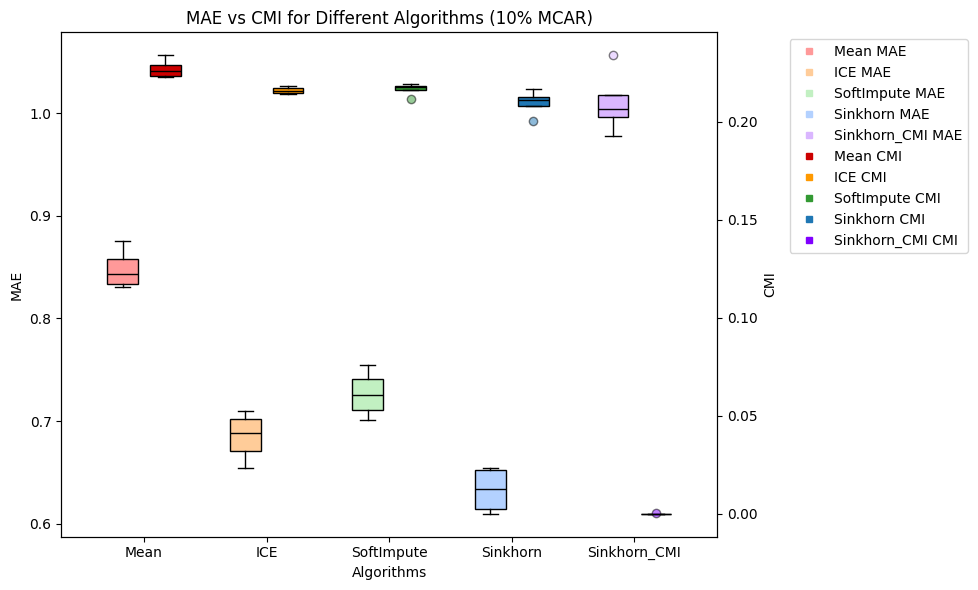

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define your algorithms
algorithms = ['Mean', 'ICE', 'SoftImpute', 'Sinkhorn', 'Sinkhorn_CMI']

# Replace with actual data
cmi_data_mcar10 = {
    'Mean': mcar_mean_cmi10,
    'ICE': mcar_ice_cmi10,
    'SoftImpute': mcar_soft_cmi10,
    'Sinkhorn': mcar_sk_cmi10,
    'Sinkhorn_CMI': mcar_skCmi_cmi10
}
mae_data_mcar10 = {
    'Mean': mcar_mean_mae10,
    'ICE': mcar_ice_mae10,
    'SoftImpute': mcar_soft_mae10,
    'Sinkhorn': mcar_sk_mae10,
    'Sinkhorn_CMI': mcar_skCmi_mae10
}

# Colors (light for MAE, dark for CMI)
color_pairs = [
    ('#ff9999', '#cc0000'),  # Mean
    ('#ffcc99', '#ff9900'),  # ICE
    ('#c2f0c2', '#339933'),  # SoftImpute
    ('#b3d1ff', '#1f77b4'),  # Sinkhorn
    ('#dab6ff', '#8000ff')   # Sinkhorn_CMI
]

x = np.arange(len(algorithms))
width = 0.35

fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

# Plot each algorithm's box individually
for i, algo in enumerate(algorithms):
    mae_vals = mae_data_mcar10[algo]
    cmi_vals = cmi_data_mcar10[algo]

    # MAE box (lighter color)
    ax1.boxplot(mae_vals, positions=[x[i] - width/2], widths=0.25, patch_artist=True,
                boxprops=dict(facecolor=color_pairs[i][0], color='black'),
                medianprops=dict(color='black'),
                capprops=dict(color='black'),
                whiskerprops=dict(color='black'),
                flierprops=dict(markerfacecolor=color_pairs[i][0], marker='o', alpha=0.5))

    # CMI box (darker color)
    ax2.boxplot(cmi_vals, positions=[x[i] + width/2], widths=0.25, patch_artist=True,
                boxprops=dict(facecolor=color_pairs[i][1], color='black'),
                medianprops=dict(color='black'),
                capprops=dict(color='black'),
                whiskerprops=dict(color='black'),
                flierprops=dict(markerfacecolor=color_pairs[i][1], marker='o', alpha=0.5))

# Axes settings
ax1.set_xlabel('Algorithms')
ax1.set_ylabel('MAE', color='black')
ax2.set_ylabel('CMI', color='black')
ax1.set_xticks(x)
ax1.set_xticklabels(algorithms)
ax1.set_title('MAE vs CMI for Different Algorithms (10% MCAR)')

ax1.tick_params(axis='y', labelcolor='black')
ax2.tick_params(axis='y', labelcolor='black')

# Custom legend
handles = [
    plt.Line2D([], [], color=pair[0], marker='s', linestyle='None', markersize=5, label=f'{algo} MAE')
    for algo, pair in zip(algorithms, color_pairs)
] + [
    plt.Line2D([], [], color=pair[1], marker='s', linestyle='None', markersize=5, label=f'{algo} CMI')
    for algo, pair in zip(algorithms, color_pairs)
]
ax1.legend(handles=handles, bbox_to_anchor=(1.10, 1), loc='upper left')

plt.tight_layout()
plt.show()


### 15% MCAR

In [ ]:
cycle = 4
dependencies = None
missing_type = "MCAR"
missing_rate = 15
highest_lamda_cmi = 15
niter = 5000
mcar_sk_mae15, mcar_sk_cmi15, mcar_skCmi_mae15, mcar_skCmi_cmi15, mcar_mean_mae15, mcar_mean_cmi15, mcar_ice_mae15, mcar_ice_cmi15, mcar_soft_mae15, mcar_soft_cmi15 = run(groundTruth_tensor, X, Y, cycle, missing_type, missing_rate, dependencies, highest_lamda_cmi, niter,bucket_specs, X_cols, Y_cols, Z_cols)

INFO:root:batchsize = 128, epsilon = 0.4912
INFO:root:Iteration 0:	 Loss: 2.3263	 Validation MAE: 0.8430	RMSE: 1.0001
INFO:root:Iteration 50:	 Loss: 2.2554	 Validation MAE: 0.7537	RMSE: 0.9683
INFO:root:Iteration 100:	 Loss: 2.1644	 Validation MAE: 0.7223	RMSE: 0.9587
INFO:root:Iteration 150:	 Loss: 2.1129	 Validation MAE: 0.7047	RMSE: 0.9549
INFO:root:Iteration 200:	 Loss: 2.2498	 Validation MAE: 0.6947	RMSE: 0.9549
INFO:root:Iteration 250:	 Loss: 2.3506	 Validation MAE: 0.6846	RMSE: 0.9502
INFO:root:Iteration 300:	 Loss: 2.3762	 Validation MAE: 0.6805	RMSE: 0.9491
INFO:root:Iteration 350:	 Loss: 2.2683	 Validation MAE: 0.6780	RMSE: 0.9505
INFO:root:Iteration 400:	 Loss: 2.1121	 Validation MAE: 0.6742	RMSE: 0.9512
INFO:root:Iteration 450:	 Loss: 2.0293	 Validation MAE: 0.6711	RMSE: 0.9531
INFO:root:Iteration 500:	 Loss: 1.9154	 Validation MAE: 0.6678	RMSE: 0.9527
INFO:root:Iteration 550:	 Loss: 2.2961	 Validation MAE: 0.6696	RMSE: 0.9558
INFO:root:Iteration 600:	 Loss: 2.2112	 Validat

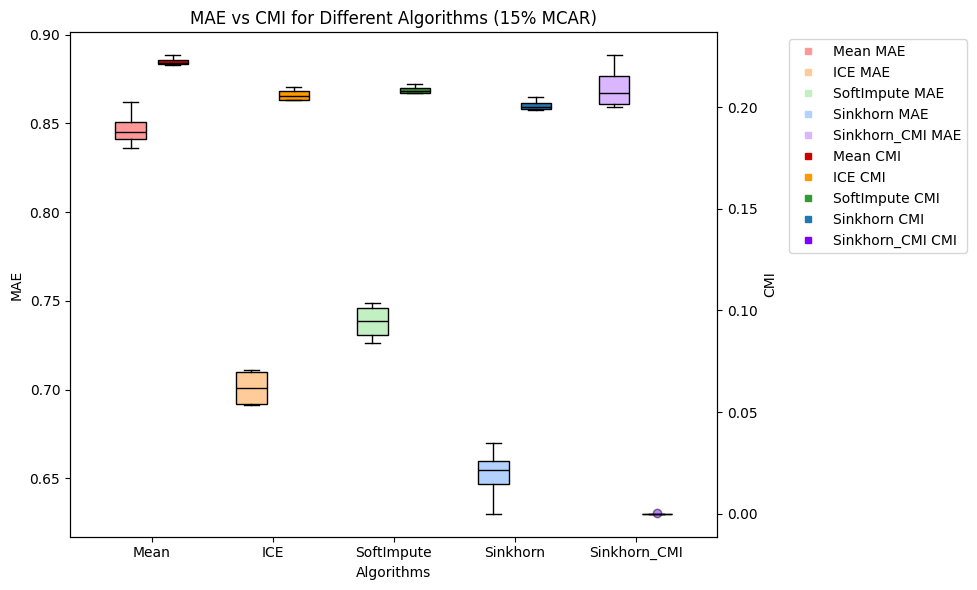

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define your algorithms
algorithms = ['Mean', 'ICE', 'SoftImpute', 'Sinkhorn', 'Sinkhorn_CMI']

# Replace with actual data
cmi_data_mcar15 = {
    'Mean': mcar_mean_cmi15,
    'ICE': mcar_ice_cmi15,
    'SoftImpute': mcar_soft_cmi15,
    'Sinkhorn': mcar_sk_cmi15,
    'Sinkhorn_CMI': mcar_skCmi_cmi15
}
mae_data_mcar15 = {
    'Mean': mcar_mean_mae15,
    'ICE': mcar_ice_mae15,
    'SoftImpute': mcar_soft_mae15,
    'Sinkhorn': mcar_sk_mae15,
    'Sinkhorn_CMI': mcar_skCmi_mae15
}

# Colors (light for MAE, dark for CMI)
color_pairs = [
    ('#ff9999', '#cc0000'),  # Mean
    ('#ffcc99', '#ff9900'),  # ICE
    ('#c2f0c2', '#339933'),  # SoftImpute
    ('#b3d1ff', '#1f77b4'),  # Sinkhorn
    ('#dab6ff', '#8000ff')   # Sinkhorn_CMI
]

x = np.arange(len(algorithms))
width = 0.35

fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

# Plot each algorithm's box individually
for i, algo in enumerate(algorithms):
    mae_vals = mae_data_mcar15[algo]
    cmi_vals = cmi_data_mcar15[algo]

    # MAE box (lighter color)
    ax1.boxplot(mae_vals, positions=[x[i] - width/2], widths=0.25, patch_artist=True,
                boxprops=dict(facecolor=color_pairs[i][0], color='black'),
                medianprops=dict(color='black'),
                capprops=dict(color='black'),
                whiskerprops=dict(color='black'),
                flierprops=dict(markerfacecolor=color_pairs[i][0], marker='o', alpha=0.5))

    # CMI box (darker color)
    ax2.boxplot(cmi_vals, positions=[x[i] + width/2], widths=0.25, patch_artist=True,
                boxprops=dict(facecolor=color_pairs[i][1], color='black'),
                medianprops=dict(color='black'),
                capprops=dict(color='black'),
                whiskerprops=dict(color='black'),
                flierprops=dict(markerfacecolor=color_pairs[i][1], marker='o', alpha=0.5))

# Axes settings
ax1.set_xlabel('Algorithms')
ax1.set_ylabel('MAE', color='black')
ax2.set_ylabel('CMI', color='black')
ax1.set_xticks(x)
ax1.set_xticklabels(algorithms)
ax1.set_title('MAE vs CMI for Different Algorithms (15% MCAR)')

ax1.tick_params(axis='y', labelcolor='black')
ax2.tick_params(axis='y', labelcolor='black')

# Custom legend
handles = [
    plt.Line2D([], [], color=pair[0], marker='s', linestyle='None', markersize=5, label=f'{algo} MAE')
    for algo, pair in zip(algorithms, color_pairs)
] + [
    plt.Line2D([], [], color=pair[1], marker='s', linestyle='None', markersize=5, label=f'{algo} CMI')
    for algo, pair in zip(algorithms, color_pairs)
]
ax1.legend(handles=handles, bbox_to_anchor=(1.10, 1), loc='upper left')

plt.tight_layout()
plt.show()


### 20% MCAR

In [ ]:
cycle = 4
dependencies = None
missing_type = "MCAR"
missing_rate = 20
highest_lamda_cmi = 15
niter = 5000
mcar_sk_mae20, mcar_sk_cmi20, mcar_skCmi_mae20, mcar_skCmi_cmi20, mcar_mean_mae20, mcar_mean_cmi20, mcar_ice_mae20, mcar_ice_cmi20, mcar_soft_mae20, mcar_soft_cmi20 = run(groundTruth_tensor, X, Y, cycle, missing_type, missing_rate, dependencies, highest_lamda_cmi, niter,bucket_specs, X_cols, Y_cols, Z_cols)

INFO:root:batchsize = 128, epsilon = 0.4633
INFO:root:Iteration 0:	 Loss: 2.6567	 Validation MAE: 0.8531	RMSE: 1.0042
INFO:root:Iteration 50:	 Loss: 2.0398	 Validation MAE: 0.7599	RMSE: 0.9735
INFO:root:Iteration 100:	 Loss: 2.0552	 Validation MAE: 0.7289	RMSE: 0.9665
INFO:root:Iteration 150:	 Loss: 1.9240	 Validation MAE: 0.7126	RMSE: 0.9637
INFO:root:Iteration 200:	 Loss: 2.1285	 Validation MAE: 0.6986	RMSE: 0.9621
INFO:root:Iteration 250:	 Loss: 2.0264	 Validation MAE: 0.6875	RMSE: 0.9557
INFO:root:Iteration 300:	 Loss: 1.9867	 Validation MAE: 0.6799	RMSE: 0.9551
INFO:root:Iteration 350:	 Loss: 2.2002	 Validation MAE: 0.6740	RMSE: 0.9539
INFO:root:Iteration 400:	 Loss: 1.9239	 Validation MAE: 0.6739	RMSE: 0.9562
INFO:root:Iteration 450:	 Loss: 1.9685	 Validation MAE: 0.6706	RMSE: 0.9567
INFO:root:Iteration 500:	 Loss: 2.0511	 Validation MAE: 0.6688	RMSE: 0.9559
INFO:root:Iteration 550:	 Loss: 2.2345	 Validation MAE: 0.6661	RMSE: 0.9552
INFO:root:Iteration 600:	 Loss: 2.0395	 Validat

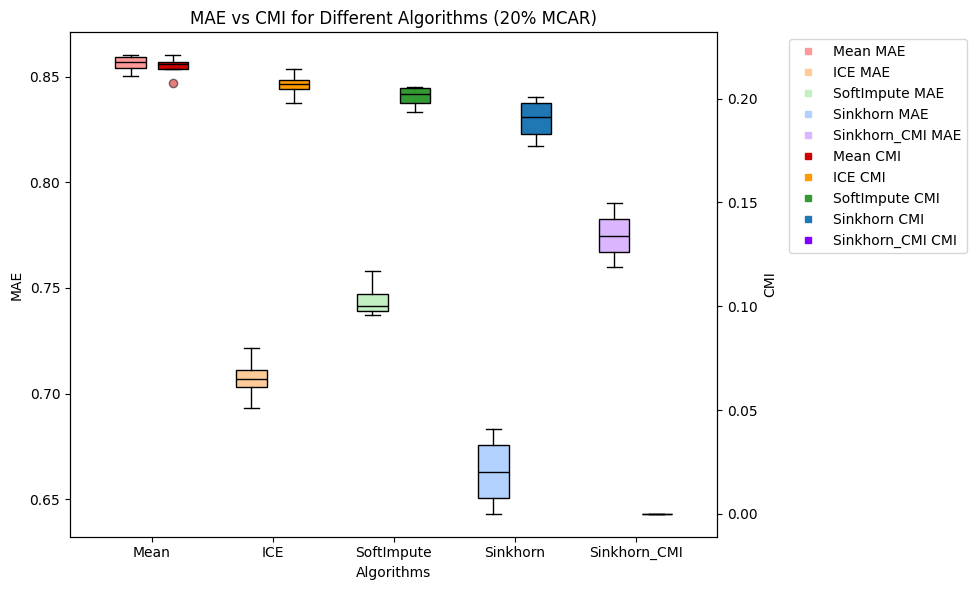

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define your algorithms
algorithms = ['Mean', 'ICE', 'SoftImpute', 'Sinkhorn', 'Sinkhorn_CMI']

# Replace with actual data
cmi_data_mcar20 = {
    'Mean': mcar_mean_cmi20,
    'ICE': mcar_ice_cmi20,
    'SoftImpute': mcar_soft_cmi20,
    'Sinkhorn': mcar_sk_cmi20,
    'Sinkhorn_CMI': mcar_skCmi_cmi20
}
mae_data_mcar20 = {
    'Mean': mcar_mean_mae20,
    'ICE': mcar_ice_mae20,
    'SoftImpute': mcar_soft_mae20,
    'Sinkhorn': mcar_sk_mae20,
    'Sinkhorn_CMI': mcar_skCmi_mae20
}

# Colors (light for MAE, dark for CMI)
color_pairs = [
    ('#ff9999', '#cc0000'),  # Mean
    ('#ffcc99', '#ff9900'),  # ICE
    ('#c2f0c2', '#339933'),  # SoftImpute
    ('#b3d1ff', '#1f77b4'),  # Sinkhorn
    ('#dab6ff', '#8000ff')   # Sinkhorn_CMI
]

x = np.arange(len(algorithms))
width = 0.35

fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

# Plot each algorithm's box individually
for i, algo in enumerate(algorithms):
    mae_vals = mae_data_mcar20[algo]
    cmi_vals = cmi_data_mcar20[algo]

    # MAE box (lighter color)
    ax1.boxplot(mae_vals, positions=[x[i] - width/2], widths=0.25, patch_artist=True,
                boxprops=dict(facecolor=color_pairs[i][0], color='black'),
                medianprops=dict(color='black'),
                capprops=dict(color='black'),
                whiskerprops=dict(color='black'),
                flierprops=dict(markerfacecolor=color_pairs[i][0], marker='o', alpha=0.5))

    # CMI box (darker color)
    ax2.boxplot(cmi_vals, positions=[x[i] + width/2], widths=0.25, patch_artist=True,
                boxprops=dict(facecolor=color_pairs[i][1], color='black'),
                medianprops=dict(color='black'),
                capprops=dict(color='black'),
                whiskerprops=dict(color='black'),
                flierprops=dict(markerfacecolor=color_pairs[i][1], marker='o', alpha=0.5))

# Axes settings
ax1.set_xlabel('Algorithms')
ax1.set_ylabel('MAE', color='black')
ax2.set_ylabel('CMI', color='black')
ax1.set_xticks(x)
ax1.set_xticklabels(algorithms)
ax1.set_title('MAE vs CMI for Different Algorithms (20% MCAR)')

ax1.tick_params(axis='y', labelcolor='black')
ax2.tick_params(axis='y', labelcolor='black')

# Custom legend
handles = [
    plt.Line2D([], [], color=pair[0], marker='s', linestyle='None', markersize=5, label=f'{algo} MAE')
    for algo, pair in zip(algorithms, color_pairs)
] + [
    plt.Line2D([], [], color=pair[1], marker='s', linestyle='None', markersize=5, label=f'{algo} CMI')
    for algo, pair in zip(algorithms, color_pairs)
]
ax1.legend(handles=handles, bbox_to_anchor=(1.10, 1), loc='upper left')

plt.tight_layout()
plt.show()


### 25% MCAR

In [ ]:
cycle = 4
dependencies = None
missing_type = "MCAR"
missing_rate = 25
highest_lamda_cmi = 15
niter = 5000
mcar_sk_mae25, mcar_sk_cmi25, mcar_skCmi_mae25, mcar_skCmi_cmi25, mcar_mean_mae25, mcar_mean_cmi25, mcar_ice_mae25, mcar_ice_cmi25, mcar_soft_mae25, mcar_soft_cmi25 = run(groundTruth_tensor, X, Y, cycle, missing_type, missing_rate, dependencies, highest_lamda_cmi, niter,bucket_specs, X_cols, Y_cols, Z_cols)

INFO:root:batchsize = 128, epsilon = 0.4401
INFO:root:Iteration 0:	 Loss: 2.1551	 Validation MAE: 0.8512	RMSE: 1.0108
INFO:root:Iteration 50:	 Loss: 2.3569	 Validation MAE: 0.7668	RMSE: 0.9836
INFO:root:Iteration 100:	 Loss: 1.8705	 Validation MAE: 0.7347	RMSE: 0.9738
INFO:root:Iteration 150:	 Loss: 2.0333	 Validation MAE: 0.7132	RMSE: 0.9683
INFO:root:Iteration 200:	 Loss: 2.0180	 Validation MAE: 0.6978	RMSE: 0.9650
INFO:root:Iteration 250:	 Loss: 2.0146	 Validation MAE: 0.6875	RMSE: 0.9634
INFO:root:Iteration 300:	 Loss: 1.8338	 Validation MAE: 0.6820	RMSE: 0.9630
INFO:root:Iteration 350:	 Loss: 1.9957	 Validation MAE: 0.6746	RMSE: 0.9600
INFO:root:Iteration 400:	 Loss: 2.0228	 Validation MAE: 0.6703	RMSE: 0.9587
INFO:root:Iteration 450:	 Loss: 2.0789	 Validation MAE: 0.6678	RMSE: 0.9585
INFO:root:Iteration 500:	 Loss: 1.6837	 Validation MAE: 0.6632	RMSE: 0.9560
INFO:root:Iteration 550:	 Loss: 2.1854	 Validation MAE: 0.6614	RMSE: 0.9567
INFO:root:Iteration 600:	 Loss: 1.5866	 Validat

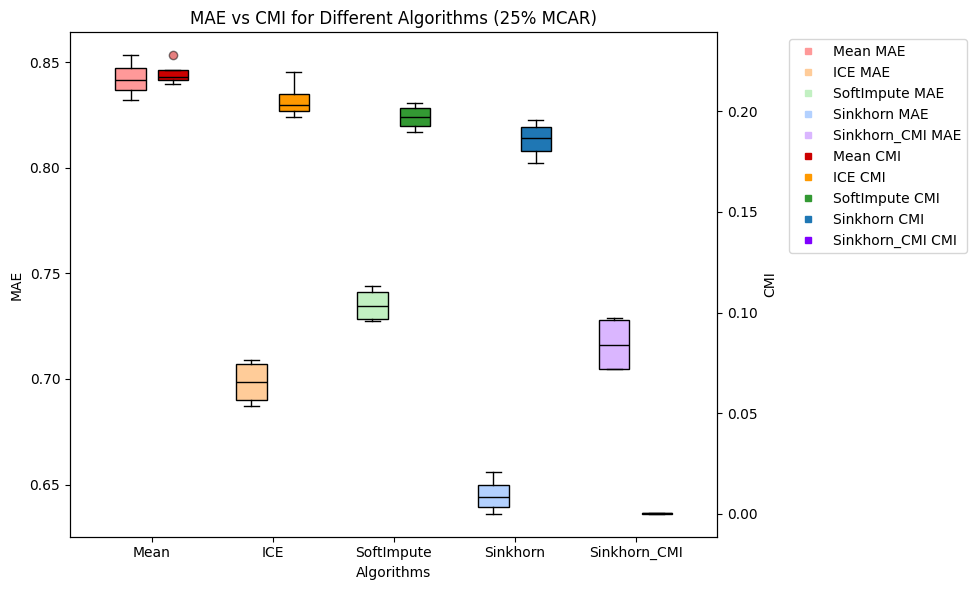

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define your algorithms
algorithms = ['Mean', 'ICE', 'SoftImpute', 'Sinkhorn', 'Sinkhorn_CMI']

# Replace with actual data
cmi_data_mcar25 = {
    'Mean': mcar_mean_cmi25,
    'ICE': mcar_ice_cmi25,
    'SoftImpute': mcar_soft_cmi25,
    'Sinkhorn': mcar_sk_cmi25,
    'Sinkhorn_CMI': mcar_skCmi_cmi25
}
mae_data_mcar25 = {
    'Mean': mcar_mean_mae25,
    'ICE': mcar_ice_mae25,
    'SoftImpute': mcar_soft_mae25,
    'Sinkhorn': mcar_sk_mae25,
    'Sinkhorn_CMI': mcar_skCmi_mae25
}

# Colors (light for MAE, dark for CMI)
color_pairs = [
    ('#ff9999', '#cc0000'),  # Mean
    ('#ffcc99', '#ff9900'),  # ICE
    ('#c2f0c2', '#339933'),  # SoftImpute
    ('#b3d1ff', '#1f77b4'),  # Sinkhorn
    ('#dab6ff', '#8000ff')   # Sinkhorn_CMI
]

x = np.arange(len(algorithms))
width = 0.35

fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

# Plot each algorithm's box individually
for i, algo in enumerate(algorithms):
    mae_vals = mae_data_mcar25[algo]
    cmi_vals = cmi_data_mcar25[algo]

    # MAE box (lighter color)
    ax1.boxplot(mae_vals, positions=[x[i] - width/2], widths=0.25, patch_artist=True,
                boxprops=dict(facecolor=color_pairs[i][0], color='black'),
                medianprops=dict(color='black'),
                capprops=dict(color='black'),
                whiskerprops=dict(color='black'),
                flierprops=dict(markerfacecolor=color_pairs[i][0], marker='o', alpha=0.5))

    # CMI box (darker color)
    ax2.boxplot(cmi_vals, positions=[x[i] + width/2], widths=0.25, patch_artist=True,
                boxprops=dict(facecolor=color_pairs[i][1], color='black'),
                medianprops=dict(color='black'),
                capprops=dict(color='black'),
                whiskerprops=dict(color='black'),
                flierprops=dict(markerfacecolor=color_pairs[i][1], marker='o', alpha=0.5))

# Axes settings
ax1.set_xlabel('Algorithms')
ax1.set_ylabel('MAE', color='black')
ax2.set_ylabel('CMI', color='black')
ax1.set_xticks(x)
ax1.set_xticklabels(algorithms)
ax1.set_title('MAE vs CMI for Different Algorithms (25% MCAR)')

ax1.tick_params(axis='y', labelcolor='black')
ax2.tick_params(axis='y', labelcolor='black')

# Custom legend
handles = [
    plt.Line2D([], [], color=pair[0], marker='s', linestyle='None', markersize=5, label=f'{algo} MAE')
    for algo, pair in zip(algorithms, color_pairs)
] + [
    plt.Line2D([], [], color=pair[1], marker='s', linestyle='None', markersize=5, label=f'{algo} CMI')
    for algo, pair in zip(algorithms, color_pairs)
]
ax1.legend(handles=handles, bbox_to_anchor=(1.10, 1), loc='upper left')

plt.tight_layout()
plt.show()


### 30% MCAR

In [ ]:
cycle = 4
dependencies = None
missing_type = "MCAR"
missing_rate = 30
highest_lamda_cmi = 15
niter = 5000
mcar_sk_mae30, mcar_sk_cmi30, mcar_skCmi_mae30, mcar_skCmi_cmi30, mcar_mean_mae30, mcar_mean_cmi30, mcar_ice_mae30, mcar_ice_cmi30, mcar_soft_mae30, mcar_soft_cmi30 = run(groundTruth_tensor, X, Y, cycle, missing_type, missing_rate, dependencies, highest_lamda_cmi, niter,bucket_specs, X_cols, Y_cols, Z_cols)

INFO:root:batchsize = 128, epsilon = 0.4101
INFO:root:Iteration 0:	 Loss: 2.1431	 Validation MAE: 0.8581	RMSE: 1.0108
INFO:root:Iteration 50:	 Loss: 2.2576	 Validation MAE: 0.7654	RMSE: 0.9772
INFO:root:Iteration 100:	 Loss: 1.9420	 Validation MAE: 0.7318	RMSE: 0.9677
INFO:root:Iteration 150:	 Loss: 1.7966	 Validation MAE: 0.7117	RMSE: 0.9635
INFO:root:Iteration 200:	 Loss: 2.3071	 Validation MAE: 0.6977	RMSE: 0.9607
INFO:root:Iteration 250:	 Loss: 1.8645	 Validation MAE: 0.6890	RMSE: 0.9610
INFO:root:Iteration 300:	 Loss: 2.0195	 Validation MAE: 0.6845	RMSE: 0.9618
INFO:root:Iteration 350:	 Loss: 1.7765	 Validation MAE: 0.6803	RMSE: 0.9611
INFO:root:Iteration 400:	 Loss: 1.9048	 Validation MAE: 0.6751	RMSE: 0.9601
INFO:root:Iteration 450:	 Loss: 2.1189	 Validation MAE: 0.6713	RMSE: 0.9604
INFO:root:Iteration 500:	 Loss: 2.0664	 Validation MAE: 0.6687	RMSE: 0.9599
INFO:root:Iteration 550:	 Loss: 1.9812	 Validation MAE: 0.6662	RMSE: 0.9599
INFO:root:Iteration 600:	 Loss: 2.0450	 Validat

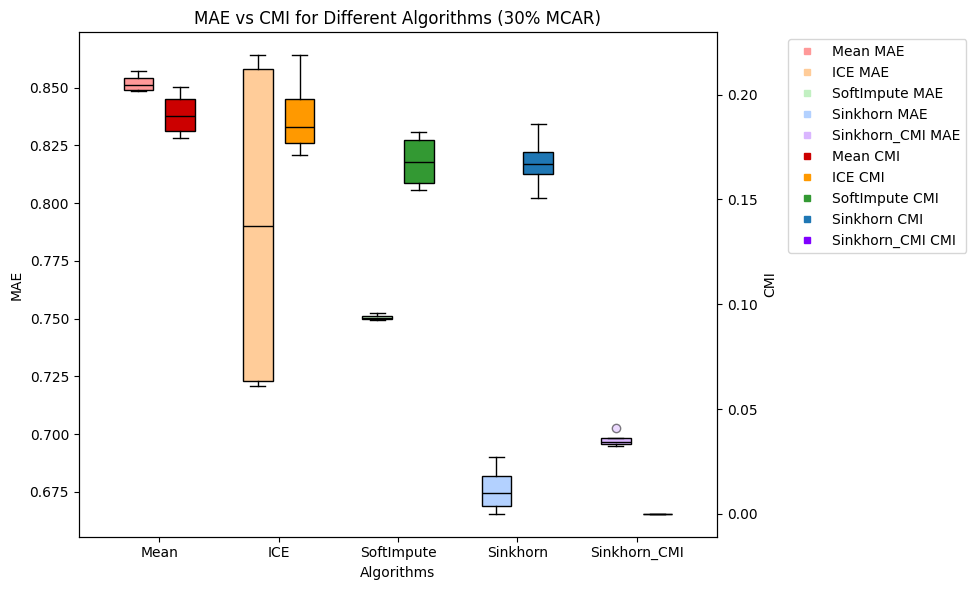

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define your algorithms
algorithms = ['Mean', 'ICE', 'SoftImpute', 'Sinkhorn', 'Sinkhorn_CMI']

# Replace with actual data
cmi_data_mcar30 = {
    'Mean': mcar_mean_cmi30,
    'ICE': mcar_ice_cmi30,
    'SoftImpute': mcar_soft_cmi30,
    'Sinkhorn': mcar_sk_cmi30,
    'Sinkhorn_CMI': mcar_skCmi_cmi30
}
mae_data_mcar30 = {
    'Mean': mcar_mean_mae30,
    'ICE': mcar_ice_mae30,
    'SoftImpute': mcar_soft_mae30,
    'Sinkhorn': mcar_sk_mae30,
    'Sinkhorn_CMI': mcar_skCmi_mae30
}

# Colors (light for MAE, dark for CMI)
color_pairs = [
    ('#ff9999', '#cc0000'),  # Mean
    ('#ffcc99', '#ff9900'),  # ICE
    ('#c2f0c2', '#339933'),  # SoftImpute
    ('#b3d1ff', '#1f77b4'),  # Sinkhorn
    ('#dab6ff', '#8000ff')   # Sinkhorn_CMI
]

x = np.arange(len(algorithms))
width = 0.35

fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

# Plot each algorithm's box individually
for i, algo in enumerate(algorithms):
    mae_vals = mae_data_mcar30[algo]
    cmi_vals = cmi_data_mcar30[algo]

    # MAE box (lighter color)
    ax1.boxplot(mae_vals, positions=[x[i] - width/2], widths=0.25, patch_artist=True,
                boxprops=dict(facecolor=color_pairs[i][0], color='black'),
                medianprops=dict(color='black'),
                capprops=dict(color='black'),
                whiskerprops=dict(color='black'),
                flierprops=dict(markerfacecolor=color_pairs[i][0], marker='o', alpha=0.5))

    # CMI box (darker color)
    ax2.boxplot(cmi_vals, positions=[x[i] + width/2], widths=0.25, patch_artist=True,
                boxprops=dict(facecolor=color_pairs[i][1], color='black'),
                medianprops=dict(color='black'),
                capprops=dict(color='black'),
                whiskerprops=dict(color='black'),
                flierprops=dict(markerfacecolor=color_pairs[i][1], marker='o', alpha=0.5))

# Axes settings
ax1.set_xlabel('Algorithms')
ax1.set_ylabel('MAE', color='black')
ax2.set_ylabel('CMI', color='black')
ax1.set_xticks(x)
ax1.set_xticklabels(algorithms)
ax1.set_title('MAE vs CMI for Different Algorithms (30% MCAR)')

ax1.tick_params(axis='y', labelcolor='black')
ax2.tick_params(axis='y', labelcolor='black')

# Custom legend
handles = [
    plt.Line2D([], [], color=pair[0], marker='s', linestyle='None', markersize=5, label=f'{algo} MAE')
    for algo, pair in zip(algorithms, color_pairs)
] + [
    plt.Line2D([], [], color=pair[1], marker='s', linestyle='None', markersize=5, label=f'{algo} CMI')
    for algo, pair in zip(algorithms, color_pairs)
]
ax1.legend(handles=handles, bbox_to_anchor=(1.10, 1), loc='upper left')

plt.tight_layout()
plt.show()


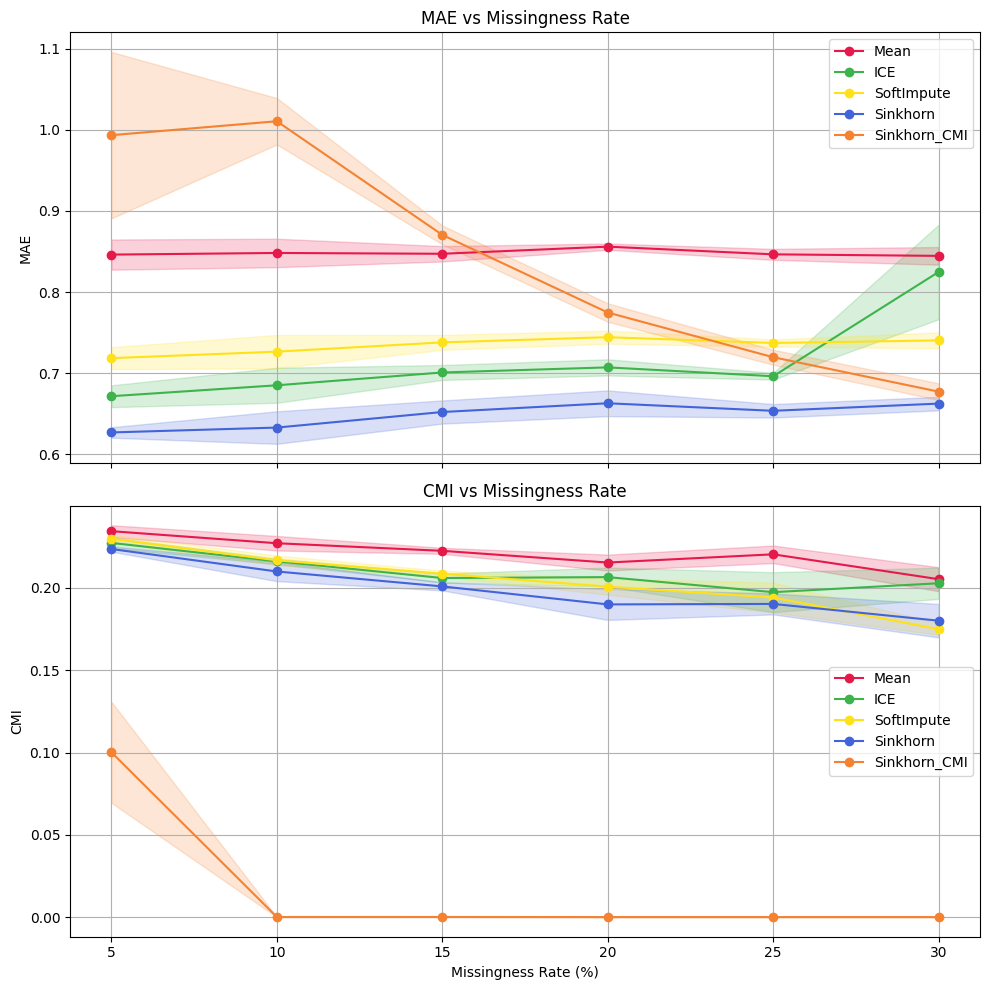

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

missing_rates = [5, 10, 15, 20, 25, 30]
algorithms = ['Mean', 'ICE', 'SoftImpute', 'Sinkhorn', 'Sinkhorn_CMI']
colors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231']

# Replace the below placeholders with actual numpy arrays (shape: [6, 4] if 4 runs per rate)
mae_results = {
    'Mean': [mcar_mean_mae5, mcar_mean_mae10, mcar_mean_mae15, mcar_mean_mae20, mcar_mean_mae25, mcar_mean_mae30],
    'ICE': [mcar_ice_mae5, mcar_ice_mae10, mcar_ice_mae15, mcar_ice_mae20, mcar_ice_mae25, mcar_ice_mae30],
    'SoftImpute': [mcar_soft_mae5, mcar_soft_mae10, mcar_soft_mae15, mcar_soft_mae20, mcar_soft_mae25, mcar_soft_mae30],
    'Sinkhorn': [mcar_sk_mae5, mcar_sk_mae10, mcar_sk_mae15, mcar_sk_mae20, mcar_sk_mae25, mcar_sk_mae30],
    'Sinkhorn_CMI': [mcar_skCmi_mae5, mcar_skCmi_mae10, mcar_skCmi_mae15, mcar_skCmi_mae20, mcar_skCmi_mae25, mcar_skCmi_mae30]
}

cmi_results = {
    'Mean': [mcar_mean_cmi5, mcar_mean_cmi10, mcar_mean_cmi15, mcar_mean_cmi20, mcar_mean_cmi25, mcar_mean_cmi30],
    'ICE': [mcar_ice_cmi5, mcar_ice_cmi10, mcar_ice_cmi15, mcar_ice_cmi20, mcar_ice_cmi25, mcar_ice_cmi30],
    'SoftImpute': [mcar_soft_cmi5, mcar_soft_cmi10, mcar_soft_cmi15, mcar_soft_cmi20, mcar_soft_cmi25, mcar_soft_cmi30],
    'Sinkhorn': [mcar_sk_cmi5, mcar_sk_cmi10, mcar_sk_cmi15, mcar_sk_cmi20, mcar_sk_cmi25, mcar_sk_cmi30],
    'Sinkhorn_CMI': [mcar_skCmi_cmi5, mcar_skCmi_cmi10, mcar_skCmi_cmi15, mcar_skCmi_cmi20, mcar_skCmi_cmi25, mcar_skCmi_cmi30]
}

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10), sharex=True)

# --- MAE plot ---
for i, algo in enumerate(algorithms):
    data = np.array(mae_results[algo])
    means = np.mean(data, axis=1)
    stds = np.std(data, axis=1)
    ax1.plot(missing_rates, means, label=algo, color=colors[i], marker='o')
    ax1.fill_between(missing_rates, means - stds, means + stds, alpha=0.2, color=colors[i])

ax1.set_ylabel('MAE')
ax1.set_title('MAE vs Missingness Rate')
ax1.grid(True)
ax1.legend()

# --- CMI plot ---
for i, algo in enumerate(algorithms):
    data = np.array(cmi_results[algo])
    means = np.mean(data, axis=1)
    stds = np.std(data, axis=1)
    ax2.plot(missing_rates, means, label=algo, color=colors[i], marker='o')
    ax2.fill_between(missing_rates, means - stds, means + stds, alpha=0.2, color=colors[i])

ax2.set_xlabel('Missingness Rate (%)')
ax2.set_ylabel('CMI')
ax2.set_title('CMI vs Missingness Rate')
ax2.grid(True)
ax2.legend()

plt.tight_layout()
plt.show()


### Machine Learning

In [ ]:
k = 2  # Choose the number of folds
kf = KFold(n_splits=k, shuffle=True, random_state=42)


In [ ]:
x = groundTruth.iloc[:, :-1]  # x is not scaled
y = groundTruth.iloc[:, -1]  # y is not scaled

30% MCAR

In [ ]:

missing_type = "MCAR"
missing_rate = 30
dependencies = None
highest_lamda_cmi = 30
niter = 5000
protected_index = 8
accuracy_sk_mcar30 = []
accuracy_sk_cmi_mcar30 = []
accuracy_mean_mcar30 = []
accuracy_ice_mcar30 = []
accuracy_soft_imp_mcar30 = []
demoP_sk_mcar30 = []
demoP_sk_cmi_mcar30 = []
demoP_mean_mcar30 = []
demoP_ice_mcar30 = []
demoP_soft_imp_mcar30 = []
equiod_sk_mcar30 = []
equiod_sk_cmi_mcar30 = []
equiod_mean_mcar30 = []
equiod_ice_mcar30 = []
equiod_soft_imp_mcar30 = []
bucket = {8:2} 


# X and Y is scaled to z-score

for fold, (train_index, test_index) in enumerate(kf.split(x)):
    x_train = x.iloc[train_index].reset_index(drop=True)  # No index numbers
    x_test = x.iloc[test_index].reset_index(drop=True)    # No index numbers
    y_train = y.iloc[train_index].reset_index(drop=True)  # No index numbers
    y_test = y.iloc[test_index].reset_index(drop=True)    # No index numbers

    #z-score

    scaler = StandardScaler()
    x_train = pd.DataFrame(scaler.fit_transform(x_train), columns=x_train.columns) # converting x_trian and x_test to z-score
    x_test = scaler.transform(x_test)
   

    
    x_train_sk_imp_data, x_train_sk_cmi_imp_data, x_train_mean_imp_data, x_train_ice_imp_data, x_train_soft_imp_data = imputation(x_train, y_train, missing_type, missing_rate, dependencies, highest_lamda_cmi, niter, bucket_specs, X_cols, Y_cols, Z_cols)
    
   

    

    y_test = y_test.to_numpy()
    y_train = y_train.to_numpy()

    
    acc_sk, dp_sk, eod_sk = machineLearning(x_train_sk_imp_data[:, :-1], y_train, x_test, y_test, protected_index, bucket)
    equiod_sk_mcar30.append(eod_sk)
    accuracy_sk_mcar30.append(acc_sk)
    demoP_sk_mcar30.append(dp_sk)

    acc_sk_cmi, dp_sk_cmi, eod_sk_cmi = machineLearning(x_train_sk_cmi_imp_data[:, :-1], y_train, x_test, y_test, protected_index, bucket)
    equiod_sk_cmi_mcar30.append(eod_sk_cmi)
    accuracy_sk_cmi_mcar30.append(acc_sk_cmi)
    demoP_sk_cmi_mcar30.append(dp_sk_cmi)

    acc_mean, dp_mean, eod_mean = machineLearning(x_train_mean_imp_data[:, :-1], y_train, x_test, y_test, protected_index, bucket)
    equiod_mean_mcar30.append(eod_mean)
    accuracy_mean_mcar30.append(acc_mean)
    demoP_mean_mcar30.append(dp_mean)

    acc_ice, dp_ice, eod_ice = machineLearning(x_train_ice_imp_data[:, :-1], y_train, x_test, y_test, protected_index, bucket)
    equiod_ice_mcar30.append(eod_ice)
    accuracy_ice_mcar30.append(acc_ice)
    demoP_ice_mcar30.append(dp_ice)

    acc_soft_imp, dp_soft_imp, eod_soft_imp = machineLearning(x_train_soft_imp_data[:, :-1], y_train, x_test, y_test, protected_index, bucket)
    equiod_soft_imp_mcar30.append(eod_soft_imp)
    accuracy_soft_imp_mcar30.append(acc_soft_imp)
    demoP_soft_imp_mcar30.append(dp_soft_imp) 


INFO:root:batchsize = 128, epsilon = 0.4080
INFO:root:Iteration 0:	 Loss: 1.8731
INFO:root:Iteration 0:	 Loss: 2.0624


[[-1.4975383   0.         -1.7423915  ... -0.83441341 -0.38867084
  -1.11040502]
 [ 0.03553776  1.         -0.53612046 ... -0.83441341  0.06143132
   0.61090244]
 [-1.81792141  0.         -1.7423915  ... -0.83441341 -0.13482147
  -1.11040502]
 ...
 [-0.0821691   0.          0.67015058 ... -0.83441341  2.24291713
   0.61090244]
 [ 0.31796595  0.          0.18399093 ...  1.19844671  0.2432218
   0.61090244]
 [-1.71112704  0.         -0.53612046 ... -0.83441341  0.0095576
   0.10937485]]
[[-1.57220366  0.         -0.53315896 ... -0.84599688 -0.83473854
  -1.08005542]
 [ 0.026175    0.         -1.72025722 ... -0.84599688 -0.83473854
  -1.08005542]
 [-1.78532082  1.         -0.53315896 ... -0.84599688 -0.83473854
  -1.08005542]
 ...
 [ 0.34585073  1.          0.6539393  ...  1.18203745 -0.6523921
   0.604929  ]
 [-0.9328522   0.          1.84103756 ... -0.84599688  0.2593401
   0.604929  ]
 [ 0.34585073  1.         -1.72025722 ... -0.84599688 -0.83473854
   0.604929  ]]
[0. 0. 1. 0. 0. 0. 0

INFO:root:batchsize = 128, epsilon = 0.4104
INFO:root:Iteration 0:	 Loss: 2.0626
INFO:root:Iteration 0:	 Loss: 1.9687


[[-1.44409964  0.          0.0434353  ... -0.84604342 -0.3070531
  -1.04973197]
 [-0.48381937  1.         -0.50946432 ...  0.09267898  0.05723557
   0.18834271]
 [ 0.04966967  0.         -0.03517962 ... -0.84604342 -0.86499877
  -1.04973197]
 ...
 [ 0.36976309  0.         -0.12657896 ... -0.11412183  0.24168244
   0.56817176]
 [ 0.36976309  1.          0.0508131  ... -0.84604342 -0.86499877
   0.56817176]
 [-1.65749526  0.         -0.50946432 ... -0.28982656 -0.86499877
  -0.26128834]]
[[-1.72576442  0.         -1.69351227 ... -0.81847597 -0.83622761
  -1.0507024 ]
 [-0.57230817  1.          0.62747666 ...  1.22178297  0.57273059
   0.60349268]
 [-0.88688715  1.         -1.69351227 ... -0.81847597 -0.83622761
  -1.0507024 ]
 ...
 [ 0.47628842  1.          0.62747666 ...  1.22178297  1.79382769
   0.60349268]
 [ 0.26656911  0.         -1.69351227 ... -0.81847597 -0.83622761
   2.25768777]
 [ 0.16170945  1.         -1.69351227 ... -0.81847597  0.29093895
  -1.0507024 ]]
[0. 1. 1. 1. 0. 0

INFO:root:batchsize = 128, epsilon = 0.4085
INFO:root:Iteration 0:	 Loss: 2.0431
INFO:root:Iteration 0:	 Loss: 1.8239


[[-0.48616553  1.         -0.08232872 ... -0.78776099  0.10379823
   0.58525552]
 [-1.76121163  0.         -1.79125518 ... -0.78776099 -0.80993203
  -0.98069843]
 [-0.59241938  1.          0.6698178  ...  0.42661211  0.23069028
   0.41237101]
 ...
 [ 0.23945996  0.          0.39032343 ... -0.19435051  0.28654428
   0.58525552]
 [ 0.10828703  0.          0.6698178  ... -0.78776099  2.29675084
   0.58525552]
 [ 0.36386519  0.         -1.79125518 ... -0.78776099 -0.80993203
   0.58525552]]
[[-1.45216045  0.         -1.72740741 ... -0.81501608 -0.82123745
  -1.02496347]
 [-1.77384255  0.          0.63641326 ...  1.22696966  0.59950059
   0.59105445]
 [-1.66661518  0.          0.63641326 ... -0.81501608 -0.82123745
   0.59105445]
 ...
 [ 1.01406896  1.          0.63641326 ...  1.22696966 -0.82123745
   0.59105445]
 [ 0.37070477  0.          0.63641326 ...  1.22696966  0.31535298
   0.59105445]
 [-1.66661518  0.         -0.54549708 ... -0.81501608 -0.82123745
  -1.02496347]]
[0. 0. 0. 1. 0. 

INFO:root:batchsize = 128, epsilon = 0.4108
INFO:root:Iteration 0:	 Loss: 2.2192
INFO:root:Iteration 0:	 Loss: 2.3084


[[-1.48244723  0.         -1.75723628 ... -0.79582243 -0.83616312
  -0.29061359]
 [ 0.17210947  0.         -0.05212044 ... -0.79582243 -0.83616312
  -1.04295683]
 [-0.02988282  0.          0.21118362 ... -0.03300928  0.59559646
   0.10747826]
 ...
 [ 0.36637989  0.          0.61321487 ...  1.25656172  0.30924455
   0.61067867]
 [ 0.36637989  1.         -1.75723628 ... -0.79582243 -0.83616312
   0.61067867]
 [ 0.09160372  0.         -0.57201071 ... -0.79582243 -0.24759068
  -1.04295683]]
[[-0.45357081  1.         -0.51267508 ... -0.81501608  0.11800232
   0.58554834]
 [ 0.0752114   0.         -0.51267508 ... -0.81501608 -0.83851061
  -1.05446306]
 [-0.45357081  0.          0.65697104 ...  1.22696966  0.11800232
   0.58554834]
 ...
 [ 1.45004515  0.         -0.51267508 ... -0.81501608 -0.07330027
   0.58554834]
 [-1.29962235  0.         -1.6823212  ... -0.81501608 -0.83851061
  -1.05446306]
 [ 1.5558016   0.          0.65697104 ... -0.81501608  2.41363335
   0.58554834]]
[1. 0. 0. 1. 1. 

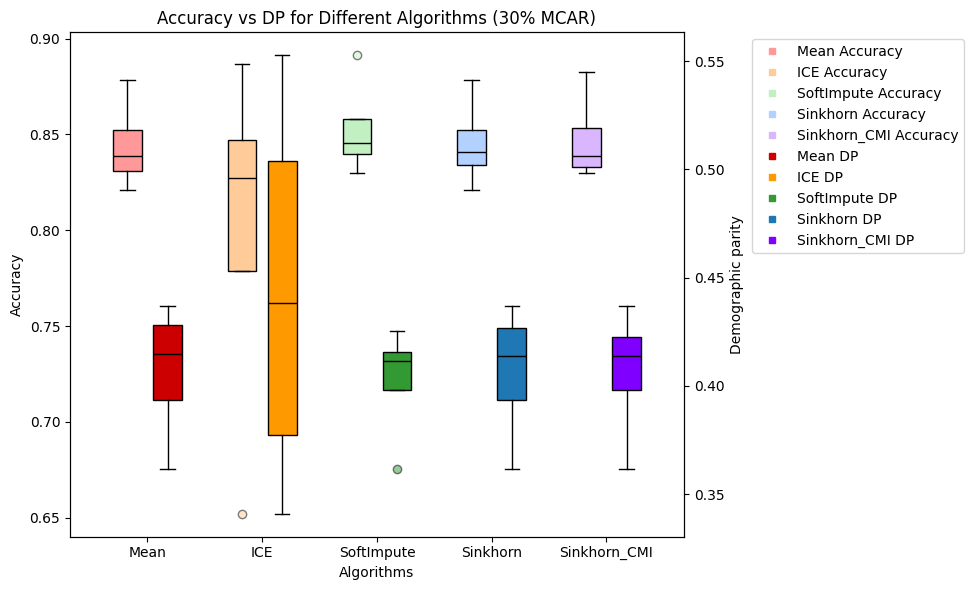

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define your algorithms
algorithms = ['Mean', 'ICE', 'SoftImpute', 'Sinkhorn', 'Sinkhorn_CMI']

# Replace with actual data
accuracy_mcar30 = {
    'Mean': accuracy_mean_mcar30,
    'ICE': accuracy_ice_mcar30,
    'SoftImpute': accuracy_soft_imp_mcar30,
    'Sinkhorn': accuracy_sk_mcar30,
    'Sinkhorn_CMI': accuracy_sk_cmi_mcar30
}
dp_mcar30 = {
    'Mean': demoP_mean_mcar30,
    'ICE': demoP_ice_mcar30,
    'SoftImpute': demoP_soft_imp_mcar30,
    'Sinkhorn': demoP_sk_mcar30,
    'Sinkhorn_CMI': demoP_sk_cmi_mcar30
}




# Colors (light for MAE, dark for CMI)
color_pairs = [
    ('#ff9999', '#cc0000'),  # Mean
    ('#ffcc99', '#ff9900'),  # ICE
    ('#c2f0c2', '#339933'),  # SoftImpute
    ('#b3d1ff', '#1f77b4'),  # Sinkhorn
    ('#dab6ff', '#8000ff')   # Sinkhorn_CMI
]

x = np.arange(len(algorithms))
width = 0.35

fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

# Plot each algorithm's box individually
for i, algo in enumerate(algorithms):
    accuracy_vals = accuracy_mcar30[algo]
    dp_vals = dp_mcar30[algo]

    # MAE box (lighter color)
    ax1.boxplot(accuracy_vals, positions=[x[i] - width/2], widths=0.25, patch_artist=True,
                boxprops=dict(facecolor=color_pairs[i][0], color='black'),
                medianprops=dict(color='black'),
                capprops=dict(color='black'),
                whiskerprops=dict(color='black'),
                flierprops=dict(markerfacecolor=color_pairs[i][0], marker='o', alpha=0.5))

    # CMI box (darker color)
    ax2.boxplot(dp_vals, positions=[x[i] + width/2], widths=0.25, patch_artist=True,
                boxprops=dict(facecolor=color_pairs[i][1], color='black'),
                medianprops=dict(color='black'),
                capprops=dict(color='black'),
                whiskerprops=dict(color='black'),
                flierprops=dict(markerfacecolor=color_pairs[i][1], marker='o', alpha=0.5))

# Axes settings
ax1.set_xlabel('Algorithms')
ax1.set_ylabel('Accuracy', color='black')
ax2.set_ylabel('Demographic parity', color='black')
ax1.set_xticks(x)
ax1.set_xticklabels(algorithms)
ax1.set_title('Accuracy vs DP for Different Algorithms (30% MCAR)')

ax1.tick_params(axis='y', labelcolor='black')
ax2.tick_params(axis='y', labelcolor='black')

# Custom legend
handles = [
    plt.Line2D([], [], color=pair[0], marker='s', linestyle='None', markersize=5, label=f'{algo} Accuracy')
    for algo, pair in zip(algorithms, color_pairs)
] + [
    plt.Line2D([], [], color=pair[1], marker='s', linestyle='None', markersize=5, label=f'{algo} DP')
    for algo, pair in zip(algorithms, color_pairs)
]
ax1.legend(handles=handles, bbox_to_anchor=(1.10, 1), loc='upper left')

plt.tight_layout()
plt.show()


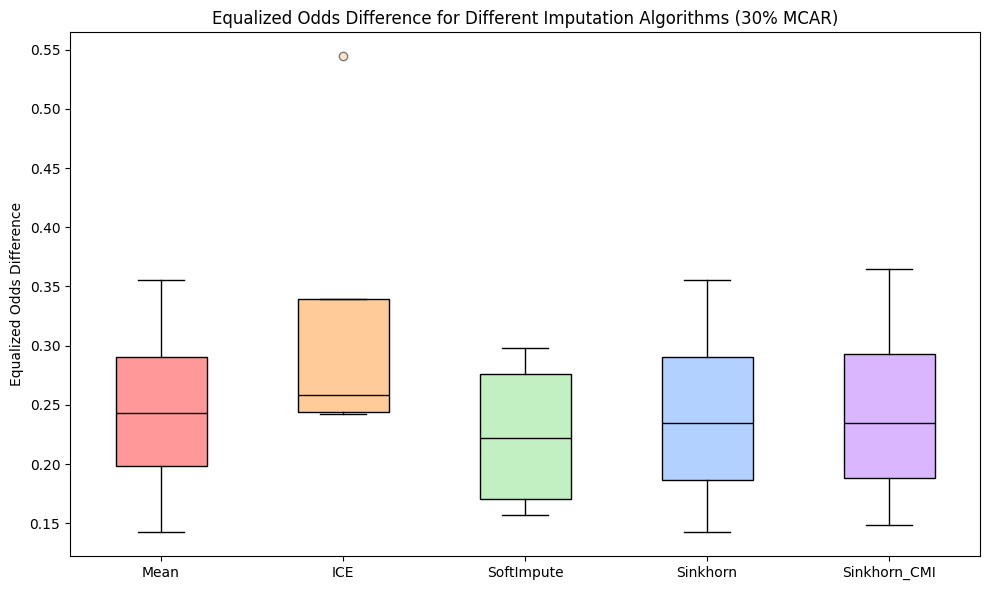

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define algorithms
algorithms = ['Mean', 'ICE', 'SoftImpute', 'Sinkhorn', 'Sinkhorn_CMI']

# Replace with your actual EOD results (lists or numpy arrays)
eod_mcar30 = {
    'Mean': equiod_mean_mcar30,
    'ICE': equiod_ice_mcar30,
    'SoftImpute': equiod_soft_imp_mcar30,
    'Sinkhorn': equiod_sk_mcar30,
    'Sinkhorn_CMI': equiod_sk_cmi_mcar30
}

# Colors for EOD
colors = ['#ff9999', '#ffcc99', '#c2f0c2', '#b3d1ff', '#dab6ff']

# Create boxplot
x = np.arange(len(algorithms))

fig, ax = plt.subplots(figsize=(10, 6))

for i, algo in enumerate(algorithms):
    eod_vals = eod_mcar30[algo]
    ax.boxplot(eod_vals, positions=[x[i]], widths=0.5, patch_artist=True,
               boxprops=dict(facecolor=colors[i], color='black'),
               medianprops=dict(color='black'),
               capprops=dict(color='black'),
               whiskerprops=dict(color='black'),
               flierprops=dict(markerfacecolor=colors[i], marker='o', alpha=0.5))

# Axis labels and title
ax.set_xticks(x)
ax.set_xticklabels(algorithms)
ax.set_ylabel('Equalized Odds Difference')
ax.set_title('Equalized Odds Difference for Different Imputation Algorithms (30% MCAR)')

plt.tight_layout()
plt.show()


30% MAR

In [ ]:

missing_type = "MAR"
missing_rate = 30
dependencies = dependencies_mar
highest_lamda_cmi = 30
niter = 5000
protected_index = 8
accuracy_sk_mar30 = []
accuracy_sk_cmi_mar30 = []
accuracy_mean_mar30 = []
accuracy_ice_mar30 = []
accuracy_soft_imp_mar30 = []
demoP_sk_mar30 = []
demoP_sk_cmi_mar30 = []
demoP_mean_mar30 = []
demoP_ice_mar30 = []
demoP_soft_imp_mar30 = []
equiod_sk_mar30 = []
equiod_sk_cmi_mar30 = []
equiod_mean_mar30 = []
equiod_ice_mar30 = []
equiod_soft_imp_mar30 = []
bucket = {8:2} 


# X and Y is scaled to z-score

for fold, (train_index, test_index) in enumerate(kf.split(x)):
    x_train = x.iloc[train_index].reset_index(drop=True)  # No index numbers
    x_test = x.iloc[test_index].reset_index(drop=True)    # No index numbers
    y_train = y.iloc[train_index].reset_index(drop=True)  # No index numbers
    y_test = y.iloc[test_index].reset_index(drop=True)    # No index numbers

    #z-score

    scaler = StandardScaler()
    x_train = pd.DataFrame(scaler.fit_transform(x_train), columns=x_train.columns)
    x_test = scaler.transform(x_test)
   

    
    x_train_sk_imp_data, x_train_sk_cmi_imp_data, x_train_mean_imp_data, x_train_ice_imp_data, x_train_soft_imp_data = imputation(x_train, y_train, missing_type, missing_rate, dependencies, highest_lamda_cmi, niter, bucket_specs, X_cols, Y_cols, Z_cols)
    
   

    

    y_test = y_test.to_numpy()
    y_train = y_train.to_numpy()

    
    acc_sk, dp_sk, eod_sk = machineLearning(x_train_sk_imp_data[:, :-1], y_train, x_test, y_test,protected_index,bucket)
    equiod_sk_mar30.append(eod_sk)
    accuracy_sk_mar30.append(acc_sk)
    demoP_sk_mar30.append(dp_sk)

    acc_sk_cmi, dp_sk_cmi, eod_sk_cmi = machineLearning(x_train_sk_cmi_imp_data[:, :-1], y_train, x_test, y_test,protected_index,bucket)
    equiod_sk_cmi_mar30.append(eod_sk_cmi)
    accuracy_sk_cmi_mar30.append(acc_sk_cmi)
    demoP_sk_cmi_mar30.append(dp_sk_cmi)

    acc_mean, dp_mean, eod_mean = machineLearning(x_train_mean_imp_data[:, :-1], y_train, x_test, y_test,protected_index,bucket)
    equiod_mean_mar30.append(eod_mean)
    accuracy_mean_mar30.append(acc_mean)
    demoP_mean_mar30.append(dp_mean)

    acc_ice, dp_ice, eod_ice = machineLearning(x_train_ice_imp_data[:, :-1], y_train, x_test, y_test,protected_index,bucket)
    equiod_ice_mar30.append(eod_ice)
    accuracy_ice_mar30.append(acc_ice)
    demoP_ice_mar30.append(dp_ice)

    acc_soft_imp, dp_soft_imp, eod_soft_imp = machineLearning(x_train_soft_imp_data[:, :-1], y_train, x_test, y_test,protected_index,bucket)
    equiod_soft_imp_mar30.append(eod_soft_imp)
    accuracy_soft_imp_mar30.append(acc_soft_imp)
    demoP_soft_imp_mar30.append(dp_soft_imp) 


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define your algorithms
algorithms = ['Mean', 'ICE', 'SoftImpute', 'Sinkhorn', 'Sinkhorn_CMI']

# Replace with actual data
accuracy_mar30 = {
    'Mean': accuracy_mean_mar30,
    'ICE': accuracy_ice_mar30,
    'SoftImpute': accuracy_soft_imp_mar30,
    'Sinkhorn': accuracy_sk_mar30,
    'Sinkhorn_CMI': accuracy_sk_cmi_mar30
}
dp_mar30 = {
    'Mean': demoP_mean_mar30,
    'ICE': demoP_ice_mar30,
    'SoftImpute': demoP_soft_imp_mar30,
    'Sinkhorn': demoP_sk_mar30,
    'Sinkhorn_CMI': demoP_sk_cmi_mar30
}




# Colors (light for MAE, dark for CMI)
color_pairs = [
    ('#ff9999', '#cc0000'),  # Mean
    ('#ffcc99', '#ff9900'),  # ICE
    ('#c2f0c2', '#339933'),  # SoftImpute
    ('#b3d1ff', '#1f77b4'),  # Sinkhorn
    ('#dab6ff', '#8000ff')   # Sinkhorn_CMI
]

x = np.arange(len(algorithms))
width = 0.35

fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

# Plot each algorithm's box individually
for i, algo in enumerate(algorithms):
    accuracy_vals = accuracy_mar30[algo]
    dp_vals = dp_mar30[algo]

    # MAE box (lighter color)
    ax1.boxplot(accuracy_vals, positions=[x[i] - width/2], widths=0.25, patch_artist=True,
                boxprops=dict(facecolor=color_pairs[i][0], color='black'),
                medianprops=dict(color='black'),
                capprops=dict(color='black'),
                whiskerprops=dict(color='black'),
                flierprops=dict(markerfacecolor=color_pairs[i][0], marker='o', alpha=0.5))

    # CMI box (darker color)
    ax2.boxplot(dp_vals, positions=[x[i] + width/2], widths=0.25, patch_artist=True,
                boxprops=dict(facecolor=color_pairs[i][1], color='black'),
                medianprops=dict(color='black'),
                capprops=dict(color='black'),
                whiskerprops=dict(color='black'),
                flierprops=dict(markerfacecolor=color_pairs[i][1], marker='o', alpha=0.5))

# Axes settings
ax1.set_xlabel('Algorithms')
ax1.set_ylabel('Accuracy', color='black')
ax2.set_ylabel('Demographic parity', color='black')
ax1.set_xticks(x)
ax1.set_xticklabels(algorithms)
ax1.set_title('Accuracy vs DP for Different Algorithms (30% MAR)')

ax1.tick_params(axis='y', labelcolor='black')
ax2.tick_params(axis='y', labelcolor='black')

# Custom legend
handles = [
    plt.Line2D([], [], color=pair[0], marker='s', linestyle='None', markersize=5, label=f'{algo} Accuracy')
    for algo, pair in zip(algorithms, color_pairs)
] + [
    plt.Line2D([], [], color=pair[1], marker='s', linestyle='None', markersize=5, label=f'{algo} DP')
    for algo, pair in zip(algorithms, color_pairs)
]
ax1.legend(handles=handles, bbox_to_anchor=(1.10, 1), loc='upper left')

plt.tight_layout()
plt.show()


NameError: name 'accuracy_mean_mar30' is not defined

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define algorithms
algorithms = ['Mean', 'ICE', 'SoftImpute', 'Sinkhorn', 'Sinkhorn_CMI']

# Replace with your actual EOD results (lists or numpy arrays)
eod_mar30 = {
    'Mean': equiod_mean_mar30,
    'ICE': equiod_ice_mar30,
    'SoftImpute': equiod_soft_imp_mar30,
    'Sinkhorn': equiod_sk_mar30,
    'Sinkhorn_CMI': equiod_sk_cmi_mar30
}

# Colors for EOD
colors = ['#ff9999', '#ffcc99', '#c2f0c2', '#b3d1ff', '#dab6ff']

# Create boxplot
x = np.arange(len(algorithms))

fig, ax = plt.subplots(figsize=(10, 6))

for i, algo in enumerate(algorithms):
    eod_vals = eod_mar30[algo]
    ax.boxplot(eod_vals, positions=[x[i]], widths=0.5, patch_artist=True,
               boxprops=dict(facecolor=colors[i], color='black'),
               medianprops=dict(color='black'),
               capprops=dict(color='black'),
               whiskerprops=dict(color='black'),
               flierprops=dict(markerfacecolor=colors[i], marker='o', alpha=0.5))

# Axis labels and title
ax.set_xticks(x)
ax.set_xticklabels(algorithms)
ax.set_ylabel('Equalized Odds Difference')
ax.set_title('Equalized Odds Difference for Different Imputation Algorithms (30% MAR)')

plt.tight_layout()
plt.show()


30% MNAR

In [ ]:

missing_type = "MNAR"
missing_rate = 30
dependencies = dependencies_mnar
highest_lamda_cmi = 30
niter = 5000
protected_index = 8
accuracy_sk_mnar30 = []
accuracy_sk_cmi_mnar30 = []
accuracy_mean_mnar30 = []
accuracy_ice_mnar30 = []
accuracy_soft_imp_mnar30 = []
demoP_sk_mnar30 = []
demoP_sk_cmi_mnar30 = []
demoP_mean_mnar30 = []
demoP_ice_mnar30 = []
demoP_soft_imp_mnar30 = []
equiod_sk_mnar30 = []
equiod_sk_cmi_mnar30 = []
equiod_mean_mnar30 = []
equiod_ice_mnar30 = []
equiod_soft_imp_mnar30 = []
bucket = {8:2} 


# X and Y is scaled to z-score

for fold, (train_index, test_index) in enumerate(kf.split(x)):
    x_train = x.iloc[train_index].reset_index(drop=True)  # No index numbers
    x_test = x.iloc[test_index].reset_index(drop=True)    # No index numbers
    y_train = y.iloc[train_index].reset_index(drop=True)  # No index numbers
    y_test = y.iloc[test_index].reset_index(drop=True)    # No index numbers

    #z-score

    scaler = StandardScaler()
    x_train = pd.DataFrame(scaler.fit_transform(x_train), columns=x_train.columns)
    x_test = scaler.transform(x_test)
   

    
    x_train_sk_imp_data, x_train_sk_cmi_imp_data, x_train_mean_imp_data, x_train_ice_imp_data, x_train_soft_imp_data = imputation(x_train, y_train, missing_type, missing_rate, dependencies, highest_lamda_cmi, niter, bucket_specs, X_cols, Y_cols, Z_cols)
    
   

    

    y_test = y_test.to_numpy()
    y_train = y_train.to_numpy()

    
    acc_sk, dp_sk, eod_sk = machineLearning(x_train_sk_imp_data[:, :-1], y_train, x_test, y_test,protected_index,bucket)
    equiod_sk_mnar30.append(eod_sk)
    accuracy_sk_mnar30.append(acc_sk)
    demoP_sk_mnar30.append(dp_sk)

    acc_sk_cmi, dp_sk_cmi, eod_sk_cmi = machineLearning(x_train_sk_cmi_imp_data[:, :-1], y_train, x_test, y_test,protected_index,bucket)
    equiod_sk_cmi_mnar30.append(eod_sk_cmi)
    accuracy_sk_cmi_mnar30.append(acc_sk_cmi)
    demoP_sk_cmi_mnar30.append(dp_sk_cmi)

    acc_mean, dp_mean, eod_mean = machineLearning(x_train_mean_imp_data[:, :-1], y_train, x_test, y_test,protected_index,bucket)
    equiod_mean_mnar30.append(eod_mean)
    accuracy_mean_mnar30.append(acc_mean)
    demoP_mean_mnar30.append(dp_mean)

    acc_ice, dp_ice, eod_ice = machineLearning(x_train_ice_imp_data[:, :-1], y_train, x_test, y_test,protected_index,bucket)
    equiod_ice_mnar30.append(eod_ice)
    accuracy_ice_mnar30.append(acc_ice)
    demoP_ice_mnar30.append(dp_ice)

    acc_soft_imp, dp_soft_imp, eod_soft_imp = machineLearning(x_train_soft_imp_data[:, :-1], y_train, x_test, y_test,protected_index,bucket)
    equiod_soft_imp_mnar30.append(eod_soft_imp)
    accuracy_soft_imp_mnar30.append(acc_soft_imp)
    demoP_soft_imp_mnar30.append(dp_soft_imp) 


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define your algorithms
algorithms = ['Mean', 'ICE', 'SoftImpute', 'Sinkhorn', 'Sinkhorn_CMI']

# Replace with actual data
accuracy_mnar30 = {
    'Mean': accuracy_mean_mnar30,
    'ICE': accuracy_ice_mnar30,
    'SoftImpute': accuracy_soft_imp_mnar30,
    'Sinkhorn': accuracy_sk_mnar30,
    'Sinkhorn_CMI': accuracy_sk_cmi_mnar30
}
dp_mnar30 = {
    'Mean': demoP_mean_mnar30,
    'ICE': demoP_ice_mnar30,
    'SoftImpute': demoP_soft_imp_mnar30,
    'Sinkhorn': demoP_sk_mnar30,
    'Sinkhorn_CMI': demoP_sk_cmi_mnar30
}




# Colors (light for MAE, dark for CMI)
color_pairs = [
    ('#ff9999', '#cc0000'),  # Mean
    ('#ffcc99', '#ff9900'),  # ICE
    ('#c2f0c2', '#339933'),  # SoftImpute
    ('#b3d1ff', '#1f77b4'),  # Sinkhorn
    ('#dab6ff', '#8000ff')   # Sinkhorn_CMI
]

x = np.arange(len(algorithms))
width = 0.35

fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

# Plot each algorithm's box individually
for i, algo in enumerate(algorithms):
    accuracy_vals = accuracy_mnar30[algo]
    dp_vals = dp_mnar30[algo]

    # MAE box (lighter color)
    ax1.boxplot(accuracy_vals, positions=[x[i] - width/2], widths=0.25, patch_artist=True,
                boxprops=dict(facecolor=color_pairs[i][0], color='black'),
                medianprops=dict(color='black'),
                capprops=dict(color='black'),
                whiskerprops=dict(color='black'),
                flierprops=dict(markerfacecolor=color_pairs[i][0], marker='o', alpha=0.5))

    # CMI box (darker color)
    ax2.boxplot(dp_vals, positions=[x[i] + width/2], widths=0.25, patch_artist=True,
                boxprops=dict(facecolor=color_pairs[i][1], color='black'),
                medianprops=dict(color='black'),
                capprops=dict(color='black'),
                whiskerprops=dict(color='black'),
                flierprops=dict(markerfacecolor=color_pairs[i][1], marker='o', alpha=0.5))

# Axes settings
ax1.set_xlabel('Algorithms')
ax1.set_ylabel('Accuracy', color='black')
ax2.set_ylabel('Demographic parity', color='black')
ax1.set_xticks(x)
ax1.set_xticklabels(algorithms)
ax1.set_title('Accuracy vs DP for Different Algorithms (30% MNAR)')

ax1.tick_params(axis='y', labelcolor='black')
ax2.tick_params(axis='y', labelcolor='black')

# Custom legend
handles = [
    plt.Line2D([], [], color=pair[0], marker='s', linestyle='None', markersize=5, label=f'{algo} Accuracy')
    for algo, pair in zip(algorithms, color_pairs)
] + [
    plt.Line2D([], [], color=pair[1], marker='s', linestyle='None', markersize=5, label=f'{algo} DP')
    for algo, pair in zip(algorithms, color_pairs)
]
ax1.legend(handles=handles, bbox_to_anchor=(1.10, 1), loc='upper left')

plt.tight_layout()
plt.show()


NameError: name 'accuracy_mean_mar30' is not defined

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define algorithms
algorithms = ['Mean', 'ICE', 'SoftImpute', 'Sinkhorn', 'Sinkhorn_CMI']

# Replace with your actual EOD results (lists or numpy arrays)
eod_mnar30 = {
    'Mean': equiod_mean_mnar30,
    'ICE': equiod_ice_mnar30,
    'SoftImpute': equiod_soft_imp_mnar30,
    'Sinkhorn': equiod_sk_mnar30,
    'Sinkhorn_CMI': equiod_sk_cmi_mnar30
}

# Colors for EOD
colors = ['#ff9999', '#ffcc99', '#c2f0c2', '#b3d1ff', '#dab6ff']

# Create boxplot
x = np.arange(len(algorithms))

fig, ax = plt.subplots(figsize=(10, 6))

for i, algo in enumerate(algorithms):
    eod_vals = eod_mnar30[algo]
    ax.boxplot(eod_vals, positions=[x[i]], widths=0.5, patch_artist=True,
               boxprops=dict(facecolor=colors[i], color='black'),
               medianprops=dict(color='black'),
               capprops=dict(color='black'),
               whiskerprops=dict(color='black'),
               flierprops=dict(markerfacecolor=colors[i], marker='o', alpha=0.5))

# Axis labels and title
ax.set_xticks(x)
ax.set_xticklabels(algorithms)
ax.set_ylabel('Equalized Odds Difference')
ax.set_title('Equalized Odds Difference for Different Imputation Algorithms (30% MNAR)')

plt.tight_layout()
plt.show()
